In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import os, fnmatch
import glob
import seaborn as sns
import scipy
import scipy.stats as stats
from adjustText import adjust_text
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pyproj
from osgeo import gdal, osr, ogr
from matplotlib.patches import Rectangle

# error statistics
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, mean_absolute_error

# save figs to dir
save_figs_to = '/Users/hkim139/Documents/research/updated_carc_runs'

# from lib.uranos import URANOS
from lib.funcs import *
from lib.schron2017 import *
from lib.crnsFit import *

# some constants
crns_x = -211.265 # Detector Pos X [m]
crns_y = -167.261 # Detector Pos Y [m]

In [2]:
path_to_shared = '/Users/hkim139/mntpoint/General/'
path_to_wd1 = 'hkim/1.carc_patchy_snow_var/updated_carc_runs/'
path_to_wd2 = 'hkim/1.carc_patchy_snow_var/updated_carc_usf_runs/'
path_to_wd3 = 'hkim/1.carc_patchy_snow_var/updated_carc_uniform_runs/'

In [3]:
# 500 by 500 grid boundaries
xmn=579026.5
xmx=580026.5
ymn=5211964
ymx=5212964

# Convert Lat/Lons to DTM
DTM = pyproj.Proj("+proj=utm +zone=12 +datum=NAD83 +units=m +no_defs")
CRNS = pyproj.Proj("+proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0")
CRNSlon, CRNSlat = -109.955567, 47.059422
UTMx, UTMy = DTM(CRNSlon, CRNSlat)
print(UTMx, UTMy)

# # Convert UTM to Lat/Lon
# minlon, minlat = DTM(xmn, ymn, inverse=True)
# maxlon, maxlat = DTM(xmx, ymx, inverse=True)

# Find x,y location for CRNS in mm (0,0) is center
u_x, u_y = (UTMx-xmn) - 500, UTMy-ymn - 500
u_x*1000, u_y*1000

m_x, m_y = (UTMx-xmn)/2, (ymx-UTMy)/2

579315.2340704725 5212296.738658515


In [4]:
p00_cntl, p00_cntl_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         'control/outputs/p00/',
                                         crns_x, crns_y)
p01_cntl, p01_cntl_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         'control/outputs/p01/',
                                         0, 0)
p02_cntl, p02_cntl_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         'control/outputs/p02/',
                                         -280, 280)
p03_cntl, p03_cntl_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         'control/outputs/p03/',
                                         0, 280)
p04_cntl, p04_cntl_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         'control/outputs/p04/',
                                         280, 280)
p05_cntl, p05_cntl_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         'control/outputs/p05/',
                                         -280, 0)
p06_cntl, p06_cntl_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         'control/outputs/p06/',
                                         280, 0)
p07_cntl, p07_cntl_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         'control/outputs/p07/',
                                         -280, -280)
p08_cntl, p08_cntl_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         'control/outputs/p08/',
                                         0, -280)
p09_cntl, p09_cntl_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         'control/outputs/p09/',
                                         280, -280)
p10_cntl, p10_cntl_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         'control/outputs/p10/',
                                         -140, 280)
p11_cntl, p11_cntl_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         'control/outputs/p11/',
                                         140, 280)
p12_cntl, p12_cntl_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         'control/outputs/p12/',
                                         -280, 140)
p13_cntl, p13_cntl_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         'control/outputs/p13/',
                                         -140, 140)
p14_cntl, p14_cntl_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         'control/outputs/p14/',
                                         0, 140)
p15_cntl, p15_cntl_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         'control/outputs/p15/',
                                         140, 140)
p16_cntl, p16_cntl_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         'control/outputs/p16/',
                                         280, 140)
p17_cntl, p17_cntl_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         'control/outputs/p17/',
                                         -140, 0)
p18_cntl, p18_cntl_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         'control/outputs/p18/',
                                         140, 0)
p19_cntl, p19_cntl_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         'control/outputs/p19/',
                                         -280, -140)
p20_cntl, p20_cntl_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         'control/outputs/p20/',
                                         -140, -140)
p21_cntl, p21_cntl_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         'control/outputs/p21/',
                                         0, -140)
p22_cntl, p22_cntl_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         'control/outputs/p22/',
                                         140, -140)
p23_cntl, p23_cntl_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         'control/outputs/p23/',
                                         280, -140)
p24_cntl, p24_cntl_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         'control/outputs/p24/',
                                         -140, -280)
p25_cntl, p25_cntl_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         'control/outputs/p25/',
                                         140, -280)

In [5]:
p00_0115, p00_0115_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0115/outputs/p00/',
                                         crns_x, crns_y)
p01_0115, p01_0115_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0115/outputs/p01/',
                                         0, 0)
p02_0115, p02_0115_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0115/outputs/p02/',
                                         -280, 280)
p03_0115, p03_0115_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0115/outputs/p03/',
                                         0, 280)
p04_0115, p04_0115_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0115/outputs/p04/',
                                         280, 280)
p05_0115, p05_0115_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0115/outputs/p05/',
                                         -280, 0)
p06_0115, p06_0115_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0115/outputs/p06/',
                                         280, 0)
p07_0115, p07_0115_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0115/outputs/p07/',
                                         -280, -280)
p08_0115, p08_0115_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0115/outputs/p08/',
                                         0, -280)
p09_0115, p09_0115_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0115/outputs/p09/',
                                         280, -280)
p10_0115, p10_0115_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0115/outputs/p10/',
                                         -140, 280)
p11_0115, p11_0115_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0115/outputs/p11/',
                                         140, 280)
p12_0115, p12_0115_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0115/outputs/p12/',
                                         -280, 140)
p13_0115, p13_0115_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0115/outputs/p13/',
                                         -140, 140)
p14_0115, p14_0115_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0115/outputs/p14/',
                                         0, 140)
p15_0115, p15_0115_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0115/outputs/p15/',
                                         140, 140)
p16_0115, p16_0115_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0115/outputs/p16/',
                                         280, 140)
p17_0115, p17_0115_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0115/outputs/p17/',
                                         -140, 0)
p18_0115, p18_0115_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0115/outputs/p18/',
                                         140, 0)
p19_0115, p19_0115_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0115/outputs/p19/',
                                         -280, -140)
p20_0115, p20_0115_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0115/outputs/p20/',
                                         -140, -140)
p21_0115, p21_0115_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0115/outputs/p21/',
                                         0, -140)
p22_0115, p22_0115_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0115/outputs/p22/',
                                         140, -140)
p23_0115, p23_0115_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0115/outputs/p23/',
                                         280, -140)
p24_0115, p24_0115_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0115/outputs/p24/',
                                         -140, -280)
p25_0115, p25_0115_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0115/outputs/p25/',
                                         140, -280)

In [6]:
p00_0121, p00_0121_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0121/outputs/p00/',
                                         crns_x, crns_y)
p01_0121, p01_0121_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0121/outputs/p01/',
                                         0, 0)
p02_0121, p02_0121_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0121/outputs/p02/',
                                         -280, 280)
p03_0121, p03_0121_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0121/outputs/p03/',
                                         0, 280)
p04_0121, p04_0121_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0121/outputs/p04/',
                                         280, 280)
p05_0121, p05_0121_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0121/outputs/p05/',
                                         -280, 0)
p06_0121, p06_0121_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0121/outputs/p06/',
                                         280, 0)
p07_0121, p07_0121_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0121/outputs/p07/',
                                         -280, -280)
p08_0121, p08_0121_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0121/outputs/p08/',
                                         0, -280)
p09_0121, p09_0121_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0121/outputs/p09/',
                                         280, -280)
p10_0121, p10_0121_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0121/outputs/p10/',
                                         -140, 280)
p11_0121, p11_0121_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0121/outputs/p11/',
                                         140, 280)
p12_0121, p12_0121_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0121/outputs/p12/',
                                         -280, 140)
p13_0121, p13_0121_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0121/outputs/p13/',
                                         -140, 140)
p14_0121, p14_0121_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0121/outputs/p14/',
                                         0, 140)
p15_0121, p15_0121_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0121/outputs/p15/',
                                         140, 140)
p16_0121, p16_0121_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0121/outputs/p16/',
                                         280, 140)
p17_0121, p17_0121_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0121/outputs/p17/',
                                         -140, 0)
p18_0121, p18_0121_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0121/outputs/p18/',
                                         140, 0)
p19_0121, p19_0121_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0121/outputs/p19/',
                                         -280, -140)
p20_0121, p20_0121_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0121/outputs/p20/',
                                         -140, -140)
p21_0121, p21_0121_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0121/outputs/p21/',
                                         0, -140)
p22_0121, p22_0121_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0121/outputs/p22/',
                                         140, -140)
p23_0121, p23_0121_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0121/outputs/p23/',
                                         280, -140)
p24_0121, p24_0121_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0121/outputs/p24/',
                                         -140, -280)
p25_0121, p25_0121_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0121/outputs/p25/',
                                         140, -280)

In [7]:
p00_0122, p00_0122_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0122/outputs/p00/',
                                         crns_x, crns_y)
p01_0122, p01_0122_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0122/outputs/p01/',
                                         0, 0)
p02_0122, p02_0122_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0122/outputs/p02/',
                                         -280, 280)
p03_0122, p03_0122_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0122/outputs/p03/',
                                         0, 280)
p04_0122, p04_0122_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0122/outputs/p04/',
                                         280, 280)
p05_0122, p05_0122_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0122/outputs/p05/',
                                         -280, 0)
p06_0122, p06_0122_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0122/outputs/p06/',
                                         280, 0)
p07_0122, p07_0122_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0122/outputs/p07/',
                                         -280, -280)
p08_0122, p08_0122_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0122/outputs/p08/',
                                         0, -280)
p09_0122, p09_0122_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0122/outputs/p09/',
                                         280, -280)
p10_0122, p10_0122_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0122/outputs/p10/',
                                         -140, 280)
p11_0122, p11_0122_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0122/outputs/p11/',
                                         140, 280)
p12_0122, p12_0122_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0122/outputs/p12/',
                                         -280, 140)
p13_0122, p13_0122_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0122/outputs/p13/',
                                         -140, 140)
p14_0122, p14_0122_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0122/outputs/p14/',
                                         0, 140)
p15_0122, p15_0122_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0122/outputs/p15/',
                                         140, 140)
p16_0122, p16_0122_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0122/outputs/p16/',
                                         280, 140)
p17_0122, p17_0122_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0122/outputs/p17/',
                                         -140, 0)
p18_0122, p18_0122_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0122/outputs/p18/',
                                         140, 0)
p19_0122, p19_0122_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0122/outputs/p19/',
                                         -280, -140)
p20_0122, p20_0122_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0122/outputs/p20/',
                                         -140, -140)
p21_0122, p21_0122_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0122/outputs/p21/',
                                         0, -140)
p22_0122, p22_0122_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0122/outputs/p22/',
                                         140, -140)
p23_0122, p23_0122_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0122/outputs/p23/',
                                         280, -140)
p24_0122, p24_0122_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0122/outputs/p24/',
                                         -140, -280)
p25_0122, p25_0122_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0122/outputs/p25/',
                                         140, -280)

In [8]:
p00_0129, p00_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p00/',
                                         crns_x, crns_y)
p01_0129, p01_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p01/',
                                         0, 0)
p02_0129, p02_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p02/',
                                         -280, 280)
p03_0129, p03_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p03/',
                                         0, 280)
p04_0129, p04_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p04/',
                                         280, 280)
p05_0129, p05_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p05/',
                                         -280, 0)
p06_0129, p06_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p06/',
                                         280, 0)
p07_0129, p07_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p07/',
                                         -280, -280)
p08_0129, p08_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p08/',
                                         0, -280)
p09_0129, p09_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p09/',
                                         280, -280)
p18_0129, p18_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p09/',
                                         140, 0)
p10_0129, p10_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p10/',
                                         -140, 280)
p11_0129, p11_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p11/',
                                         140, 280)
p12_0129, p12_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p12/',
                                         -280, 140)
p13_0129, p13_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p13/',
                                         -140, 140)
p14_0129, p14_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p14/',
                                         0, 140)
p15_0129, p15_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p15/',
                                         140, 140)
p16_0129, p16_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p16/',
                                         280, 140)
p17_0129, p17_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p17/',
                                         -140, 0)
p18_0129, p18_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p18/',
                                         140, 0)
p19_0129, p19_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p19/',
                                         -280, -140)
p20_0129, p20_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p20/',
                                         -140, -140)
p21_0129, p21_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p21/',
                                         0, -140)
p22_0129, p22_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p22/',
                                         140, -140)
p23_0129, p23_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p23/',
                                         280, -140)
p24_0129, p24_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p24/',
                                         -140, -280)
p25_0129, p25_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p25/',
                                         140, -280)

In [9]:
p00_0217, p00_0217_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0217/outputs/p00/',
                                         crns_x, crns_y)
p01_0217, p01_0217_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0217/outputs/p01/',
                                         0, 0)
p02_0217, p02_0217_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0217/outputs/p02/',
                                         -280, 280)
p03_0217, p03_0217_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0217/outputs/p03/',
                                         0, 280)
p04_0217, p04_0217_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0217/outputs/p04/',
                                         280, 280)
p05_0217, p05_0217_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0217/outputs/p05/',
                                         -280, 0)
p06_0217, p06_0217_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0217/outputs/p06/',
                                         280, 0)
p07_0217, p07_0217_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0217/outputs/p07/',
                                         -280, -280)
p08_0217, p08_0217_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0217/outputs/p08/',
                                         0, -280)
p09_0217, p09_0217_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0217/outputs/p09/',
                                         280, -280)
p10_0217, p10_0217_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0217/outputs/p10/',
                                         -140, 280)
p11_0217, p11_0217_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0217/outputs/p11/',
                                         140, 280)
p12_0217, p12_0217_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0217/outputs/p12/',
                                         -280, 140)
p13_0217, p13_0217_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0217/outputs/p13/',
                                         -140, 140)
p14_0217, p14_0217_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0217/outputs/p14/',
                                         0, 140)
p15_0217, p15_0217_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0217/outputs/p15/',
                                         140, 140)
p16_0217, p16_0217_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0217/outputs/p16/',
                                         280, 140)
p17_0217, p17_0217_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0217/outputs/p17/',
                                         -140, 0)
p18_0217, p18_0217_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0217/outputs/p18/',
                                         140, 0)
p19_0217, p19_0217_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0217/outputs/p19/',
                                         -280, -140)
p20_0217, p20_0217_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0217/outputs/p20/',
                                         -140, -140)
p21_0217, p21_0217_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0217/outputs/p21/',
                                         0, -140)
p22_0217, p22_0217_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0217/outputs/p22/',
                                         140, -140)
p23_0217, p23_0217_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0217/outputs/p23/',
                                         280, -140)
p24_0217, p24_0217_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0217/outputs/p24/',
                                         -140, -280)
p25_0217, p25_0217_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0217/outputs/p25/',
                                         140, -280)

In [10]:
p00_0218, p00_0218_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0218/outputs/p00/',
                                         crns_x, crns_y)
p01_0218, p01_0218_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0218/outputs/p01/',
                                         0, 0)
p02_0218, p02_0218_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0218/outputs/p02/',
                                         -280, 280)
p03_0218, p03_0218_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0218/outputs/p03/',
                                         0, 280)
p04_0218, p04_0218_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0218/outputs/p04/',
                                         280, 280)
p05_0218, p05_0218_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0218/outputs/p05/',
                                         -280, 0)
p06_0218, p06_0218_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0218/outputs/p06/',
                                         280, 0)
p07_0218, p07_0218_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0218/outputs/p07/',
                                         -280, -280)
p08_0218, p08_0218_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0218/outputs/p08/',
                                         0, -280)
p09_0218, p09_0218_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0218/outputs/p09/',
                                         280, -280)
p10_0218, p10_0218_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0218/outputs/p10/',
                                         -140, 280)
p11_0218, p11_0218_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0218/outputs/p11/',
                                         140, 280)
p12_0218, p12_0218_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0218/outputs/p12/',
                                         -280, 140)
p13_0218, p13_0218_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0218/outputs/p13/',
                                         -140, 140)
p14_0218, p14_0218_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0218/outputs/p14/',
                                         0, 140)
p15_0218, p15_0218_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0218/outputs/p15/',
                                         140, 140)
p16_0218, p16_0218_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0218/outputs/p16/',
                                         280, 140)
p17_0218, p17_0218_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0218/outputs/p17/',
                                         -140, 0)
p18_0218, p18_0218_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0218/outputs/p18/',
                                         140, 0)
p19_0218, p19_0218_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0218/outputs/p19/',
                                         -280, -140)
p20_0218, p20_0218_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0218/outputs/p20/',
                                         -140, -140)
p21_0218, p21_0218_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0218/outputs/p21/',
                                         0, -140)
p22_0218, p22_0218_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0218/outputs/p22/',
                                         140, -140)
p23_0218, p23_0218_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0218/outputs/p23/',
                                         280, -140)
p24_0218, p24_0218_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0218/outputs/p24/',
                                         -140, -280)
p25_0218, p25_0218_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0218/outputs/p25/',
                                         140, -280)

In [11]:
p00_0224, p00_0224_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0224/outputs/p00/',
                                         crns_x, crns_y)
p01_0224, p01_0224_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0224/outputs/p01/',
                                         0, 0)
p02_0224, p02_0224_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0224/outputs/p02/',
                                         -280, 280)
p03_0224, p03_0224_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0224/outputs/p03/',
                                         0, 280)
p04_0224, p04_0224_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0224/outputs/p04/',
                                         280, 280)
p05_0224, p05_0224_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0224/outputs/p05/',
                                         -280, 0)
p06_0224, p06_0224_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0224/outputs/p06/',
                                         280, 0)
p07_0224, p07_0224_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0224/outputs/p07/',
                                         -280, -280)
p08_0224, p08_0224_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0224/outputs/p08/',
                                         0, -280)
p09_0224, p09_0224_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0224/outputs/p09/',
                                         280, -280)
p10_0224, p10_0224_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0224/outputs/p10/',
                                         -140, 280)
p11_0224, p11_0224_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0224/outputs/p11/',
                                         140, 280)
p12_0224, p12_0224_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0224/outputs/p12/',
                                         -280, 140)
p13_0224, p13_0224_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0224/outputs/p13/',
                                         -140, 140)
p14_0224, p14_0224_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0224/outputs/p14/',
                                         0, 140)
p15_0224, p15_0224_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0224/outputs/p15/',
                                         140, 140)
p16_0224, p16_0224_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0224/outputs/p16/',
                                         280, 140)
p17_0224, p17_0224_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0224/outputs/p17/',
                                         -140, 0)
p18_0224, p18_0224_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0224/outputs/p18/',
                                         140, 0)
p19_0224, p19_0224_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0224/outputs/p19/',
                                         -280, -140)
p20_0224, p20_0224_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0224/outputs/p20/',
                                         -140, -140)
p21_0224, p21_0224_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0224/outputs/p21/',
                                         0, -140)
p22_0224, p22_0224_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0224/outputs/p22/',
                                         140, -140)
p23_0224, p23_0224_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0224/outputs/p23/',
                                         280, -140)
p24_0224, p24_0224_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0224/outputs/p24/',
                                         -140, -280)
p25_0224, p25_0224_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0224/outputs/p25/',
                                         140, -280)

In [12]:
p00_0304, p00_0304_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0304/outputs/p00/',
                                         crns_x, crns_y)
p01_0304, p01_0304_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0304/outputs/p01/',
                                         0, 0)
p02_0304, p02_0304_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0304/outputs/p02/',
                                         -280, 280)
p03_0304, p03_0304_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0304/outputs/p03/',
                                         0, 280)
p04_0304, p04_0304_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0304/outputs/p04/',
                                         280, 280)
p05_0304, p05_0304_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0304/outputs/p05/',
                                         -280, 0)
p06_0304, p06_0304_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0304/outputs/p06/',
                                         280, 0)
p07_0304, p07_0304_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0304/outputs/p07/',
                                         -280, -280)
p08_0304, p08_0304_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0304/outputs/p08/',
                                         0, -280)
p09_0304, p09_0304_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0304/outputs/p09/',
                                         280, -280)
p10_0304, p10_0304_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0304/outputs/p10/',
                                         -140, 280)
p11_0304, p11_0304_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0304/outputs/p11/',
                                         140, 280)
p12_0304, p12_0304_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0304/outputs/p12/',
                                         -280, 140)
p13_0304, p13_0304_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0304/outputs/p13/',
                                         -140, 140)
p14_0304, p14_0304_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0304/outputs/p14/',
                                         0, 140)
p15_0304, p15_0304_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0304/outputs/p15/',
                                         140, 140)
p16_0304, p16_0304_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0304/outputs/p16/',
                                         280, 140)
p17_0304, p17_0304_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0304/outputs/p17/',
                                         -140, 0)
p18_0304, p18_0304_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0304/outputs/p18/',
                                         140, 0)
p19_0304, p19_0304_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0304/outputs/p19/',
                                         -280, -140)
p20_0304, p20_0304_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0304/outputs/p20/',
                                         -140, -140)
p21_0304, p21_0304_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0304/outputs/p21/',
                                         0, -140)
p22_0304, p22_0304_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0304/outputs/p22/',
                                         140, -140)
p23_0304, p23_0304_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0304/outputs/p23/',
                                         280, -140)
p24_0304, p24_0304_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0304/outputs/p24/',
                                         -140, -280)
p25_0304, p25_0304_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0304/outputs/p25/',
                                         140, -280)

In [13]:
nc_p00_cntl = calcNeutronCounts(p00_cntl_hits)
nc_p01_cntl = calcNeutronCounts(p01_cntl_hits)
nc_p02_cntl = calcNeutronCounts(p02_cntl_hits)
nc_p03_cntl = calcNeutronCounts(p03_cntl_hits)
nc_p04_cntl = calcNeutronCounts(p04_cntl_hits)
nc_p05_cntl = calcNeutronCounts(p05_cntl_hits)
nc_p06_cntl = calcNeutronCounts(p06_cntl_hits)
nc_p07_cntl = calcNeutronCounts(p07_cntl_hits)
nc_p08_cntl = calcNeutronCounts(p08_cntl_hits)
nc_p09_cntl = calcNeutronCounts(p09_cntl_hits)
nc_p10_cntl = calcNeutronCounts(p10_cntl_hits)
nc_p11_cntl = calcNeutronCounts(p11_cntl_hits)
nc_p12_cntl = calcNeutronCounts(p12_cntl_hits)
nc_p13_cntl = calcNeutronCounts(p13_cntl_hits)
nc_p14_cntl = calcNeutronCounts(p14_cntl_hits)
nc_p15_cntl = calcNeutronCounts(p15_cntl_hits)
nc_p16_cntl = calcNeutronCounts(p16_cntl_hits)
nc_p17_cntl = calcNeutronCounts(p17_cntl_hits)
nc_p18_cntl = calcNeutronCounts(p18_cntl_hits)
nc_p19_cntl = calcNeutronCounts(p19_cntl_hits)
nc_p20_cntl = calcNeutronCounts(p20_cntl_hits)
nc_p21_cntl = calcNeutronCounts(p21_cntl_hits)
nc_p22_cntl = calcNeutronCounts(p22_cntl_hits)
nc_p23_cntl = calcNeutronCounts(p23_cntl_hits)
nc_p24_cntl = calcNeutronCounts(p24_cntl_hits)
nc_p25_cntl = calcNeutronCounts(p25_cntl_hits)

nc_cntl = [nc_p00_cntl,
           nc_p01_cntl,
           nc_p02_cntl,
           nc_p03_cntl,
           nc_p04_cntl,
           nc_p05_cntl,
           nc_p06_cntl,
           nc_p07_cntl,
           nc_p08_cntl,  
           nc_p09_cntl,
           nc_p10_cntl,
           nc_p11_cntl,
           nc_p12_cntl,
           nc_p13_cntl,
           nc_p14_cntl,
           nc_p15_cntl,
           nc_p16_cntl,
           nc_p17_cntl,
           nc_p18_cntl, 
           nc_p19_cntl,
           nc_p20_cntl,
           nc_p21_cntl,
           nc_p22_cntl,
           nc_p23_cntl,
           nc_p24_cntl,
           nc_p25_cntl,]

In [14]:
nc_p00_0115 = calcNeutronCounts(p00_0115_hits)
nc_p01_0115 = calcNeutronCounts(p01_0115_hits)
nc_p02_0115 = calcNeutronCounts(p02_0115_hits)
nc_p03_0115 = calcNeutronCounts(p03_0115_hits)
nc_p04_0115 = calcNeutronCounts(p04_0115_hits)
nc_p05_0115 = calcNeutronCounts(p05_0115_hits)
nc_p06_0115 = calcNeutronCounts(p06_0115_hits)
nc_p07_0115 = calcNeutronCounts(p07_0115_hits)
nc_p08_0115 = calcNeutronCounts(p08_0115_hits)
nc_p09_0115 = calcNeutronCounts(p09_0115_hits)
nc_p10_0115 = calcNeutronCounts(p10_0115_hits)
nc_p11_0115 = calcNeutronCounts(p11_0115_hits)
nc_p12_0115 = calcNeutronCounts(p12_0115_hits)
nc_p13_0115 = calcNeutronCounts(p13_0115_hits)
nc_p14_0115 = calcNeutronCounts(p14_0115_hits)
nc_p15_0115 = calcNeutronCounts(p15_0115_hits)
nc_p16_0115 = calcNeutronCounts(p16_0115_hits)
nc_p17_0115 = calcNeutronCounts(p17_0115_hits)
nc_p18_0115 = calcNeutronCounts(p18_0115_hits)
nc_p19_0115 = calcNeutronCounts(p19_0115_hits)
nc_p20_0115 = calcNeutronCounts(p20_0115_hits)
nc_p21_0115 = calcNeutronCounts(p21_0115_hits)
nc_p22_0115 = calcNeutronCounts(p22_0115_hits)
nc_p23_0115 = calcNeutronCounts(p23_0115_hits)
nc_p24_0115 = calcNeutronCounts(p24_0115_hits)
nc_p25_0115 = calcNeutronCounts(p25_0115_hits)

nc_0115 = [nc_p00_0115,
           nc_p01_0115,
           nc_p02_0115,
           nc_p03_0115,
           nc_p04_0115,
           nc_p05_0115,
           nc_p06_0115,
           nc_p07_0115,
           nc_p08_0115,  
           nc_p09_0115,
           nc_p10_0115,
           nc_p11_0115,
           nc_p12_0115,
           nc_p13_0115,
           nc_p14_0115,
           nc_p15_0115,
           nc_p16_0115,
           nc_p17_0115,
           nc_p18_0115, 
           nc_p19_0115,
           nc_p20_0115,
           nc_p21_0115,
           nc_p22_0115,
           nc_p23_0115,
           nc_p24_0115,
           nc_p25_0115,]

In [15]:
nc_p00_0121 = calcNeutronCounts(p00_0121_hits)
nc_p01_0121 = calcNeutronCounts(p01_0121_hits)
nc_p02_0121 = calcNeutronCounts(p02_0121_hits)
nc_p03_0121 = calcNeutronCounts(p03_0121_hits)
nc_p04_0121 = calcNeutronCounts(p04_0121_hits)
nc_p05_0121 = calcNeutronCounts(p05_0121_hits)
nc_p06_0121 = calcNeutronCounts(p06_0121_hits)
nc_p07_0121 = calcNeutronCounts(p07_0121_hits)
nc_p08_0121 = calcNeutronCounts(p08_0121_hits)
nc_p09_0121 = calcNeutronCounts(p09_0121_hits)
nc_p10_0121 = calcNeutronCounts(p10_0121_hits)
nc_p11_0121 = calcNeutronCounts(p11_0121_hits)
nc_p12_0121 = calcNeutronCounts(p12_0121_hits)
nc_p13_0121 = calcNeutronCounts(p13_0121_hits)
nc_p14_0121 = calcNeutronCounts(p14_0121_hits)
nc_p15_0121 = calcNeutronCounts(p15_0121_hits)
nc_p16_0121 = calcNeutronCounts(p16_0121_hits)
nc_p17_0121 = calcNeutronCounts(p17_0121_hits)
nc_p18_0121 = calcNeutronCounts(p18_0121_hits)
nc_p19_0121 = calcNeutronCounts(p19_0121_hits)
nc_p20_0121 = calcNeutronCounts(p20_0121_hits)
nc_p21_0121 = calcNeutronCounts(p21_0121_hits)
nc_p22_0121 = calcNeutronCounts(p22_0121_hits)
nc_p23_0121 = calcNeutronCounts(p23_0121_hits)
nc_p24_0121 = calcNeutronCounts(p24_0121_hits)
nc_p25_0121 = calcNeutronCounts(p25_0121_hits)

nc_0121 = [nc_p00_0121,
           nc_p01_0121,
           nc_p02_0121,
           nc_p03_0121,
           nc_p04_0121,
           nc_p05_0121,
           nc_p06_0121,
           nc_p07_0121,
           nc_p08_0121,  
           nc_p09_0121,
           nc_p10_0121,
           nc_p11_0121,
           nc_p12_0121,
           nc_p13_0121,
           nc_p14_0121,
           nc_p15_0121,
           nc_p16_0121,
           nc_p17_0121,
           nc_p18_0121, 
           nc_p19_0121,
           nc_p20_0121,
           nc_p21_0121,
           nc_p22_0121,
           nc_p23_0121,
           nc_p24_0121,
           nc_p25_0121,]

In [16]:
nc_p00_0122 = calcNeutronCounts(p00_0122_hits)
nc_p01_0122 = calcNeutronCounts(p01_0122_hits)
nc_p02_0122 = calcNeutronCounts(p02_0122_hits)
nc_p03_0122 = calcNeutronCounts(p03_0122_hits)
nc_p04_0122 = calcNeutronCounts(p04_0122_hits)
nc_p05_0122 = calcNeutronCounts(p05_0122_hits)
nc_p06_0122 = calcNeutronCounts(p06_0122_hits)
nc_p07_0122 = calcNeutronCounts(p07_0122_hits)
nc_p08_0122 = calcNeutronCounts(p08_0122_hits)
nc_p09_0122 = calcNeutronCounts(p09_0122_hits)
nc_p10_0122 = calcNeutronCounts(p10_0122_hits)
nc_p11_0122 = calcNeutronCounts(p11_0122_hits)
nc_p12_0122 = calcNeutronCounts(p12_0122_hits)
nc_p13_0122 = calcNeutronCounts(p13_0122_hits)
nc_p14_0122 = calcNeutronCounts(p14_0122_hits)
nc_p15_0122 = calcNeutronCounts(p15_0122_hits)
nc_p16_0122 = calcNeutronCounts(p16_0122_hits)
nc_p17_0122 = calcNeutronCounts(p17_0122_hits)
nc_p18_0122 = calcNeutronCounts(p18_0122_hits)
nc_p19_0122 = calcNeutronCounts(p19_0122_hits)
nc_p20_0122 = calcNeutronCounts(p20_0122_hits)
nc_p21_0122 = calcNeutronCounts(p21_0122_hits)
nc_p22_0122 = calcNeutronCounts(p22_0122_hits)
nc_p23_0122 = calcNeutronCounts(p23_0122_hits)
nc_p24_0122 = calcNeutronCounts(p24_0122_hits)
nc_p25_0122 = calcNeutronCounts(p25_0122_hits)

nc_0122 = [nc_p00_0122,
           nc_p01_0122,
           nc_p02_0122,
           nc_p03_0122,
           nc_p04_0122,
           nc_p05_0122,
           nc_p06_0122,
           nc_p07_0122,
           nc_p08_0122,  
           nc_p09_0122,
           nc_p10_0122,
           nc_p11_0122,
           nc_p12_0122,
           nc_p13_0122,
           nc_p14_0122,
           nc_p15_0122,
           nc_p16_0122,
           nc_p17_0122,
           nc_p18_0122, 
           nc_p19_0122,
           nc_p20_0122,
           nc_p21_0122,
           nc_p22_0122,
           nc_p23_0122,
           nc_p24_0122,
           nc_p25_0122,]

In [17]:
nc_p00_0129 = calcNeutronCounts(p00_0129_hits)
nc_p01_0129 = calcNeutronCounts(p01_0129_hits)
nc_p02_0129 = calcNeutronCounts(p02_0129_hits)
nc_p03_0129 = calcNeutronCounts(p03_0129_hits)
nc_p04_0129 = calcNeutronCounts(p04_0129_hits)
nc_p05_0129 = calcNeutronCounts(p05_0129_hits)
nc_p06_0129 = calcNeutronCounts(p06_0129_hits)
nc_p07_0129 = calcNeutronCounts(p07_0129_hits)
nc_p08_0129 = calcNeutronCounts(p08_0129_hits)
nc_p09_0129 = calcNeutronCounts(p09_0129_hits)
nc_p10_0129 = calcNeutronCounts(p10_0129_hits)
nc_p11_0129 = calcNeutronCounts(p11_0129_hits)
nc_p12_0129 = calcNeutronCounts(p12_0129_hits)
nc_p13_0129 = calcNeutronCounts(p13_0129_hits)
nc_p14_0129 = calcNeutronCounts(p14_0129_hits)
nc_p15_0129 = calcNeutronCounts(p15_0129_hits)
nc_p16_0129 = calcNeutronCounts(p16_0129_hits)
nc_p17_0129 = calcNeutronCounts(p17_0129_hits)
nc_p18_0129 = calcNeutronCounts(p18_0129_hits)
nc_p19_0129 = calcNeutronCounts(p19_0129_hits)
nc_p20_0129 = calcNeutronCounts(p20_0129_hits)
nc_p21_0129 = calcNeutronCounts(p21_0129_hits)
nc_p22_0129 = calcNeutronCounts(p22_0129_hits)
nc_p23_0129 = calcNeutronCounts(p23_0129_hits)
nc_p24_0129 = calcNeutronCounts(p24_0129_hits)
nc_p25_0129 = calcNeutronCounts(p25_0129_hits)

nc_0129 = [nc_p00_0129,
           nc_p01_0129,
           nc_p02_0129,
           nc_p03_0129,
           nc_p04_0129,
           nc_p05_0129,
           nc_p06_0129,
           nc_p07_0129,
           nc_p08_0129,  
           nc_p09_0129,
           nc_p10_0129,
           nc_p11_0129,
           nc_p12_0129,
           nc_p13_0129,
           nc_p14_0129,
           nc_p15_0129,
           nc_p16_0129,
           nc_p17_0129,
           nc_p18_0129, 
           nc_p19_0129,
           nc_p20_0129,
           nc_p21_0129,
           nc_p22_0129,
           nc_p23_0129,
           nc_p24_0129,
           nc_p25_0129,]

In [18]:
nc_p00_0217 = calcNeutronCounts(p00_0217_hits)
nc_p01_0217 = calcNeutronCounts(p01_0217_hits)
nc_p02_0217 = calcNeutronCounts(p02_0217_hits)
nc_p03_0217 = calcNeutronCounts(p03_0217_hits)
nc_p04_0217 = calcNeutronCounts(p04_0217_hits)
nc_p05_0217 = calcNeutronCounts(p05_0217_hits)
nc_p06_0217 = calcNeutronCounts(p06_0217_hits)
nc_p07_0217 = calcNeutronCounts(p07_0217_hits)
nc_p08_0217 = calcNeutronCounts(p08_0217_hits)
nc_p09_0217 = calcNeutronCounts(p09_0217_hits)
nc_p10_0217 = calcNeutronCounts(p10_0217_hits)
nc_p11_0217 = calcNeutronCounts(p11_0217_hits)
nc_p12_0217 = calcNeutronCounts(p12_0217_hits)
nc_p13_0217 = calcNeutronCounts(p13_0217_hits)
nc_p14_0217 = calcNeutronCounts(p14_0217_hits)
nc_p15_0217 = calcNeutronCounts(p15_0217_hits)
nc_p16_0217 = calcNeutronCounts(p16_0217_hits)
nc_p17_0217 = calcNeutronCounts(p17_0217_hits)
nc_p18_0217 = calcNeutronCounts(p18_0217_hits)
nc_p19_0217 = calcNeutronCounts(p19_0217_hits)
nc_p20_0217 = calcNeutronCounts(p20_0217_hits)
nc_p21_0217 = calcNeutronCounts(p21_0217_hits)
nc_p22_0217 = calcNeutronCounts(p22_0217_hits)
nc_p23_0217 = calcNeutronCounts(p23_0217_hits)
nc_p24_0217 = calcNeutronCounts(p24_0217_hits)
nc_p25_0217 = calcNeutronCounts(p25_0217_hits)

nc_0217 = [nc_p00_0217,
           nc_p01_0217,
           nc_p02_0217,
           nc_p03_0217,
           nc_p04_0217,
           nc_p05_0217,
           nc_p06_0217,
           nc_p07_0217,
           nc_p08_0217,  
           nc_p09_0217,
           nc_p10_0217,
           nc_p11_0217,
           nc_p12_0217,
           nc_p13_0217,
           nc_p14_0217,
           nc_p15_0217,
           nc_p16_0217,
           nc_p17_0217,
           nc_p18_0217, 
           nc_p19_0217,
           nc_p20_0217,
           nc_p21_0217,
           nc_p22_0217,
           nc_p23_0217,
           nc_p24_0217,
           nc_p25_0217,]

In [19]:
nc_p00_0218 = calcNeutronCounts(p00_0218_hits)
nc_p01_0218 = calcNeutronCounts(p01_0218_hits)
nc_p02_0218 = calcNeutronCounts(p02_0218_hits)
nc_p03_0218 = calcNeutronCounts(p03_0218_hits)
nc_p04_0218 = calcNeutronCounts(p04_0218_hits)
nc_p05_0218 = calcNeutronCounts(p05_0218_hits)
nc_p06_0218 = calcNeutronCounts(p06_0218_hits)
nc_p07_0218 = calcNeutronCounts(p07_0218_hits)
nc_p08_0218 = calcNeutronCounts(p08_0218_hits)
nc_p09_0218 = calcNeutronCounts(p09_0218_hits)
nc_p10_0218 = calcNeutronCounts(p10_0218_hits)
nc_p11_0218 = calcNeutronCounts(p11_0218_hits)
nc_p12_0218 = calcNeutronCounts(p12_0218_hits)
nc_p13_0218 = calcNeutronCounts(p13_0218_hits)
nc_p14_0218 = calcNeutronCounts(p14_0218_hits)
nc_p15_0218 = calcNeutronCounts(p15_0218_hits)
nc_p16_0218 = calcNeutronCounts(p16_0218_hits)
nc_p17_0218 = calcNeutronCounts(p17_0218_hits)
nc_p18_0218 = calcNeutronCounts(p18_0218_hits)
nc_p19_0218 = calcNeutronCounts(p19_0218_hits)
nc_p20_0218 = calcNeutronCounts(p20_0218_hits)
nc_p21_0218 = calcNeutronCounts(p21_0218_hits)
nc_p22_0218 = calcNeutronCounts(p22_0218_hits)
nc_p23_0218 = calcNeutronCounts(p23_0218_hits)
nc_p24_0218 = calcNeutronCounts(p24_0218_hits)
nc_p25_0218 = calcNeutronCounts(p25_0218_hits)

nc_0218 = [nc_p00_0218,
           nc_p01_0218,
           nc_p02_0218,
           nc_p03_0218,
           nc_p04_0218,
           nc_p05_0218,
           nc_p06_0218,
           nc_p07_0218,
           nc_p08_0218,  
           nc_p09_0218,
           nc_p10_0218,
           nc_p11_0218,
           nc_p12_0218,
           nc_p13_0218,
           nc_p14_0218,
           nc_p15_0218,
           nc_p16_0218,
           nc_p17_0218,
           nc_p18_0218, 
           nc_p19_0218,
           nc_p20_0218,
           nc_p21_0218,
           nc_p22_0218,
           nc_p23_0218,
           nc_p24_0218,
           nc_p25_0218,]

In [20]:
nc_p00_0224 = calcNeutronCounts(p00_0224_hits)
nc_p01_0224 = calcNeutronCounts(p01_0224_hits)
nc_p02_0224 = calcNeutronCounts(p02_0224_hits)
nc_p03_0224 = calcNeutronCounts(p03_0224_hits)
nc_p04_0224 = calcNeutronCounts(p04_0224_hits)
nc_p05_0224 = calcNeutronCounts(p05_0224_hits)
nc_p06_0224 = calcNeutronCounts(p06_0224_hits)
nc_p07_0224 = calcNeutronCounts(p07_0224_hits)
nc_p08_0224 = calcNeutronCounts(p08_0224_hits)
nc_p09_0224 = calcNeutronCounts(p09_0224_hits)
nc_p10_0224 = calcNeutronCounts(p10_0224_hits)
nc_p11_0224 = calcNeutronCounts(p11_0224_hits)
nc_p12_0224 = calcNeutronCounts(p12_0224_hits)
nc_p13_0224 = calcNeutronCounts(p13_0224_hits)
nc_p14_0224 = calcNeutronCounts(p14_0224_hits)
nc_p15_0224 = calcNeutronCounts(p15_0224_hits)
nc_p16_0224 = calcNeutronCounts(p16_0224_hits)
nc_p17_0224 = calcNeutronCounts(p17_0224_hits)
nc_p18_0224 = calcNeutronCounts(p18_0224_hits)
nc_p19_0224 = calcNeutronCounts(p19_0224_hits)
nc_p20_0224 = calcNeutronCounts(p20_0224_hits)
nc_p21_0224 = calcNeutronCounts(p21_0224_hits)
nc_p22_0224 = calcNeutronCounts(p22_0224_hits)
nc_p23_0224 = calcNeutronCounts(p23_0224_hits)
nc_p24_0224 = calcNeutronCounts(p24_0224_hits)
nc_p25_0224 = calcNeutronCounts(p25_0224_hits)

nc_0224 = [nc_p00_0224,
           nc_p01_0224,
           nc_p02_0224,
           nc_p03_0224,
           nc_p04_0224,
           nc_p05_0224,
           nc_p06_0224,
           nc_p07_0224,
           nc_p08_0224,  
           nc_p09_0224,
           nc_p10_0224,
           nc_p11_0224,
           nc_p12_0224,
           nc_p13_0224,
           nc_p14_0224,
           nc_p15_0224,
           nc_p16_0224,
           nc_p17_0224,
           nc_p18_0224, 
           nc_p19_0224,
           nc_p20_0224,
           nc_p21_0224,
           nc_p22_0224,
           nc_p23_0224,
           nc_p24_0224,
           nc_p25_0224,]

In [21]:
nc_p00_0304 = calcNeutronCounts(p00_0304_hits)
nc_p01_0304 = calcNeutronCounts(p01_0304_hits)
nc_p02_0304 = calcNeutronCounts(p02_0304_hits)
nc_p03_0304 = calcNeutronCounts(p03_0304_hits)
nc_p04_0304 = calcNeutronCounts(p04_0304_hits)
nc_p05_0304 = calcNeutronCounts(p05_0304_hits)
nc_p06_0304 = calcNeutronCounts(p06_0304_hits)
nc_p07_0304 = calcNeutronCounts(p07_0304_hits)
nc_p08_0304 = calcNeutronCounts(p08_0304_hits)
nc_p09_0304 = calcNeutronCounts(p09_0304_hits)
nc_p10_0304 = calcNeutronCounts(p10_0304_hits)
nc_p11_0304 = calcNeutronCounts(p11_0304_hits)
nc_p12_0304 = calcNeutronCounts(p12_0304_hits)
nc_p13_0304 = calcNeutronCounts(p13_0304_hits)
nc_p14_0304 = calcNeutronCounts(p14_0304_hits)
nc_p15_0304 = calcNeutronCounts(p15_0304_hits)
nc_p16_0304 = calcNeutronCounts(p16_0304_hits)
nc_p17_0304 = calcNeutronCounts(p17_0304_hits)
nc_p18_0304 = calcNeutronCounts(p18_0304_hits)
nc_p19_0304 = calcNeutronCounts(p19_0304_hits)
nc_p20_0304 = calcNeutronCounts(p20_0304_hits)
nc_p21_0304 = calcNeutronCounts(p21_0304_hits)
nc_p22_0304 = calcNeutronCounts(p22_0304_hits)
nc_p23_0304 = calcNeutronCounts(p23_0304_hits)
nc_p24_0304 = calcNeutronCounts(p24_0304_hits)
nc_p25_0304 = calcNeutronCounts(p25_0304_hits)

nc_0304 = [nc_p00_0304,
           nc_p01_0304,
           nc_p02_0304,
           nc_p03_0304,
           nc_p04_0304,
           nc_p05_0304,
           nc_p06_0304,
           nc_p07_0304,
           nc_p08_0304,  
           nc_p09_0304,
           nc_p10_0304,
           nc_p11_0304,
           nc_p12_0304,
           nc_p13_0304,
           nc_p14_0304,
           nc_p15_0304,
           nc_p16_0304,
           nc_p17_0304,
           nc_p18_0304, 
           nc_p19_0304,
           nc_p20_0304,
           nc_p21_0304,
           nc_p22_0304,
           nc_p23_0304,
           nc_p24_0304,
           nc_p25_0304,]

In [22]:
point_list = ['p00','p01', 'p02', 'p03', 'p04', 'p05', 'p06', 'p07', 'p08', 'p09',
              'p10','p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19',
              'p20','p21', 'p22', 'p23', 'p24', 'p25']
num = len(point_list)
date_list = np.concatenate((np.repeat('control',num),
                            np.repeat('20210115',num),
                            np.repeat('20210121',num),
                            np.repeat('20210122',num),
                            np.repeat('20210129',num),
                            np.repeat('20210217',num),
                            np.repeat('20210218',num),
                            np.repeat('20210224',num),
                            np.repeat('20210304',num)
                            ))

ncdf = pd.DataFrame({
    'Date': date_list,
    'Point': np.tile(point_list, 9),
    'NC' : nc_cntl+nc_0115+nc_0121+nc_0122+nc_0129+nc_0217+nc_0218+nc_0224+nc_0304
})



In [23]:
p00u_171m_cntl, p00u_171m_cntl_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         'control/outputs/p00/',
                                         crns_x, crns_y)
# p01u_171m_cntl, p01u_171m_cntl_hits = readUranosNC(path_to_shared+path_to_wd2,
#                                          'control/outputs/p01/',
#                                          0, 0)
# p02u_171m_cntl, p02u_171m_cntl_hits = readUranosNC(path_to_shared+path_to_wd2,
#                                          'control/outputs/p02/',
#                                          -280, 280)
# p03u_171m_cntl, p03u_171m_cntl_hits = readUranosNC(path_to_shared+path_to_wd2,
#                                          'control/outputs/p03/',
#                                          0, 280)
# p04u_171m_cntl, p04u_171m_cntl_hits = readUranosNC(path_to_shared+path_to_wd2,
#                                          'control/outputs/p04/',
#                                          280, 280)
p05u_171m_cntl, p05u_171m_cntl_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         'control/outputs/p05/',
                                         -280, 0)
# p06u_171m_cntl, p06u_171m_cntl_hits = readUranosNC(path_to_shared+path_to_wd2,
#                                          'control/outputs/p06/',
#                                          280, 0)
p07u_171m_cntl, p07u_171m_cntl_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         'control/outputs/p07/',
                                         -280, -280)
# p08u_171m_cntl, p08u_171m_cntl_hits = readUranosNC(path_to_shared+path_to_wd2,
#                                          'control/outputs/p08/',
#                                          0, -280)
# p09u_171m_cntl, p09u_171m_cntl_hits = readUranosNC(path_to_shared+path_to_wd2,
#                                          'control/outputs/p09/',
#                                          280, -280)
# p10u_171m_cntl, p10u_171m_cntl_hits = readUranosNC(path_to_shared+path_to_wd2,
#                                          'control/outputs/p10/',
#                                          -140, 280)
# p11u_171m_cntl, p11u_171m_cntl_hits = readUranosNC(path_to_shared+path_to_wd2,
#                                          'control/outputs/p11/',
#                                          140, 280)
p12u_171m_cntl, p12u_171m_cntl_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         'control/outputs/p12/',
                                         -280, 140)
# p13u_171m_cntl, p13u_171m_cntl_hits = readUranosNC(path_to_shared+path_to_wd2,
#                                          'control/outputs/p13/',
#                                          -140, 140)
# p14u_171m_cntl, p14u_171m_cntl_hits = readUranosNC(path_to_shared+path_to_wd2,
#                                          'control/outputs/p14/',
#                                          0, 140)
# p15u_171m_cntl, p15u_171m_cntl_hits = readUranosNC(path_to_shared+path_to_wd2,
#                                          'control/outputs/p15/',
#                                          140, 140)
# p16u_171m_cntl, p16u_171m_cntl_hits = readUranosNC(path_to_shared+path_to_wd2,
#                                          'control/outputs/p16/',
#                                          280, 140)
# p17u_171m_cntl, p17u_171m_cntl_hits = readUranosNC(path_to_shared+path_to_wd2,
#                                          'control/outputs/p17/',
#                                          -140, 0)
# p18u_171m_cntl, p18u_171m_cntl_hits = readUranosNC(path_to_shared+path_to_wd2,
#                                          'control/outputs/p18/',
#                                          140, 0)
p19u_171m_cntl, p19u_171m_cntl_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         'control/outputs/p19/',
                                         -280, -140)
# p20u_171m_cntl, p20u_171m_cntl_hits = readUranosNC(path_to_shared+path_to_wd2,
#                                          'control/outputs/p20/',
#                                          -140, -140)
# p21u_171m_cntl, p21u_171m_cntl_hits = readUranosNC(path_to_shared+path_to_wd2,
#                                          'control/outputs/p21/',
#                                          0, -140)
# p22u_171m_cntl, p22u_171m_cntl_hits = readUranosNC(path_to_shared+path_to_wd2,
#                                          'control/outputs/p22/',
#                                          140, -140)
# p23u_171m_cntl, p23u_171m_cntl_hits = readUranosNC(path_to_shared+path_to_wd2,
#                                          'control/outputs/p23/',
#                                          280, -140)
p24u_171m_cntl, p24u_171m_cntl_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         'control/outputs/p24/',
                                         -140, -280)
# p25u_171m_cntl, p25u_171m_cntl_hits = readUranosNC(path_to_shared+path_to_wd2,
#                                          'control/outputs/p25/',
#                                          140, -280)

In [24]:
p00u_171m_0115, p00u_171m_0115_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0115/outputs/p00/',
                                         crns_x, crns_y)
p01u_171m_0115, p01u_171m_0115_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0115/outputs/p01/',
                                         0, 0)
p02u_171m_0115, p02u_171m_0115_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0115/outputs/p02/',
                                         -280, 280)
p03u_171m_0115, p03u_171m_0115_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0115/outputs/p03/',
                                         0, 280)
p04u_171m_0115, p04u_171m_0115_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0115/outputs/p04/',
                                         280, 280)
p05u_171m_0115, p05u_171m_0115_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0115/outputs/p05/',
                                         -280, 0)
p06u_171m_0115, p06u_171m_0115_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0115/outputs/p06/',
                                         280, 0)
p07u_171m_0115, p07u_171m_0115_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0115/outputs/p07/',
                                         -280, -280)
p08u_171m_0115, p08u_171m_0115_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0115/outputs/p08/',
                                         0, -280)
p09u_171m_0115, p09u_171m_0115_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0115/outputs/p09/',
                                         280, -280)
p10u_171m_0115, p10u_171m_0115_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0115/outputs/p10/',
                                         -140, 280)
p11u_171m_0115, p11u_171m_0115_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0115/outputs/p11/',
                                         140, 280)
p12u_171m_0115, p12u_171m_0115_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0115/outputs/p12/',
                                         -280, 140)
p13u_171m_0115, p13u_171m_0115_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0115/outputs/p13/',
                                         -140, 140)
p14u_171m_0115, p14u_171m_0115_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0115/outputs/p14/',
                                         0, 140)
p15u_171m_0115, p15u_171m_0115_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0115/outputs/p15/',
                                         140, 140)
p16u_171m_0115, p16u_171m_0115_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0115/outputs/p16/',
                                         280, 140)
p17u_171m_0115, p17u_171m_0115_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0115/outputs/p17/',
                                         -140, 0)
p18u_171m_0115, p18u_171m_0115_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0115/outputs/p18/',
                                         140, 0)
p19u_171m_0115, p19u_171m_0115_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0115/outputs/p19/',
                                         -280, -140)
p20u_171m_0115, p20u_171m_0115_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0115/outputs/p20/',
                                         -140, -140)
p21u_171m_0115, p21u_171m_0115_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0115/outputs/p21/',
                                         0, -140)
p22u_171m_0115, p22u_171m_0115_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0115/outputs/p22/',
                                         140, -140)
p23u_171m_0115, p23u_171m_0115_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0115/outputs/p23/',
                                         280, -140)
p24u_171m_0115, p24u_171m_0115_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0115/outputs/p24/',
                                         -140, -280)
p25u_171m_0115, p25u_171m_0115_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0115/outputs/p25/',
                                         140, -280)

In [25]:
p00u_171m_0121, p00u_171m_0121_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0121/outputs/p00/',
                                         crns_x, crns_y)
p01u_171m_0121, p01u_171m_0121_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0121/outputs/p01/',
                                         0, 0)
p02u_171m_0121, p02u_171m_0121_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0121/outputs/p02/',
                                         -280, 280)
p03u_171m_0121, p03u_171m_0121_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0121/outputs/p03/',
                                         0, 280)
p04u_171m_0121, p04u_171m_0121_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0121/outputs/p04/',
                                         280, 280)
p05u_171m_0121, p05u_171m_0121_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0121/outputs/p05/',
                                         -280, 0)
p06u_171m_0121, p06u_171m_0121_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0121/outputs/p06/',
                                         280, 0)
p07u_171m_0121, p07u_171m_0121_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0121/outputs/p07/',
                                         -280, -280)
p08u_171m_0121, p08u_171m_0121_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0121/outputs/p08/',
                                         0, -280)
p09u_171m_0121, p09u_171m_0121_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0121/outputs/p09/',
                                         280, -280)
p10u_171m_0121, p10u_171m_0121_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0121/outputs/p10/',
                                         -140, 280)
p11u_171m_0121, p11u_171m_0121_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0121/outputs/p11/',
                                         140, 280)
p12u_171m_0121, p12u_171m_0121_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0121/outputs/p12/',
                                         -280, 140)
p13u_171m_0121, p13u_171m_0121_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0121/outputs/p13/',
                                         -140, 140)
p14u_171m_0121, p14u_171m_0121_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0121/outputs/p14/',
                                         0, 140)
p15u_171m_0121, p15u_171m_0121_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0121/outputs/p15/',
                                         140, 140)
p16u_171m_0121, p16u_171m_0121_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0121/outputs/p16/',
                                         280, 140)
p17u_171m_0121, p17u_171m_0121_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0121/outputs/p17/',
                                         -140, 0)
p18u_171m_0121, p18u_171m_0121_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0121/outputs/p18/',
                                         140, 0)
p19u_171m_0121, p19u_171m_0121_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0121/outputs/p19/',
                                         -280, -140)
p20u_171m_0121, p20u_171m_0121_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0121/outputs/p20/',
                                         -140, -140)
p21u_171m_0121, p21u_171m_0121_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0121/outputs/p21/',
                                         0, -140)
p22u_171m_0121, p22u_171m_0121_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0121/outputs/p22/',
                                         140, -140)
p23u_171m_0121, p23u_171m_0121_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0121/outputs/p23/',
                                         280, -140)
p24u_171m_0121, p24u_171m_0121_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0121/outputs/p24/',
                                         -140, -280)
p25u_171m_0121, p25u_171m_0121_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0121/outputs/p25/',
                                         140, -280)

In [26]:
p00u_171m_0122, p00u_171m_0122_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0122/outputs/p00/',
                                         crns_x, crns_y)
p01u_171m_0122, p01u_171m_0122_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0122/outputs/p01/',
                                         0, 0)
p02u_171m_0122, p02u_171m_0122_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0122/outputs/p02/',
                                         -280, 280)
p03u_171m_0122, p03u_171m_0122_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0122/outputs/p03/',
                                         0, 280)
p04u_171m_0122, p04u_171m_0122_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0122/outputs/p04/',
                                         280, 280)
p05u_171m_0122, p05u_171m_0122_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0122/outputs/p05/',
                                         -280, 0)
p06u_171m_0122, p06u_171m_0122_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0122/outputs/p06/',
                                         280, 0)
p07u_171m_0122, p07u_171m_0122_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0122/outputs/p07/',
                                         -280, -280)
p08u_171m_0122, p08u_171m_0122_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0122/outputs/p08/',
                                         0, -280)
p09u_171m_0122, p09u_171m_0122_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0122/outputs/p09/',
                                         280, -280)
p10u_171m_0122, p10u_171m_0122_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0122/outputs/p10/',
                                         -140, 280)
p11u_171m_0122, p11u_171m_0122_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0122/outputs/p11/',
                                         140, 280)
p12u_171m_0122, p12u_171m_0122_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0122/outputs/p12/',
                                         -280, 140)
p13u_171m_0122, p13u_171m_0122_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0122/outputs/p13/',
                                         -140, 140)
p14u_171m_0122, p14u_171m_0122_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0122/outputs/p14/',
                                         0, 140)
p15u_171m_0122, p15u_171m_0122_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0122/outputs/p15/',
                                         140, 140)
p16u_171m_0122, p16u_171m_0122_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0122/outputs/p16/',
                                         280, 140)
p17u_171m_0122, p17u_171m_0122_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0122/outputs/p17/',
                                         -140, 0)
p18u_171m_0122, p18u_171m_0122_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0122/outputs/p18/',
                                         140, 0)
p19u_171m_0122, p19u_171m_0122_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0122/outputs/p19/',
                                         -280, -140)
p20u_171m_0122, p20u_171m_0122_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0122/outputs/p20/',
                                         -140, -140)
p21u_171m_0122, p21u_171m_0122_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0122/outputs/p21/',
                                         0, -140)
p22u_171m_0122, p22u_171m_0122_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0122/outputs/p22/',
                                         140, -140)
p23u_171m_0122, p23u_171m_0122_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0122/outputs/p23/',
                                         280, -140)
p24u_171m_0122, p24u_171m_0122_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0122/outputs/p24/',
                                         -140, -280)
p25u_171m_0122, p25u_171m_0122_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0122/outputs/p25/',
                                         140, -280)

In [27]:
p00u_171m_0129, p00u_171m_0129_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0129/outputs/p00/',
                                         crns_x, crns_y)
p01u_171m_0129, p01u_171m_0129_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0129/outputs/p01/',
                                         0, 0)
p02u_171m_0129, p02u_171m_0129_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0129/outputs/p02/',
                                         -280, 280)
p03u_171m_0129, p03u_171m_0129_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0129/outputs/p03/',
                                         0, 280)
p04u_171m_0129, p04u_171m_0129_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0129/outputs/p04/',
                                         280, 280)
p05u_171m_0129, p05u_171m_0129_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0129/outputs/p05/',
                                         -280, 0)
p06u_171m_0129, p06u_171m_0129_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0129/outputs/p06/',
                                         280, 0)
p07u_171m_0129, p07u_171m_0129_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0129/outputs/p07/',
                                         -280, -280)
p08u_171m_0129, p08u_171m_0129_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0129/outputs/p08/',
                                         0, -280)
p09u_171m_0129, p09u_171m_0129_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0129/outputs/p09/',
                                         280, -280)
p10u_171m_0129, p10u_171m_0129_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0129/outputs/p10/',
                                         -140, 280)
p11u_171m_0129, p11u_171m_0129_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0129/outputs/p11/',
                                         140, 280)
p12u_171m_0129, p12u_171m_0129_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0129/outputs/p12/',
                                         -280, 140)
p13u_171m_0129, p13u_171m_0129_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0129/outputs/p13/',
                                         -140, 140)
p14u_171m_0129, p14u_171m_0129_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0129/outputs/p14/',
                                         0, 140)
p15u_171m_0129, p15u_171m_0129_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0129/outputs/p15/',
                                         140, 140)
p16u_171m_0129, p16u_171m_0129_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0129/outputs/p16/',
                                         280, 140)
p17u_171m_0129, p17u_171m_0129_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0129/outputs/p17/',
                                         -140, 0)
p18u_171m_0129, p18u_171m_0129_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0129/outputs/p18/',
                                         140, 0)
p19u_171m_0129, p19u_171m_0129_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0129/outputs/p19/',
                                         -280, -140)
p20u_171m_0129, p20u_171m_0129_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0129/outputs/p20/',
                                         -140, -140)
p21u_171m_0129, p21u_171m_0129_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0129/outputs/p21/',
                                         0, -140)
p22u_171m_0129, p22u_171m_0129_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0129/outputs/p22/',
                                         140, -140)
p23u_171m_0129, p23u_171m_0129_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0129/outputs/p23/',
                                         280, -140)
p24u_171m_0129, p24u_171m_0129_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0129/outputs/p24/',
                                         -140, -280)
p25u_171m_0129, p25u_171m_0129_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0129/outputs/p25/',
                                         140, -280)

In [28]:
p00u_171m_0217, p00u_171m_0217_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0217/outputs/p00/',
                                         crns_x, crns_y)
p01u_171m_0217, p01u_171m_0217_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0217/outputs/p01/',
                                         0, 0)
p02u_171m_0217, p02u_171m_0217_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0217/outputs/p02/',
                                         -280, 280)
p03u_171m_0217, p03u_171m_0217_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0217/outputs/p03/',
                                         0, 280)
p04u_171m_0217, p04u_171m_0217_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0217/outputs/p04/',
                                         280, 280)
p05u_171m_0217, p05u_171m_0217_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0217/outputs/p05/',
                                         -280, 0)
p06u_171m_0217, p06u_171m_0217_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0217/outputs/p06/',
                                         280, 0)
p07u_171m_0217, p07u_171m_0217_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0217/outputs/p07/',
                                         -280, -280)
p08u_171m_0217, p08u_171m_0217_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0217/outputs/p08/',
                                         0, -280)
p09u_171m_0217, p09u_171m_0217_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0217/outputs/p09/',
                                         280, -280)
p10u_171m_0217, p10u_171m_0217_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0217/outputs/p10/',
                                         -140, 280)
p11u_171m_0217, p11u_171m_0217_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0217/outputs/p11/',
                                         140, 280)
p12u_171m_0217, p12u_171m_0217_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0217/outputs/p12/',
                                         -280, 140)
p13u_171m_0217, p13u_171m_0217_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0217/outputs/p13/',
                                         -140, 140)
p14u_171m_0217, p14u_171m_0217_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0217/outputs/p14/',
                                         0, 140)
p15u_171m_0217, p15u_171m_0217_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0217/outputs/p15/',
                                         140, 140)
p16u_171m_0217, p16u_171m_0217_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0217/outputs/p16/',
                                         280, 140)
p17u_171m_0217, p17u_171m_0217_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0217/outputs/p17/',
                                         -140, 0)
p18u_171m_0217, p18u_171m_0217_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0217/outputs/p18/',
                                         140, 0)
p19u_171m_0217, p19u_171m_0217_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0217/outputs/p19/',
                                         -280, -140)
p20u_171m_0217, p20u_171m_0217_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0217/outputs/p20/',
                                         -140, -140)
p21u_171m_0217, p21u_171m_0217_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0217/outputs/p21/',
                                         0, -140)
p22u_171m_0217, p22u_171m_0217_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0217/outputs/p22/',
                                         140, -140)
p23u_171m_0217, p23u_171m_0217_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0217/outputs/p23/',
                                         280, -140)
p24u_171m_0217, p24u_171m_0217_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0217/outputs/p24/',
                                         -140, -280)
p25u_171m_0217, p25u_171m_0217_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0217/outputs/p25/',
                                         140, -280)

In [29]:
p00u_171m_0218, p00u_171m_0218_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0218/outputs/p00/',
                                         crns_x, crns_y)
p01u_171m_0218, p01u_171m_0218_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0218/outputs/p01/',
                                         0, 0)
p02u_171m_0218, p02u_171m_0218_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0218/outputs/p02/',
                                         -280, 280)
p03u_171m_0218, p03u_171m_0218_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0218/outputs/p03/',
                                         0, 280)
p04u_171m_0218, p04u_171m_0218_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0218/outputs/p04/',
                                         280, 280)
p05u_171m_0218, p05u_171m_0218_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0218/outputs/p05/',
                                         -280, 0)
p06u_171m_0218, p06u_171m_0218_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0218/outputs/p06/',
                                         280, 0)
p07u_171m_0218, p07u_171m_0218_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0218/outputs/p07/',
                                         -280, -280)
p08u_171m_0218, p08u_171m_0218_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0218/outputs/p08/',
                                         0, -280)
p09u_171m_0218, p09u_171m_0218_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0218/outputs/p09/',
                                         280, -280)
p10u_171m_0218, p10u_171m_0218_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0218/outputs/p10/',
                                         -140, 280)
p11u_171m_0218, p11u_171m_0218_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0218/outputs/p11/',
                                         140, 280)
p12u_171m_0218, p12u_171m_0218_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0218/outputs/p12/',
                                         -280, 140)
p13u_171m_0218, p13u_171m_0218_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0218/outputs/p13/',
                                         -140, 140)
p14u_171m_0218, p14u_171m_0218_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0218/outputs/p14/',
                                         0, 140)
p15u_171m_0218, p15u_171m_0218_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0218/outputs/p15/',
                                         140, 140)
p16u_171m_0218, p16u_171m_0218_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0218/outputs/p16/',
                                         280, 140)
p17u_171m_0218, p17u_171m_0218_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0218/outputs/p17/',
                                         -140, 0)
p18u_171m_0218, p18u_171m_0218_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0218/outputs/p18/',
                                         140, 0)
p19u_171m_0218, p19u_171m_0218_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0218/outputs/p19/',
                                         -280, -140)
p20u_171m_0218, p20u_171m_0218_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0218/outputs/p20/',
                                         -140, -140)
p21u_171m_0218, p21u_171m_0218_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0218/outputs/p21/',
                                         0, -140)
p22u_171m_0218, p22u_171m_0218_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0218/outputs/p22/',
                                         140, -140)
p23u_171m_0218, p23u_171m_0218_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0218/outputs/p23/',
                                         280, -140)
p24u_171m_0218, p24u_171m_0218_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0218/outputs/p24/',
                                         -140, -280)
p25u_171m_0218, p25u_171m_0218_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0218/outputs/p25/',
                                         140, -280)

In [30]:
p00u_171m_0224, p00u_171m_0224_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0224/outputs/p00/',
                                         crns_x, crns_y)
p01u_171m_0224, p01u_171m_0224_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0224/outputs/p01/',
                                         0, 0)
p02u_171m_0224, p02u_171m_0224_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0224/outputs/p02/',
                                         -280, 280)
p03u_171m_0224, p03u_171m_0224_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0224/outputs/p03/',
                                         0, 280)
p04u_171m_0224, p04u_171m_0224_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0224/outputs/p04/',
                                         280, 280)
p05u_171m_0224, p05u_171m_0224_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0224/outputs/p05/',
                                         -280, 0)
p06u_171m_0224, p06u_171m_0224_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0224/outputs/p06/',
                                         280, 0)
p07u_171m_0224, p07u_171m_0224_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0224/outputs/p07/',
                                         -280, -280)
p08u_171m_0224, p08u_171m_0224_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0224/outputs/p08/',
                                         0, -280)
p09u_171m_0224, p09u_171m_0224_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0224/outputs/p09/',
                                         280, -280)
p10u_171m_0224, p10u_171m_0224_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0224/outputs/p10/',
                                         -140, 280)
p11u_171m_0224, p11u_171m_0224_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0224/outputs/p11/',
                                         140, 280)
p12u_171m_0224, p12u_171m_0224_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0224/outputs/p12/',
                                         -280, 140)
p13u_171m_0224, p13u_171m_0224_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0224/outputs/p13/',
                                         -140, 140)
p14u_171m_0224, p14u_171m_0224_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0224/outputs/p14/',
                                         0, 140)
p15u_171m_0224, p15u_171m_0224_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0224/outputs/p15/',
                                         140, 140)
p16u_171m_0224, p16u_171m_0224_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0224/outputs/p16/',
                                         280, 140)
p17u_171m_0224, p17u_171m_0224_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0224/outputs/p17/',
                                         -140, 0)
p18u_171m_0224, p18u_171m_0224_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0224/outputs/p18/',
                                         140, 0)
p19u_171m_0224, p19u_171m_0224_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0224/outputs/p19/',
                                         -280, -140)
p20u_171m_0224, p20u_171m_0224_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0224/outputs/p20/',
                                         -140, -140)
p21u_171m_0224, p21u_171m_0224_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0224/outputs/p21/',
                                         0, -140)
p22u_171m_0224, p22u_171m_0224_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0224/outputs/p22/',
                                         140, -140)
p23u_171m_0224, p23u_171m_0224_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0224/outputs/p23/',
                                         280, -140)
p24u_171m_0224, p24u_171m_0224_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0224/outputs/p24/',
                                         -140, -280)
p25u_171m_0224, p25u_171m_0224_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0224/outputs/p25/',
                                         140, -280)

In [31]:
p00u_171m_0304, p00u_171m_0304_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0304/outputs/p00/',
                                         crns_x, crns_y)
p01u_171m_0304, p01u_171m_0304_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0304/outputs/p01/',
                                         0, 0)
p02u_171m_0304, p02u_171m_0304_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0304/outputs/p02/',
                                         -280, 280)
p03u_171m_0304, p03u_171m_0304_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0304/outputs/p03/',
                                         0, 280)
p04u_171m_0304, p04u_171m_0304_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0304/outputs/p04/',
                                         280, 280)
p05u_171m_0304, p05u_171m_0304_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0304/outputs/p05/',
                                         -280, 0)
p06u_171m_0304, p06u_171m_0304_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0304/outputs/p06/',
                                         280, 0)
p07u_171m_0304, p07u_171m_0304_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0304/outputs/p07/',
                                         -280, -280)
p08u_171m_0304, p08u_171m_0304_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0304/outputs/p08/',
                                         0, -280)
p09u_171m_0304, p09u_171m_0304_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0304/outputs/p09/',
                                         280, -280)
p10u_171m_0304, p10u_171m_0304_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0304/outputs/p10/',
                                         -140, 280)
p11u_171m_0304, p11u_171m_0304_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0304/outputs/p11/',
                                         140, 280)
p12u_171m_0304, p12u_171m_0304_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0304/outputs/p12/',
                                         -280, 140)
p13u_171m_0304, p13u_171m_0304_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0304/outputs/p13/',
                                         -140, 140)
p14u_171m_0304, p14u_171m_0304_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0304/outputs/p14/',
                                         0, 140)
p15u_171m_0304, p15u_171m_0304_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0304/outputs/p15/',
                                         140, 140)
p16u_171m_0304, p16u_171m_0304_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0304/outputs/p16/',
                                         280, 140)
p17u_171m_0304, p17u_171m_0304_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0304/outputs/p17/',
                                         -140, 0)
p18u_171m_0304, p18u_171m_0304_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0304/outputs/p18/',
                                         140, 0)
p19u_171m_0304, p19u_171m_0304_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0304/outputs/p19/',
                                         -280, -140)
p20u_171m_0304, p20u_171m_0304_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0304/outputs/p20/',
                                         -140, -140)
p21u_171m_0304, p21u_171m_0304_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0304/outputs/p21/',
                                         0, -140)
p22u_171m_0304, p22u_171m_0304_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0304/outputs/p22/',
                                         140, -140)
p23u_171m_0304, p23u_171m_0304_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0304/outputs/p23/',
                                         280, -140)
p24u_171m_0304, p24u_171m_0304_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0304/outputs/p24/',
                                         -140, -280)
p25u_171m_0304, p25u_171m_0304_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0304/outputs/p25/',
                                         140, -280)

In [32]:
nc_p00u_171m_cntl = calcNeutronCounts(p00u_171m_cntl_hits)
nc_p01u_171m_cntl = calcNeutronCounts(p01u_171m_0115_hits)
nc_p02u_171m_cntl = calcNeutronCounts(p02u_171m_0115_hits)
nc_p03u_171m_cntl = calcNeutronCounts(p03u_171m_0115_hits)
nc_p04u_171m_cntl = calcNeutronCounts(p04u_171m_0115_hits)
nc_p05u_171m_cntl = calcNeutronCounts(p05u_171m_cntl_hits)
nc_p06u_171m_cntl = calcNeutronCounts(p06u_171m_0115_hits)
nc_p07u_171m_cntl = calcNeutronCounts(p07u_171m_cntl_hits)
nc_p08u_171m_cntl = calcNeutronCounts(p08u_171m_0115_hits)
nc_p09u_171m_cntl = calcNeutronCounts(p09u_171m_0115_hits)
nc_p10u_171m_cntl = calcNeutronCounts(p10u_171m_0115_hits)
nc_p11u_171m_cntl = calcNeutronCounts(p11u_171m_0115_hits)
nc_p12u_171m_cntl = calcNeutronCounts(p12u_171m_cntl_hits)
nc_p13u_171m_cntl = calcNeutronCounts(p13u_171m_0115_hits)
nc_p14u_171m_cntl = calcNeutronCounts(p14u_171m_0115_hits)
nc_p15u_171m_cntl = calcNeutronCounts(p15u_171m_0115_hits)
nc_p16u_171m_cntl = calcNeutronCounts(p16u_171m_0115_hits)
nc_p17u_171m_cntl = calcNeutronCounts(p17u_171m_0115_hits)
nc_p18u_171m_cntl = calcNeutronCounts(p18u_171m_0115_hits)
nc_p19u_171m_cntl = calcNeutronCounts(p19u_171m_cntl_hits)
nc_p20u_171m_cntl = calcNeutronCounts(p20u_171m_0115_hits)
nc_p21u_171m_cntl = calcNeutronCounts(p21u_171m_0115_hits)
nc_p22u_171m_cntl = calcNeutronCounts(p22u_171m_0115_hits)
nc_p23u_171m_cntl = calcNeutronCounts(p23u_171m_0115_hits)
nc_p24u_171m_cntl = calcNeutronCounts(p24u_171m_cntl_hits)
nc_p25u_171m_cntl = calcNeutronCounts(p25u_171m_0115_hits)

nc_u_171m_cntl = [
    nc_p00u_171m_cntl,         
    nc_p01u_171m_cntl,
    nc_p02u_171m_cntl,        
    nc_p03u_171m_cntl,   
    nc_p04u_171m_cntl,
    nc_p05u_171m_cntl,
    nc_p06u_171m_cntl,
    nc_p07u_171m_cntl,
    nc_p08u_171m_cntl,  
    nc_p09u_171m_cntl,
    nc_p10u_171m_cntl,
    nc_p11u_171m_cntl,
    nc_p12u_171m_cntl,
    nc_p13u_171m_cntl,
    nc_p14u_171m_cntl,
    nc_p15u_171m_cntl,
    nc_p16u_171m_cntl,
    nc_p17u_171m_cntl,
    nc_p18u_171m_cntl, 
    nc_p19u_171m_cntl,
    nc_p20u_171m_cntl,
    nc_p21u_171m_cntl,
    nc_p22u_171m_cntl,
    nc_p23u_171m_cntl,
    nc_p24u_171m_cntl,
    nc_p25u_171m_cntl,]

In [33]:
nc_p00u_171m_0115 = calcNeutronCounts(p00u_171m_0115_hits)
nc_p01u_171m_0115 = calcNeutronCounts(p01u_171m_0115_hits)
nc_p02u_171m_0115 = calcNeutronCounts(p02u_171m_0115_hits)
nc_p03u_171m_0115 = calcNeutronCounts(p03u_171m_0115_hits)
nc_p04u_171m_0115 = calcNeutronCounts(p04u_171m_0115_hits)
nc_p05u_171m_0115 = calcNeutronCounts(p05u_171m_0115_hits)
nc_p06u_171m_0115 = calcNeutronCounts(p06u_171m_0115_hits)
nc_p07u_171m_0115 = calcNeutronCounts(p07u_171m_0115_hits)
nc_p08u_171m_0115 = calcNeutronCounts(p08u_171m_0115_hits)
nc_p09u_171m_0115 = calcNeutronCounts(p09u_171m_0115_hits)
nc_p10u_171m_0115 = calcNeutronCounts(p10u_171m_0115_hits)
nc_p11u_171m_0115 = calcNeutronCounts(p11u_171m_0115_hits)
nc_p12u_171m_0115 = calcNeutronCounts(p12u_171m_0115_hits)
nc_p13u_171m_0115 = calcNeutronCounts(p13u_171m_0115_hits)
nc_p14u_171m_0115 = calcNeutronCounts(p14u_171m_0115_hits)
nc_p15u_171m_0115 = calcNeutronCounts(p15u_171m_0115_hits)
nc_p16u_171m_0115 = calcNeutronCounts(p16u_171m_0115_hits)
nc_p17u_171m_0115 = calcNeutronCounts(p17u_171m_0115_hits)
nc_p18u_171m_0115 = calcNeutronCounts(p18u_171m_0115_hits)
nc_p19u_171m_0115 = calcNeutronCounts(p19u_171m_0115_hits)
nc_p20u_171m_0115 = calcNeutronCounts(p20u_171m_0115_hits)
nc_p21u_171m_0115 = calcNeutronCounts(p21u_171m_0115_hits)
nc_p22u_171m_0115 = calcNeutronCounts(p22u_171m_0115_hits)
nc_p23u_171m_0115 = calcNeutronCounts(p23u_171m_0115_hits)
nc_p24u_171m_0115 = calcNeutronCounts(p24u_171m_0115_hits)
nc_p25u_171m_0115 = calcNeutronCounts(p25u_171m_0115_hits)

nc_u_171m_0115 = [
    nc_p00u_171m_0115,         
    nc_p01u_171m_0115,
    nc_p02u_171m_0115,        
    nc_p03u_171m_0115,   
    nc_p04u_171m_0115,
    nc_p05u_171m_0115,
    nc_p06u_171m_0115,
    nc_p07u_171m_0115,
    nc_p08u_171m_0115,  
    nc_p09u_171m_0115,
    nc_p10u_171m_0115,
    nc_p11u_171m_0115,
    nc_p12u_171m_0115,
    nc_p13u_171m_0115,
    nc_p14u_171m_0115,
    nc_p15u_171m_0115,
    nc_p16u_171m_0115,
    nc_p17u_171m_0115,
    nc_p18u_171m_0115, 
    nc_p19u_171m_0115,
    nc_p20u_171m_0115,
    nc_p21u_171m_0115,
    nc_p22u_171m_0115,
    nc_p23u_171m_0115,
    nc_p24u_171m_0115,
    nc_p25u_171m_0115,]

In [34]:
nc_p00u_171m_0121 = calcNeutronCounts(p00u_171m_0121_hits)
nc_p01u_171m_0121 = calcNeutronCounts(p01u_171m_0121_hits)
nc_p02u_171m_0121 = calcNeutronCounts(p02u_171m_0121_hits)
nc_p03u_171m_0121 = calcNeutronCounts(p03u_171m_0121_hits)
nc_p04u_171m_0121 = calcNeutronCounts(p04u_171m_0121_hits)
nc_p05u_171m_0121 = calcNeutronCounts(p05u_171m_0121_hits)
nc_p06u_171m_0121 = calcNeutronCounts(p06u_171m_0121_hits)
nc_p07u_171m_0121 = calcNeutronCounts(p07u_171m_0121_hits)
nc_p08u_171m_0121 = calcNeutronCounts(p08u_171m_0121_hits)
nc_p09u_171m_0121 = calcNeutronCounts(p09u_171m_0121_hits)
nc_p10u_171m_0121 = calcNeutronCounts(p10u_171m_0121_hits)
nc_p11u_171m_0121 = calcNeutronCounts(p11u_171m_0121_hits)
nc_p12u_171m_0121 = calcNeutronCounts(p12u_171m_0121_hits)
nc_p13u_171m_0121 = calcNeutronCounts(p13u_171m_0121_hits)
nc_p14u_171m_0121 = calcNeutronCounts(p14u_171m_0121_hits)
nc_p15u_171m_0121 = calcNeutronCounts(p15u_171m_0121_hits)
nc_p16u_171m_0121 = calcNeutronCounts(p16u_171m_0121_hits)
nc_p17u_171m_0121 = calcNeutronCounts(p17u_171m_0121_hits)
nc_p18u_171m_0121 = calcNeutronCounts(p18u_171m_0121_hits)
nc_p19u_171m_0121 = calcNeutronCounts(p19u_171m_0121_hits)
nc_p20u_171m_0121 = calcNeutronCounts(p20u_171m_0121_hits)
nc_p21u_171m_0121 = calcNeutronCounts(p21u_171m_0121_hits)
nc_p22u_171m_0121 = calcNeutronCounts(p22u_171m_0121_hits)
nc_p23u_171m_0121 = calcNeutronCounts(p23u_171m_0121_hits)
nc_p24u_171m_0121 = calcNeutronCounts(p24u_171m_0121_hits)
nc_p25u_171m_0121 = calcNeutronCounts(p25u_171m_0121_hits)

nc_u_171m_0121 = [
    nc_p00u_171m_0121,         
    nc_p01u_171m_0121,
    nc_p02u_171m_0121,        
    nc_p03u_171m_0121,   
    nc_p04u_171m_0121,
    nc_p05u_171m_0121,
    nc_p06u_171m_0121,
    nc_p07u_171m_0121,
    nc_p08u_171m_0121,  
    nc_p09u_171m_0121,
    nc_p10u_171m_0121,
    nc_p11u_171m_0121,
    nc_p12u_171m_0121,
    nc_p13u_171m_0121,
    nc_p14u_171m_0121,
    nc_p15u_171m_0121,
    nc_p16u_171m_0121,
    nc_p17u_171m_0121,
    nc_p18u_171m_0121, 
    nc_p19u_171m_0121,
    nc_p20u_171m_0121,
    nc_p21u_171m_0121,
    nc_p22u_171m_0121,
    nc_p23u_171m_0121,
    nc_p24u_171m_0121,
    nc_p25u_171m_0121,]

In [35]:
nc_p00u_171m_0122 = calcNeutronCounts(p00u_171m_0122_hits)
nc_p01u_171m_0122 = calcNeutronCounts(p01u_171m_0122_hits)
nc_p02u_171m_0122 = calcNeutronCounts(p02u_171m_0122_hits)
nc_p03u_171m_0122 = calcNeutronCounts(p03u_171m_0122_hits)
nc_p04u_171m_0122 = calcNeutronCounts(p04u_171m_0122_hits)
nc_p05u_171m_0122 = calcNeutronCounts(p05u_171m_0122_hits)
nc_p06u_171m_0122 = calcNeutronCounts(p06u_171m_0122_hits)
nc_p07u_171m_0122 = calcNeutronCounts(p07u_171m_0122_hits)
nc_p08u_171m_0122 = calcNeutronCounts(p08u_171m_0122_hits)
nc_p09u_171m_0122 = calcNeutronCounts(p09u_171m_0122_hits)
nc_p10u_171m_0122 = calcNeutronCounts(p10u_171m_0122_hits)
nc_p11u_171m_0122 = calcNeutronCounts(p11u_171m_0122_hits)
nc_p12u_171m_0122 = calcNeutronCounts(p12u_171m_0122_hits)
nc_p13u_171m_0122 = calcNeutronCounts(p13u_171m_0122_hits)
nc_p14u_171m_0122 = calcNeutronCounts(p14u_171m_0122_hits)
nc_p15u_171m_0122 = calcNeutronCounts(p15u_171m_0122_hits)
nc_p16u_171m_0122 = calcNeutronCounts(p16u_171m_0122_hits)
nc_p17u_171m_0122 = calcNeutronCounts(p17u_171m_0122_hits)
nc_p18u_171m_0122 = calcNeutronCounts(p18u_171m_0122_hits)
nc_p19u_171m_0122 = calcNeutronCounts(p19u_171m_0122_hits)
nc_p20u_171m_0122 = calcNeutronCounts(p20u_171m_0122_hits)
nc_p21u_171m_0122 = calcNeutronCounts(p21u_171m_0122_hits)
nc_p22u_171m_0122 = calcNeutronCounts(p22u_171m_0122_hits)
nc_p23u_171m_0122 = calcNeutronCounts(p23u_171m_0122_hits)
nc_p24u_171m_0122 = calcNeutronCounts(p24u_171m_0122_hits)
nc_p25u_171m_0122 = calcNeutronCounts(p25u_171m_0122_hits)

nc_u_171m_0122 = [
    nc_p00u_171m_0122,         
    nc_p01u_171m_0122,
    nc_p02u_171m_0122,        
    nc_p03u_171m_0122,   
    nc_p04u_171m_0122,
    nc_p05u_171m_0122,
    nc_p06u_171m_0122,
    nc_p07u_171m_0122,
    nc_p08u_171m_0122,  
    nc_p09u_171m_0122,
    nc_p10u_171m_0122,
    nc_p11u_171m_0122,
    nc_p12u_171m_0122,
    nc_p13u_171m_0122,
    nc_p14u_171m_0122,
    nc_p15u_171m_0122,
    nc_p16u_171m_0122,
    nc_p17u_171m_0122,
    nc_p18u_171m_0122, 
    nc_p19u_171m_0122,
    nc_p20u_171m_0122,
    nc_p21u_171m_0122,
    nc_p22u_171m_0122,
    nc_p23u_171m_0122,
    nc_p24u_171m_0122,
    nc_p25u_171m_0122,]

In [36]:
nc_p00u_171m_0129 = calcNeutronCounts(p00u_171m_0129_hits)
nc_p01u_171m_0129 = calcNeutronCounts(p01u_171m_0129_hits)
nc_p02u_171m_0129 = calcNeutronCounts(p02u_171m_0129_hits)
nc_p03u_171m_0129 = calcNeutronCounts(p03u_171m_0129_hits)
nc_p04u_171m_0129 = calcNeutronCounts(p04u_171m_0129_hits)
nc_p05u_171m_0129 = calcNeutronCounts(p05u_171m_0129_hits)
nc_p06u_171m_0129 = calcNeutronCounts(p06u_171m_0129_hits)
nc_p07u_171m_0129 = calcNeutronCounts(p07u_171m_0129_hits)
nc_p08u_171m_0129 = calcNeutronCounts(p08u_171m_0129_hits)
nc_p09u_171m_0129 = calcNeutronCounts(p09u_171m_0129_hits)
nc_p10u_171m_0129 = calcNeutronCounts(p10u_171m_0129_hits)
nc_p11u_171m_0129 = calcNeutronCounts(p11u_171m_0129_hits)
nc_p12u_171m_0129 = calcNeutronCounts(p12u_171m_0129_hits)
nc_p13u_171m_0129 = calcNeutronCounts(p13u_171m_0129_hits)
nc_p14u_171m_0129 = calcNeutronCounts(p14u_171m_0129_hits)
nc_p15u_171m_0129 = calcNeutronCounts(p15u_171m_0129_hits)
nc_p16u_171m_0129 = calcNeutronCounts(p16u_171m_0129_hits)
nc_p17u_171m_0129 = calcNeutronCounts(p17u_171m_0129_hits)
nc_p18u_171m_0129 = calcNeutronCounts(p18u_171m_0129_hits)
nc_p19u_171m_0129 = calcNeutronCounts(p19u_171m_0129_hits)
nc_p20u_171m_0129 = calcNeutronCounts(p20u_171m_0129_hits)
nc_p21u_171m_0129 = calcNeutronCounts(p21u_171m_0129_hits)
nc_p22u_171m_0129 = calcNeutronCounts(p22u_171m_0129_hits)
nc_p23u_171m_0129 = calcNeutronCounts(p23u_171m_0129_hits)
nc_p24u_171m_0129 = calcNeutronCounts(p24u_171m_0129_hits)
nc_p25u_171m_0129 = calcNeutronCounts(p25u_171m_0129_hits)

nc_u_171m_0129 = [
    nc_p00u_171m_0129,         
    nc_p01u_171m_0129,
    nc_p02u_171m_0129,        
    nc_p03u_171m_0129,   
    nc_p04u_171m_0129,
    nc_p05u_171m_0129,
    nc_p06u_171m_0129,
    nc_p07u_171m_0129,
    nc_p08u_171m_0129,  
    nc_p09u_171m_0129,
    nc_p10u_171m_0129,
    nc_p11u_171m_0129,
    nc_p12u_171m_0129,
    nc_p13u_171m_0129,
    nc_p14u_171m_0129,
    nc_p15u_171m_0129,
    nc_p16u_171m_0129,
    nc_p17u_171m_0129,
    nc_p18u_171m_0129, 
    nc_p19u_171m_0129,
    nc_p20u_171m_0129,
    nc_p21u_171m_0129,
    nc_p22u_171m_0129,
    nc_p23u_171m_0129,
    nc_p24u_171m_0129,
    nc_p25u_171m_0129,]

In [37]:
nc_p00u_171m_0217 = calcNeutronCounts(p00u_171m_0217_hits)
nc_p01u_171m_0217 = calcNeutronCounts(p01u_171m_0217_hits)
nc_p02u_171m_0217 = calcNeutronCounts(p02u_171m_0217_hits)
nc_p03u_171m_0217 = calcNeutronCounts(p03u_171m_0217_hits)
nc_p04u_171m_0217 = calcNeutronCounts(p04u_171m_0217_hits)
nc_p05u_171m_0217 = calcNeutronCounts(p05u_171m_0217_hits)
nc_p06u_171m_0217 = calcNeutronCounts(p06u_171m_0217_hits)
nc_p07u_171m_0217 = calcNeutronCounts(p07u_171m_0217_hits)
nc_p08u_171m_0217 = calcNeutronCounts(p08u_171m_0217_hits)
nc_p09u_171m_0217 = calcNeutronCounts(p09u_171m_0217_hits)
nc_p10u_171m_0217 = calcNeutronCounts(p10u_171m_0217_hits)
nc_p11u_171m_0217 = calcNeutronCounts(p11u_171m_0217_hits)
nc_p12u_171m_0217 = calcNeutronCounts(p12u_171m_0217_hits)
nc_p13u_171m_0217 = calcNeutronCounts(p13u_171m_0217_hits)
nc_p14u_171m_0217 = calcNeutronCounts(p14u_171m_0217_hits)
nc_p15u_171m_0217 = calcNeutronCounts(p15u_171m_0217_hits)
nc_p16u_171m_0217 = calcNeutronCounts(p16u_171m_0217_hits)
nc_p17u_171m_0217 = calcNeutronCounts(p17u_171m_0217_hits)
nc_p18u_171m_0217 = calcNeutronCounts(p18u_171m_0217_hits)
nc_p19u_171m_0217 = calcNeutronCounts(p19u_171m_0217_hits)
nc_p20u_171m_0217 = calcNeutronCounts(p20u_171m_0217_hits)
nc_p21u_171m_0217 = calcNeutronCounts(p21u_171m_0217_hits)
nc_p22u_171m_0217 = calcNeutronCounts(p22u_171m_0217_hits)
nc_p23u_171m_0217 = calcNeutronCounts(p23u_171m_0217_hits)
nc_p24u_171m_0217 = calcNeutronCounts(p24u_171m_0217_hits)
nc_p25u_171m_0217 = calcNeutronCounts(p25u_171m_0217_hits)

nc_u_171m_0217 = [
    nc_p00u_171m_0217,         
    nc_p01u_171m_0217,
    nc_p02u_171m_0217,        
    nc_p03u_171m_0217,   
    nc_p04u_171m_0217,
    nc_p05u_171m_0217,
    nc_p06u_171m_0217,
    nc_p07u_171m_0217,
    nc_p08u_171m_0217,  
    nc_p09u_171m_0217,
    nc_p10u_171m_0217,
    nc_p11u_171m_0217,
    nc_p12u_171m_0217,
    nc_p13u_171m_0217,
    nc_p14u_171m_0217,
    nc_p15u_171m_0217,
    nc_p16u_171m_0217,
    nc_p17u_171m_0217,
    nc_p18u_171m_0217, 
    nc_p19u_171m_0217,
    nc_p20u_171m_0217,
    nc_p21u_171m_0217,
    nc_p22u_171m_0217,
    nc_p23u_171m_0217,
    nc_p24u_171m_0217,
    nc_p25u_171m_0217,]

In [38]:
nc_p00u_171m_0218 = calcNeutronCounts(p00u_171m_0218_hits)
nc_p01u_171m_0218 = calcNeutronCounts(p01u_171m_0218_hits)
nc_p02u_171m_0218 = calcNeutronCounts(p02u_171m_0218_hits)
nc_p03u_171m_0218 = calcNeutronCounts(p03u_171m_0218_hits)
nc_p04u_171m_0218 = calcNeutronCounts(p04u_171m_0218_hits)
nc_p05u_171m_0218 = calcNeutronCounts(p05u_171m_0218_hits)
nc_p06u_171m_0218 = calcNeutronCounts(p06u_171m_0218_hits)
nc_p07u_171m_0218 = calcNeutronCounts(p07u_171m_0218_hits)
nc_p08u_171m_0218 = calcNeutronCounts(p08u_171m_0218_hits)
nc_p09u_171m_0218 = calcNeutronCounts(p09u_171m_0218_hits)
nc_p10u_171m_0218 = calcNeutronCounts(p10u_171m_0218_hits)
nc_p11u_171m_0218 = calcNeutronCounts(p11u_171m_0218_hits)
nc_p12u_171m_0218 = calcNeutronCounts(p12u_171m_0218_hits)
nc_p13u_171m_0218 = calcNeutronCounts(p13u_171m_0218_hits)
nc_p14u_171m_0218 = calcNeutronCounts(p14u_171m_0218_hits)
nc_p15u_171m_0218 = calcNeutronCounts(p15u_171m_0218_hits)
nc_p16u_171m_0218 = calcNeutronCounts(p16u_171m_0218_hits)
nc_p17u_171m_0218 = calcNeutronCounts(p17u_171m_0218_hits)
nc_p18u_171m_0218 = calcNeutronCounts(p18u_171m_0218_hits)
nc_p19u_171m_0218 = calcNeutronCounts(p19u_171m_0218_hits)
nc_p20u_171m_0218 = calcNeutronCounts(p20u_171m_0218_hits)
nc_p21u_171m_0218 = calcNeutronCounts(p21u_171m_0218_hits)
nc_p22u_171m_0218 = calcNeutronCounts(p22u_171m_0218_hits)
nc_p23u_171m_0218 = calcNeutronCounts(p23u_171m_0218_hits)
nc_p24u_171m_0218 = calcNeutronCounts(p24u_171m_0218_hits)
nc_p25u_171m_0218 = calcNeutronCounts(p25u_171m_0218_hits)

nc_u_171m_0218 = [
    nc_p00u_171m_0218,         
    nc_p01u_171m_0218,
    nc_p02u_171m_0218,        
    nc_p03u_171m_0218,   
    nc_p04u_171m_0218,
    nc_p05u_171m_0218,
    nc_p06u_171m_0218,
    nc_p07u_171m_0218,
    nc_p08u_171m_0218,  
    nc_p09u_171m_0218,
    nc_p10u_171m_0218,
    nc_p11u_171m_0218,
    nc_p12u_171m_0218,
    nc_p13u_171m_0218,
    nc_p14u_171m_0218,
    nc_p15u_171m_0218,
    nc_p16u_171m_0218,
    nc_p17u_171m_0218,
    nc_p18u_171m_0218, 
    nc_p19u_171m_0218,
    nc_p20u_171m_0218,
    nc_p21u_171m_0218,
    nc_p22u_171m_0218,
    nc_p23u_171m_0218,
    nc_p24u_171m_0218,
    nc_p25u_171m_0218,]

In [39]:
nc_p00u_171m_0224 = calcNeutronCounts(p00u_171m_0224_hits)
nc_p01u_171m_0224 = calcNeutronCounts(p01u_171m_0224_hits)
nc_p02u_171m_0224 = calcNeutronCounts(p02u_171m_0224_hits)
nc_p03u_171m_0224 = calcNeutronCounts(p03u_171m_0224_hits)
nc_p04u_171m_0224 = calcNeutronCounts(p04u_171m_0224_hits)
nc_p05u_171m_0224 = calcNeutronCounts(p05u_171m_0224_hits)
nc_p06u_171m_0224 = calcNeutronCounts(p06u_171m_0224_hits)
nc_p07u_171m_0224 = calcNeutronCounts(p07u_171m_0224_hits)
nc_p08u_171m_0224 = calcNeutronCounts(p08u_171m_0224_hits)
nc_p09u_171m_0224 = calcNeutronCounts(p09u_171m_0224_hits)
nc_p10u_171m_0224 = calcNeutronCounts(p10u_171m_0224_hits)
nc_p11u_171m_0224 = calcNeutronCounts(p11u_171m_0224_hits)
nc_p12u_171m_0224 = calcNeutronCounts(p12u_171m_0224_hits)
nc_p13u_171m_0224 = calcNeutronCounts(p13u_171m_0224_hits)
nc_p14u_171m_0224 = calcNeutronCounts(p14u_171m_0224_hits)
nc_p15u_171m_0224 = calcNeutronCounts(p15u_171m_0224_hits)
nc_p16u_171m_0224 = calcNeutronCounts(p16u_171m_0224_hits)
nc_p17u_171m_0224 = calcNeutronCounts(p17u_171m_0224_hits)
nc_p18u_171m_0224 = calcNeutronCounts(p18u_171m_0224_hits)
nc_p19u_171m_0224 = calcNeutronCounts(p19u_171m_0224_hits)
nc_p20u_171m_0224 = calcNeutronCounts(p20u_171m_0224_hits)
nc_p21u_171m_0224 = calcNeutronCounts(p21u_171m_0224_hits)
nc_p22u_171m_0224 = calcNeutronCounts(p22u_171m_0224_hits)
nc_p23u_171m_0224 = calcNeutronCounts(p23u_171m_0224_hits)
nc_p24u_171m_0224 = calcNeutronCounts(p24u_171m_0224_hits)
nc_p25u_171m_0224 = calcNeutronCounts(p25u_171m_0224_hits)

nc_u_171m_0224 = [
    nc_p00u_171m_0224,         
    nc_p01u_171m_0224,
    nc_p02u_171m_0224,        
    nc_p03u_171m_0224,   
    nc_p04u_171m_0224,
    nc_p05u_171m_0224,
    nc_p06u_171m_0224,
    nc_p07u_171m_0224,
    nc_p08u_171m_0224,  
    nc_p09u_171m_0224,
    nc_p10u_171m_0224,
    nc_p11u_171m_0224,
    nc_p12u_171m_0224,
    nc_p13u_171m_0224,
    nc_p14u_171m_0224,
    nc_p15u_171m_0224,
    nc_p16u_171m_0224,
    nc_p17u_171m_0224,
    nc_p18u_171m_0224, 
    nc_p19u_171m_0224,
    nc_p20u_171m_0224,
    nc_p21u_171m_0224,
    nc_p22u_171m_0224,
    nc_p23u_171m_0224,
    nc_p24u_171m_0224,
    nc_p25u_171m_0224,]

In [40]:
nc_p00u_171m_0304 = calcNeutronCounts(p00u_171m_0304_hits)
nc_p01u_171m_0304 = calcNeutronCounts(p01u_171m_0304_hits)
nc_p02u_171m_0304 = calcNeutronCounts(p02u_171m_0304_hits)
nc_p03u_171m_0304 = calcNeutronCounts(p03u_171m_0304_hits)
nc_p04u_171m_0304 = calcNeutronCounts(p04u_171m_0304_hits)
nc_p05u_171m_0304 = calcNeutronCounts(p05u_171m_0304_hits)
nc_p06u_171m_0304 = calcNeutronCounts(p06u_171m_0304_hits)
nc_p07u_171m_0304 = calcNeutronCounts(p07u_171m_0304_hits)
nc_p08u_171m_0304 = calcNeutronCounts(p08u_171m_0304_hits)
nc_p09u_171m_0304 = calcNeutronCounts(p09u_171m_0304_hits)
nc_p10u_171m_0304 = calcNeutronCounts(p10u_171m_0304_hits)
nc_p11u_171m_0304 = calcNeutronCounts(p11u_171m_0304_hits)
nc_p12u_171m_0304 = calcNeutronCounts(p12u_171m_0304_hits)
nc_p13u_171m_0304 = calcNeutronCounts(p13u_171m_0304_hits)
nc_p14u_171m_0304 = calcNeutronCounts(p14u_171m_0304_hits)
nc_p15u_171m_0304 = calcNeutronCounts(p15u_171m_0304_hits)
nc_p16u_171m_0304 = calcNeutronCounts(p16u_171m_0304_hits)
nc_p17u_171m_0304 = calcNeutronCounts(p17u_171m_0304_hits)
nc_p18u_171m_0304 = calcNeutronCounts(p18u_171m_0304_hits)
nc_p19u_171m_0304 = calcNeutronCounts(p19u_171m_0304_hits)
nc_p20u_171m_0304 = calcNeutronCounts(p20u_171m_0304_hits)
nc_p21u_171m_0304 = calcNeutronCounts(p21u_171m_0304_hits)
nc_p22u_171m_0304 = calcNeutronCounts(p22u_171m_0304_hits)
nc_p23u_171m_0304 = calcNeutronCounts(p23u_171m_0304_hits)
nc_p24u_171m_0304 = calcNeutronCounts(p24u_171m_0304_hits)
nc_p25u_171m_0304 = calcNeutronCounts(p25u_171m_0304_hits)

nc_u_171m_0304 = [
    nc_p00u_171m_0304,         
    nc_p01u_171m_0304,
    nc_p02u_171m_0304,        
    nc_p03u_171m_0304,   
    nc_p04u_171m_0304,
    nc_p05u_171m_0304,
    nc_p06u_171m_0304,
    nc_p07u_171m_0304,
    nc_p08u_171m_0304,  
    nc_p09u_171m_0304,
    nc_p10u_171m_0304,
    nc_p11u_171m_0304,
    nc_p12u_171m_0304,
    nc_p13u_171m_0304,
    nc_p14u_171m_0304,
    nc_p15u_171m_0304,
    nc_p16u_171m_0304,
    nc_p17u_171m_0304,
    nc_p18u_171m_0304, 
    nc_p19u_171m_0304,
    nc_p20u_171m_0304,
    nc_p21u_171m_0304,
    nc_p22u_171m_0304,
    nc_p23u_171m_0304,
    nc_p24u_171m_0304,
    nc_p25u_171m_0304,]

In [41]:
point_list = ['p00','p01', 'p02', 'p03', 'p04', 'p05', 'p06', 'p07', 'p08', 'p09',
              'p10','p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19',
              'p20','p21', 'p22', 'p23', 'p24', 'p25']
num = len(point_list)

ncdf_u_171m = pd.DataFrame({
    'Date': date_list,
    'Point': np.tile(point_list, 9),
    'NC' : nc_u_171m_cntl+nc_u_171m_0115+nc_u_171m_0121+nc_u_171m_0122+nc_u_171m_0129+nc_u_171m_0217+nc_u_171m_0218+nc_u_171m_0224+nc_u_171m_0304
})



In [42]:
p00u_carc_cntl, p00u_carc_cntl_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         'control/outputs/p00/',
                                         crns_x, crns_y)
p01u_carc_cntl, p01u_carc_cntl_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         'control/outputs/p01/',
                                         0, 0)
p02u_carc_cntl, p02u_carc_cntl_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         'control/outputs/p02/',
                                         -280, 280)
p03u_carc_cntl, p03u_carc_cntl_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         'control/outputs/p03/',
                                         0, 280)
p04u_carc_cntl, p04u_carc_cntl_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         'control/outputs/p04/',
                                         280, 280)
p05u_carc_cntl, p05u_carc_cntl_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         'control/outputs/p05/',
                                         -280, 0)
p06u_carc_cntl, p06u_carc_cntl_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         'control/outputs/p06/',
                                         280, 0)
p07u_carc_cntl, p07u_carc_cntl_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         'control/outputs/p07/',
                                         -280, -280)
p08u_carc_cntl, p08u_carc_cntl_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         'control/outputs/p08/',
                                         0, -280)
p09u_carc_cntl, p09u_carc_cntl_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         'control/outputs/p09/',
                                         280, -280)
p10u_carc_cntl, p10u_carc_cntl_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         'control/outputs/p10/',
                                         -140, 280)
p11u_carc_cntl, p11u_carc_cntl_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         'control/outputs/p11/',
                                         140, 280)
p12u_carc_cntl, p12u_carc_cntl_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         'control/outputs/p12/',
                                         -280, 140)
p13u_carc_cntl, p13u_carc_cntl_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         'control/outputs/p13/',
                                         -140, 140)
p14u_carc_cntl, p14u_carc_cntl_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         'control/outputs/p14/',
                                         0, 140)
p15u_carc_cntl, p15u_carc_cntl_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         'control/outputs/p15/',
                                         140, 140)
p16u_carc_cntl, p16u_carc_cntl_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         'control/outputs/p16/',
                                         280, 140)
p17u_carc_cntl, p17u_carc_cntl_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         'control/outputs/p17/',
                                         -140, 0)
p18u_carc_cntl, p18u_carc_cntl_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         'control/outputs/p18/',
                                         140, 0)
p19u_carc_cntl, p19u_carc_cntl_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         'control/outputs/p19/',
                                         -280, -140)
p20u_carc_cntl, p20u_carc_cntl_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         'control/outputs/p20/',
                                         -140, -140)
p21u_carc_cntl, p21u_carc_cntl_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         'control/outputs/p21/',
                                         0, -140)
p22u_carc_cntl, p22u_carc_cntl_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         'control/outputs/p22/',
                                         140, -140)
p23u_carc_cntl, p23u_carc_cntl_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         'control/outputs/p23/',
                                         280, -140)
p24u_carc_cntl, p24u_carc_cntl_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         'control/outputs/p24/',
                                         -140, -280)
p25u_carc_cntl, p25u_carc_cntl_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         'control/outputs/p25/',
                                         140, -280)

In [43]:
p00u_carc_0115, p00u_carc_0115_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0115/outputs/p00/',
                                         crns_x, crns_y)
p01u_carc_0115, p01u_carc_0115_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0115/outputs/p01/',
                                         0, 0)
p02u_carc_0115, p02u_carc_0115_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0115/outputs/p02/',
                                         -280, 280)
p03u_carc_0115, p03u_carc_0115_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0115/outputs/p03/',
                                         0, 280)
p04u_carc_0115, p04u_carc_0115_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0115/outputs/p04/',
                                         280, 280)
p05u_carc_0115, p05u_carc_0115_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0115/outputs/p05/',
                                         -280, 0)
p06u_carc_0115, p06u_carc_0115_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0115/outputs/p06/',
                                         280, 0)
p07u_carc_0115, p07u_carc_0115_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0115/outputs/p07/',
                                         -280, -280)
p08u_carc_0115, p08u_carc_0115_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0115/outputs/p08/',
                                         0, -280)
p09u_carc_0115, p09u_carc_0115_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0115/outputs/p09/',
                                         280, -280)
p10u_carc_0115, p10u_carc_0115_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0115/outputs/p10/',
                                         -140, 280)
p11u_carc_0115, p11u_carc_0115_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0115/outputs/p11/',
                                         140, 280)
p12u_carc_0115, p12u_carc_0115_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0115/outputs/p12/',
                                         -280, 140)
p13u_carc_0115, p13u_carc_0115_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0115/outputs/p13/',
                                         -140, 140)
p14u_carc_0115, p14u_carc_0115_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0115/outputs/p14/',
                                         0, 140)
p15u_carc_0115, p15u_carc_0115_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0115/outputs/p15/',
                                         140, 140)
p16u_carc_0115, p16u_carc_0115_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0115/outputs/p16/',
                                         280, 140)
p17u_carc_0115, p17u_carc_0115_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0115/outputs/p17/',
                                         -140, 0)
p18u_carc_0115, p18u_carc_0115_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0115/outputs/p18/',
                                         140, 0)
p19u_carc_0115, p19u_carc_0115_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0115/outputs/p19/',
                                         -280, -140)
p20u_carc_0115, p20u_carc_0115_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0115/outputs/p20/',
                                         -140, -140)
p21u_carc_0115, p21u_carc_0115_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0115/outputs/p21/',
                                         0, -140)
p22u_carc_0115, p22u_carc_0115_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0115/outputs/p22/',
                                         140, -140)
p23u_carc_0115, p23u_carc_0115_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0115/outputs/p23/',
                                         280, -140)
p24u_carc_0115, p24u_carc_0115_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0115/outputs/p24/',
                                         -140, -280)
p25u_carc_0115, p25u_carc_0115_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0115/outputs/p25/',
                                         140, -280)

In [44]:
p00u_carc_0121, p00u_carc_0121_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0121/outputs/p00/',
                                         crns_x, crns_y)
p01u_carc_0121, p01u_carc_0121_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0121/outputs/p01/',
                                         0, 0)
p02u_carc_0121, p02u_carc_0121_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0121/outputs/p02/',
                                         -280, 280)
p03u_carc_0121, p03u_carc_0121_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0121/outputs/p03/',
                                         0, 280)
p04u_carc_0121, p04u_carc_0121_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0121/outputs/p04/',
                                         280, 280)
p05u_carc_0121, p05u_carc_0121_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0121/outputs/p05/',
                                         -280, 0)
p06u_carc_0121, p06u_carc_0121_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0121/outputs/p06/',
                                         280, 0)
p07u_carc_0121, p07u_carc_0121_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0121/outputs/p07/',
                                         -280, -280)
p08u_carc_0121, p08u_carc_0121_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0121/outputs/p08/',
                                         0, -280)
p09u_carc_0121, p09u_carc_0121_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0121/outputs/p09/',
                                         280, -280)
p10u_carc_0121, p10u_carc_0121_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0121/outputs/p10/',
                                         -140, 280)
p11u_carc_0121, p11u_carc_0121_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0121/outputs/p11/',
                                         140, 280)
p12u_carc_0121, p12u_carc_0121_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0121/outputs/p12/',
                                         -280, 140)
p13u_carc_0121, p13u_carc_0121_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0121/outputs/p13/',
                                         -140, 140)
p14u_carc_0121, p14u_carc_0121_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0121/outputs/p14/',
                                         0, 140)
p15u_carc_0121, p15u_carc_0121_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0121/outputs/p15/',
                                         140, 140)
p16u_carc_0121, p16u_carc_0121_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0121/outputs/p16/',
                                         280, 140)
p17u_carc_0121, p17u_carc_0121_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0121/outputs/p17/',
                                         -140, 0)
p18u_carc_0121, p18u_carc_0121_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0121/outputs/p18/',
                                         140, 0)
p19u_carc_0121, p19u_carc_0121_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0121/outputs/p19/',
                                         -280, -140)
p20u_carc_0121, p20u_carc_0121_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0121/outputs/p20/',
                                         -140, -140)
p21u_carc_0121, p21u_carc_0121_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0121/outputs/p21/',
                                         0, -140)
p22u_carc_0121, p22u_carc_0121_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0121/outputs/p22/',
                                         140, -140)
p23u_carc_0121, p23u_carc_0121_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0121/outputs/p23/',
                                         280, -140)
p24u_carc_0121, p24u_carc_0121_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0121/outputs/p24/',
                                         -140, -280)
p25u_carc_0121, p25u_carc_0121_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0121/outputs/p25/',
                                         140, -280)

In [45]:
p00u_carc_0122, p00u_carc_0122_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0122/outputs/p00/',
                                         crns_x, crns_y)
p01u_carc_0122, p01u_carc_0122_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0122/outputs/p01/',
                                         0, 0)
p02u_carc_0122, p02u_carc_0122_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0122/outputs/p02/',
                                         -280, 280)
p03u_carc_0122, p03u_carc_0122_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0122/outputs/p03/',
                                         0, 280)
p04u_carc_0122, p04u_carc_0122_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0122/outputs/p04/',
                                         280, 280)
p05u_carc_0122, p05u_carc_0122_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0122/outputs/p05/',
                                         -280, 0)
p06u_carc_0122, p06u_carc_0122_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0122/outputs/p06/',
                                         280, 0)
p07u_carc_0122, p07u_carc_0122_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0122/outputs/p07/',
                                         -280, -280)
p08u_carc_0122, p08u_carc_0122_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0122/outputs/p08/',
                                         0, -280)
p09u_carc_0122, p09u_carc_0122_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0122/outputs/p09/',
                                         280, -280)
p10u_carc_0122, p10u_carc_0122_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0122/outputs/p10/',
                                         -140, 280)
p11u_carc_0122, p11u_carc_0122_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0122/outputs/p11/',
                                         140, 280)
p12u_carc_0122, p12u_carc_0122_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0122/outputs/p12/',
                                         -280, 140)
p13u_carc_0122, p13u_carc_0122_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0122/outputs/p13/',
                                         -140, 140)
p14u_carc_0122, p14u_carc_0122_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0122/outputs/p14/',
                                         0, 140)
p15u_carc_0122, p15u_carc_0122_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0122/outputs/p15/',
                                         140, 140)
p16u_carc_0122, p16u_carc_0122_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0122/outputs/p16/',
                                         280, 140)
p17u_carc_0122, p17u_carc_0122_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0122/outputs/p17/',
                                         -140, 0)
p18u_carc_0122, p18u_carc_0122_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0122/outputs/p18/',
                                         140, 0)
p19u_carc_0122, p19u_carc_0122_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0122/outputs/p19/',
                                         -280, -140)
p20u_carc_0122, p20u_carc_0122_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0122/outputs/p20/',
                                         -140, -140)
p21u_carc_0122, p21u_carc_0122_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0122/outputs/p21/',
                                         0, -140)
p22u_carc_0122, p22u_carc_0122_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0122/outputs/p22/',
                                         140, -140)
p23u_carc_0122, p23u_carc_0122_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0122/outputs/p23/',
                                         280, -140)
p24u_carc_0122, p24u_carc_0122_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0122/outputs/p24/',
                                         -140, -280)
p25u_carc_0122, p25u_carc_0122_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0122/outputs/p25/',
                                         140, -280)

In [46]:
p00u_carc_0129, p00u_carc_0129_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0129/outputs/p00/',
                                         crns_x, crns_y)
p01u_carc_0129, p01u_carc_0129_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0129/outputs/p01/',
                                         0, 0)
p02u_carc_0129, p02u_carc_0129_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0129/outputs/p02/',
                                         -280, 280)
p03u_carc_0129, p03u_carc_0129_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0129/outputs/p03/',
                                         0, 280)
p04u_carc_0129, p04u_carc_0129_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0129/outputs/p04/',
                                         280, 280)
p05u_carc_0129, p05u_carc_0129_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0129/outputs/p05/',
                                         -280, 0)
p06u_carc_0129, p06u_carc_0129_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0129/outputs/p06/',
                                         280, 0)
p07u_carc_0129, p07u_carc_0129_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0129/outputs/p07/',
                                         -280, -280)
p08u_carc_0129, p08u_carc_0129_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0129/outputs/p08/',
                                         0, -280)
p09u_carc_0129, p09u_carc_0129_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0129/outputs/p09/',
                                         280, -280)
p10u_carc_0129, p10u_carc_0129_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0129/outputs/p10/',
                                         -140, 280)
p11u_carc_0129, p11u_carc_0129_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0129/outputs/p11/',
                                         140, 280)
p12u_carc_0129, p12u_carc_0129_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0129/outputs/p12/',
                                         -280, 140)
p13u_carc_0129, p13u_carc_0129_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0129/outputs/p13/',
                                         -140, 140)
p14u_carc_0129, p14u_carc_0129_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0129/outputs/p14/',
                                         0, 140)
p15u_carc_0129, p15u_carc_0129_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0129/outputs/p15/',
                                         140, 140)
p16u_carc_0129, p16u_carc_0129_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0129/outputs/p16/',
                                         280, 140)
p17u_carc_0129, p17u_carc_0129_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0129/outputs/p17/',
                                         -140, 0)
p18u_carc_0129, p18u_carc_0129_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0129/outputs/p18/',
                                         140, 0)
p19u_carc_0129, p19u_carc_0129_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0129/outputs/p19/',
                                         -280, -140)
p20u_carc_0129, p20u_carc_0129_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0129/outputs/p20/',
                                         -140, -140)
p21u_carc_0129, p21u_carc_0129_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0129/outputs/p21/',
                                         0, -140)
p22u_carc_0129, p22u_carc_0129_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0129/outputs/p22/',
                                         140, -140)
p23u_carc_0129, p23u_carc_0129_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0129/outputs/p23/',
                                         280, -140)
p24u_carc_0129, p24u_carc_0129_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0129/outputs/p24/',
                                         -140, -280)
p25u_carc_0129, p25u_carc_0129_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0129/outputs/p25/',
                                         140, -280)

In [47]:
p00u_carc_0217, p00u_carc_0217_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0217/outputs/p00/',
                                         crns_x, crns_y)
p01u_carc_0217, p01u_carc_0217_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0217/outputs/p01/',
                                         0, 0)
p02u_carc_0217, p02u_carc_0217_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0217/outputs/p02/',
                                         -280, 280)
p03u_carc_0217, p03u_carc_0217_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0217/outputs/p03/',
                                         0, 280)
p04u_carc_0217, p04u_carc_0217_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0217/outputs/p04/',
                                         280, 280)
p05u_carc_0217, p05u_carc_0217_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0217/outputs/p05/',
                                         -280, 0)
p06u_carc_0217, p06u_carc_0217_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0217/outputs/p06/',
                                         280, 0)
p07u_carc_0217, p07u_carc_0217_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0217/outputs/p07/',
                                         -280, -280)
p08u_carc_0217, p08u_carc_0217_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0217/outputs/p08/',
                                         0, -280)
p09u_carc_0217, p09u_carc_0217_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0217/outputs/p09/',
                                         280, -280)
p10u_carc_0217, p10u_carc_0217_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0217/outputs/p10/',
                                         -140, 280)
p11u_carc_0217, p11u_carc_0217_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0217/outputs/p11/',
                                         140, 280)
p12u_carc_0217, p12u_carc_0217_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0217/outputs/p12/',
                                         -280, 140)
p13u_carc_0217, p13u_carc_0217_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0217/outputs/p13/',
                                         -140, 140)
p14u_carc_0217, p14u_carc_0217_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0217/outputs/p14/',
                                         0, 140)
p15u_carc_0217, p15u_carc_0217_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0217/outputs/p15/',
                                         140, 140)
p16u_carc_0217, p16u_carc_0217_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0217/outputs/p16/',
                                         280, 140)
p17u_carc_0217, p17u_carc_0217_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0217/outputs/p17/',
                                         -140, 0)
p18u_carc_0217, p18u_carc_0217_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0217/outputs/p18/',
                                         140, 0)
p19u_carc_0217, p19u_carc_0217_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0217/outputs/p19/',
                                         -280, -140)
p20u_carc_0217, p20u_carc_0217_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0217/outputs/p20/',
                                         -140, -140)
p21u_carc_0217, p21u_carc_0217_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0217/outputs/p21/',
                                         0, -140)
p22u_carc_0217, p22u_carc_0217_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0217/outputs/p22/',
                                         140, -140)
p23u_carc_0217, p23u_carc_0217_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0217/outputs/p23/',
                                         280, -140)
p24u_carc_0217, p24u_carc_0217_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0217/outputs/p24/',
                                         -140, -280)
p25u_carc_0217, p25u_carc_0217_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0217/outputs/p25/',
                                         140, -280)

In [48]:
p00u_carc_0218, p00u_carc_0218_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0218/outputs/p00/',
                                         crns_x, crns_y)
p01u_carc_0218, p01u_carc_0218_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0218/outputs/p01/',
                                         0, 0)
p02u_carc_0218, p02u_carc_0218_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0218/outputs/p02/',
                                         -280, 280)
p03u_carc_0218, p03u_carc_0218_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0218/outputs/p03/',
                                         0, 280)
p04u_carc_0218, p04u_carc_0218_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0218/outputs/p04/',
                                         280, 280)
p05u_carc_0218, p05u_carc_0218_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0218/outputs/p05/',
                                         -280, 0)
p06u_carc_0218, p06u_carc_0218_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0218/outputs/p06/',
                                         280, 0)
p07u_carc_0218, p07u_carc_0218_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0218/outputs/p07/',
                                         -280, -280)
p08u_carc_0218, p08u_carc_0218_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0218/outputs/p08/',
                                         0, -280)
p09u_carc_0218, p09u_carc_0218_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0218/outputs/p09/',
                                         280, -280)
p10u_carc_0218, p10u_carc_0218_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0218/outputs/p10/',
                                         -140, 280)
p11u_carc_0218, p11u_carc_0218_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0218/outputs/p11/',
                                         140, 280)
p12u_carc_0218, p12u_carc_0218_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0218/outputs/p12/',
                                         -280, 140)
p13u_carc_0218, p13u_carc_0218_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0218/outputs/p13/',
                                         -140, 140)
p14u_carc_0218, p14u_carc_0218_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0218/outputs/p14/',
                                         0, 140)
p15u_carc_0218, p15u_carc_0218_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0218/outputs/p15/',
                                         140, 140)
p16u_carc_0218, p16u_carc_0218_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0218/outputs/p16/',
                                         280, 140)
p17u_carc_0218, p17u_carc_0218_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0218/outputs/p17/',
                                         -140, 0)
p18u_carc_0218, p18u_carc_0218_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0218/outputs/p18/',
                                         140, 0)
p19u_carc_0218, p19u_carc_0218_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0218/outputs/p19/',
                                         -280, -140)
p20u_carc_0218, p20u_carc_0218_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0218/outputs/p20/',
                                         -140, -140)
p21u_carc_0218, p21u_carc_0218_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0218/outputs/p21/',
                                         0, -140)
p22u_carc_0218, p22u_carc_0218_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0218/outputs/p22/',
                                         140, -140)
p23u_carc_0218, p23u_carc_0218_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0218/outputs/p23/',
                                         280, -140)
p24u_carc_0218, p24u_carc_0218_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0218/outputs/p24/',
                                         -140, -280)
p25u_carc_0218, p25u_carc_0218_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0218/outputs/p25/',
                                         140, -280)

In [49]:
p00u_carc_0224, p00u_carc_0224_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0224/outputs/p00/',
                                         crns_x, crns_y)
p01u_carc_0224, p01u_carc_0224_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0224/outputs/p01/',
                                         0, 0)
p02u_carc_0224, p02u_carc_0224_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0224/outputs/p02/',
                                         -280, 280)
p03u_carc_0224, p03u_carc_0224_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0224/outputs/p03/',
                                         0, 280)
p04u_carc_0224, p04u_carc_0224_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0224/outputs/p04/',
                                         280, 280)
p05u_carc_0224, p05u_carc_0224_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0224/outputs/p05/',
                                         -280, 0)
p06u_carc_0224, p06u_carc_0224_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0224/outputs/p06/',
                                         280, 0)
p07u_carc_0224, p07u_carc_0224_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0224/outputs/p07/',
                                         -280, -280)
p08u_carc_0224, p08u_carc_0224_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0224/outputs/p08/',
                                         0, -280)
p09u_carc_0224, p09u_carc_0224_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0224/outputs/p09/',
                                         280, -280)
p10u_carc_0224, p10u_carc_0224_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0224/outputs/p10/',
                                         -140, 280)
p11u_carc_0224, p11u_carc_0224_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0224/outputs/p11/',
                                         140, 280)
p12u_carc_0224, p12u_carc_0224_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0224/outputs/p12/',
                                         -280, 140)
p13u_carc_0224, p13u_carc_0224_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0224/outputs/p13/',
                                         -140, 140)
p14u_carc_0224, p14u_carc_0224_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0224/outputs/p14/',
                                         0, 140)
p15u_carc_0224, p15u_carc_0224_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0224/outputs/p15/',
                                         140, 140)
p16u_carc_0224, p16u_carc_0224_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0224/outputs/p16/',
                                         280, 140)
p17u_carc_0224, p17u_carc_0224_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0224/outputs/p17/',
                                         -140, 0)
p18u_carc_0224, p18u_carc_0224_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0224/outputs/p18/',
                                         140, 0)
p19u_carc_0224, p19u_carc_0224_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0224/outputs/p19/',
                                         -280, -140)
p20u_carc_0224, p20u_carc_0224_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0224/outputs/p20/',
                                         -140, -140)
p21u_carc_0224, p21u_carc_0224_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0224/outputs/p21/',
                                         0, -140)
p22u_carc_0224, p22u_carc_0224_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0224/outputs/p22/',
                                         140, -140)
p23u_carc_0224, p23u_carc_0224_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0224/outputs/p23/',
                                         280, -140)
p24u_carc_0224, p24u_carc_0224_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0224/outputs/p24/',
                                         -140, -280)
p25u_carc_0224, p25u_carc_0224_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0224/outputs/p25/',
                                         140, -280)

In [50]:
p00u_carc_0304, p00u_carc_0304_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0304/outputs/p00/',
                                         crns_x, crns_y)
p01u_carc_0304, p01u_carc_0304_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0304/outputs/p01/',
                                         0, 0)
p02u_carc_0304, p02u_carc_0304_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0304/outputs/p02/',
                                         -280, 280)
p03u_carc_0304, p03u_carc_0304_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0304/outputs/p03/',
                                         0, 280)
p04u_carc_0304, p04u_carc_0304_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0304/outputs/p04/',
                                         280, 280)
p05u_carc_0304, p05u_carc_0304_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0304/outputs/p05/',
                                         -280, 0)
p06u_carc_0304, p06u_carc_0304_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0304/outputs/p06/',
                                         280, 0)
p07u_carc_0304, p07u_carc_0304_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0304/outputs/p07/',
                                         -280, -280)
p08u_carc_0304, p08u_carc_0304_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0304/outputs/p08/',
                                         0, -280)
p09u_carc_0304, p09u_carc_0304_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0304/outputs/p09/',
                                         280, -280)
p10u_carc_0304, p10u_carc_0304_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0304/outputs/p10/',
                                         -140, 280)
p11u_carc_0304, p11u_carc_0304_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0304/outputs/p11/',
                                         140, 280)
p12u_carc_0304, p12u_carc_0304_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0304/outputs/p12/',
                                         -280, 140)
p13u_carc_0304, p13u_carc_0304_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0304/outputs/p13/',
                                         -140, 140)
p14u_carc_0304, p14u_carc_0304_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0304/outputs/p14/',
                                         0, 140)
p15u_carc_0304, p15u_carc_0304_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0304/outputs/p15/',
                                         140, 140)
p16u_carc_0304, p16u_carc_0304_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0304/outputs/p16/',
                                         280, 140)
p17u_carc_0304, p17u_carc_0304_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0304/outputs/p17/',
                                         -140, 0)
p18u_carc_0304, p18u_carc_0304_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0304/outputs/p18/',
                                         140, 0)
p19u_carc_0304, p19u_carc_0304_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0304/outputs/p19/',
                                         -280, -140)
p20u_carc_0304, p20u_carc_0304_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0304/outputs/p20/',
                                         -140, -140)
p21u_carc_0304, p21u_carc_0304_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0304/outputs/p21/',
                                         0, -140)
p22u_carc_0304, p22u_carc_0304_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0304/outputs/p22/',
                                         140, -140)
p23u_carc_0304, p23u_carc_0304_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0304/outputs/p23/',
                                         280, -140)
p24u_carc_0304, p24u_carc_0304_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0304/outputs/p24/',
                                         -140, -280)
p25u_carc_0304, p25u_carc_0304_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0304/outputs/p25/',
                                         140, -280)

In [51]:
nc_p00u_carc_cntl = calcNeutronCounts(p00u_carc_cntl_hits)
nc_p01u_carc_cntl = calcNeutronCounts(p01u_carc_cntl_hits)
nc_p02u_carc_cntl = calcNeutronCounts(p02u_carc_cntl_hits)
nc_p03u_carc_cntl = calcNeutronCounts(p03u_carc_cntl_hits)
nc_p04u_carc_cntl = calcNeutronCounts(p04u_carc_cntl_hits)
nc_p05u_carc_cntl = calcNeutronCounts(p05u_carc_cntl_hits)
nc_p06u_carc_cntl = calcNeutronCounts(p06u_carc_cntl_hits)
nc_p07u_carc_cntl = calcNeutronCounts(p07u_carc_cntl_hits)
nc_p08u_carc_cntl = calcNeutronCounts(p08u_carc_cntl_hits)
nc_p09u_carc_cntl = calcNeutronCounts(p09u_carc_cntl_hits)
nc_p10u_carc_cntl = calcNeutronCounts(p10u_carc_cntl_hits)
nc_p11u_carc_cntl = calcNeutronCounts(p11u_carc_cntl_hits)
nc_p12u_carc_cntl = calcNeutronCounts(p12u_carc_cntl_hits)
nc_p13u_carc_cntl = calcNeutronCounts(p13u_carc_cntl_hits)
nc_p14u_carc_cntl = calcNeutronCounts(p14u_carc_cntl_hits)
nc_p15u_carc_cntl = calcNeutronCounts(p15u_carc_cntl_hits)
nc_p16u_carc_cntl = calcNeutronCounts(p16u_carc_cntl_hits)
nc_p17u_carc_cntl = calcNeutronCounts(p17u_carc_cntl_hits)
nc_p18u_carc_cntl = calcNeutronCounts(p18u_carc_cntl_hits)
nc_p19u_carc_cntl = calcNeutronCounts(p19u_carc_cntl_hits)
nc_p20u_carc_cntl = calcNeutronCounts(p20u_carc_cntl_hits)
nc_p21u_carc_cntl = calcNeutronCounts(p21u_carc_cntl_hits)
nc_p22u_carc_cntl = calcNeutronCounts(p22u_carc_cntl_hits)
nc_p23u_carc_cntl = calcNeutronCounts(p23u_carc_cntl_hits)
nc_p24u_carc_cntl = calcNeutronCounts(p24u_carc_cntl_hits)
nc_p25u_carc_cntl = calcNeutronCounts(p25u_carc_cntl_hits)

nc_u_carc_cntl = [
    nc_p00u_carc_cntl,         
    nc_p01u_carc_cntl,
    nc_p02u_carc_cntl,        
    nc_p03u_carc_cntl,   
    nc_p04u_carc_cntl,
    nc_p05u_carc_cntl,
    nc_p06u_carc_cntl,
    nc_p07u_carc_cntl,
    nc_p08u_carc_cntl,  
    nc_p09u_carc_cntl,
    nc_p10u_carc_cntl,
    nc_p11u_carc_cntl,
    nc_p12u_carc_cntl,
    nc_p13u_carc_cntl,
    nc_p14u_carc_cntl,
    nc_p15u_carc_cntl,
    nc_p16u_carc_cntl,
    nc_p17u_carc_cntl,
    nc_p18u_carc_cntl, 
    nc_p19u_carc_cntl,
    nc_p20u_carc_cntl,
    nc_p21u_carc_cntl,
    nc_p22u_carc_cntl,
    nc_p23u_carc_cntl,
    nc_p24u_carc_cntl,
    nc_p25u_carc_cntl,]

In [52]:
nc_p00u_carc_0115 = calcNeutronCounts(p00u_carc_0115_hits)
nc_p01u_carc_0115 = calcNeutronCounts(p01u_carc_0115_hits)
nc_p02u_carc_0115 = calcNeutronCounts(p02u_carc_0115_hits)
nc_p03u_carc_0115 = calcNeutronCounts(p03u_carc_0115_hits)
nc_p04u_carc_0115 = calcNeutronCounts(p04u_carc_0115_hits)
nc_p05u_carc_0115 = calcNeutronCounts(p05u_carc_0115_hits)
nc_p06u_carc_0115 = calcNeutronCounts(p06u_carc_0115_hits)
nc_p07u_carc_0115 = calcNeutronCounts(p07u_carc_0115_hits)
nc_p08u_carc_0115 = calcNeutronCounts(p08u_carc_0115_hits)
nc_p09u_carc_0115 = calcNeutronCounts(p09u_carc_0115_hits)
nc_p10u_carc_0115 = calcNeutronCounts(p10u_carc_0115_hits)
nc_p11u_carc_0115 = calcNeutronCounts(p11u_carc_0115_hits)
nc_p12u_carc_0115 = calcNeutronCounts(p12u_carc_0115_hits)
nc_p13u_carc_0115 = calcNeutronCounts(p13u_carc_0115_hits)
nc_p14u_carc_0115 = calcNeutronCounts(p14u_carc_0115_hits)
nc_p15u_carc_0115 = calcNeutronCounts(p15u_carc_0115_hits)
nc_p16u_carc_0115 = calcNeutronCounts(p16u_carc_0115_hits)
nc_p17u_carc_0115 = calcNeutronCounts(p17u_carc_0115_hits)
nc_p18u_carc_0115 = calcNeutronCounts(p18u_carc_0115_hits)
nc_p19u_carc_0115 = calcNeutronCounts(p19u_carc_0115_hits)
nc_p20u_carc_0115 = calcNeutronCounts(p20u_carc_0115_hits)
nc_p21u_carc_0115 = calcNeutronCounts(p21u_carc_0115_hits)
nc_p22u_carc_0115 = calcNeutronCounts(p22u_carc_0115_hits)
nc_p23u_carc_0115 = calcNeutronCounts(p23u_carc_0115_hits)
nc_p24u_carc_0115 = calcNeutronCounts(p24u_carc_0115_hits)
nc_p25u_carc_0115 = calcNeutronCounts(p25u_carc_0115_hits)

nc_u_carc_0115 = [
    nc_p00u_carc_0115,         
    nc_p01u_carc_0115,
    nc_p02u_carc_0115,        
    nc_p03u_carc_0115,   
    nc_p04u_carc_0115,
    nc_p05u_carc_0115,
    nc_p06u_carc_0115,
    nc_p07u_carc_0115,
    nc_p08u_carc_0115,  
    nc_p09u_carc_0115,
    nc_p10u_carc_0115,
    nc_p11u_carc_0115,
    nc_p12u_carc_0115,
    nc_p13u_carc_0115,
    nc_p14u_carc_0115,
    nc_p15u_carc_0115,
    nc_p16u_carc_0115,
    nc_p17u_carc_0115,
    nc_p18u_carc_0115, 
    nc_p19u_carc_0115,
    nc_p20u_carc_0115,
    nc_p21u_carc_0115,
    nc_p22u_carc_0115,
    nc_p23u_carc_0115,
    nc_p24u_carc_0115,
    nc_p25u_carc_0115,]

In [53]:
nc_p00u_carc_0121 = calcNeutronCounts(p00u_carc_0121_hits)
nc_p01u_carc_0121 = calcNeutronCounts(p01u_carc_0121_hits)
nc_p02u_carc_0121 = calcNeutronCounts(p02u_carc_0121_hits)
nc_p03u_carc_0121 = calcNeutronCounts(p03u_carc_0121_hits)
nc_p04u_carc_0121 = calcNeutronCounts(p04u_carc_0121_hits)
nc_p05u_carc_0121 = calcNeutronCounts(p05u_carc_0121_hits)
nc_p06u_carc_0121 = calcNeutronCounts(p06u_carc_0121_hits)
nc_p07u_carc_0121 = calcNeutronCounts(p07u_carc_0121_hits)
nc_p08u_carc_0121 = calcNeutronCounts(p08u_carc_0121_hits)
nc_p09u_carc_0121 = calcNeutronCounts(p09u_carc_0121_hits)
nc_p10u_carc_0121 = calcNeutronCounts(p10u_carc_0121_hits)
nc_p11u_carc_0121 = calcNeutronCounts(p11u_carc_0121_hits)
nc_p12u_carc_0121 = calcNeutronCounts(p12u_carc_0121_hits)
nc_p13u_carc_0121 = calcNeutronCounts(p13u_carc_0121_hits)
nc_p14u_carc_0121 = calcNeutronCounts(p14u_carc_0121_hits)
nc_p15u_carc_0121 = calcNeutronCounts(p15u_carc_0121_hits)
nc_p16u_carc_0121 = calcNeutronCounts(p16u_carc_0121_hits)
nc_p17u_carc_0121 = calcNeutronCounts(p17u_carc_0121_hits)
nc_p18u_carc_0121 = calcNeutronCounts(p18u_carc_0121_hits)
nc_p19u_carc_0121 = calcNeutronCounts(p19u_carc_0121_hits)
nc_p20u_carc_0121 = calcNeutronCounts(p20u_carc_0121_hits)
nc_p21u_carc_0121 = calcNeutronCounts(p21u_carc_0121_hits)
nc_p22u_carc_0121 = calcNeutronCounts(p22u_carc_0121_hits)
nc_p23u_carc_0121 = calcNeutronCounts(p23u_carc_0121_hits)
nc_p24u_carc_0121 = calcNeutronCounts(p24u_carc_0121_hits)
nc_p25u_carc_0121 = calcNeutronCounts(p25u_carc_0121_hits)

nc_u_carc_0121 = [
    nc_p00u_carc_0121,         
    nc_p01u_carc_0121,
    nc_p02u_carc_0121,        
    nc_p03u_carc_0121,   
    nc_p04u_carc_0121,
    nc_p05u_carc_0121,
    nc_p06u_carc_0121,
    nc_p07u_carc_0121,
    nc_p08u_carc_0121,  
    nc_p09u_carc_0121,
    nc_p10u_carc_0121,
    nc_p11u_carc_0121,
    nc_p12u_carc_0121,
    nc_p13u_carc_0121,
    nc_p14u_carc_0121,
    nc_p15u_carc_0121,
    nc_p16u_carc_0121,
    nc_p17u_carc_0121,
    nc_p18u_carc_0121, 
    nc_p19u_carc_0121,
    nc_p20u_carc_0121,
    nc_p21u_carc_0121,
    nc_p22u_carc_0121,
    nc_p23u_carc_0121,
    nc_p24u_carc_0121,
    nc_p25u_carc_0121,]

In [54]:
nc_p00u_carc_0122 = calcNeutronCounts(p00u_carc_0122_hits)
nc_p01u_carc_0122 = calcNeutronCounts(p01u_carc_0122_hits)
nc_p02u_carc_0122 = calcNeutronCounts(p02u_carc_0122_hits)
nc_p03u_carc_0122 = calcNeutronCounts(p03u_carc_0122_hits)
nc_p04u_carc_0122 = calcNeutronCounts(p04u_carc_0122_hits)
nc_p05u_carc_0122 = calcNeutronCounts(p05u_carc_0122_hits)
nc_p06u_carc_0122 = calcNeutronCounts(p06u_carc_0122_hits)
nc_p07u_carc_0122 = calcNeutronCounts(p07u_carc_0122_hits)
nc_p08u_carc_0122 = calcNeutronCounts(p08u_carc_0122_hits)
nc_p09u_carc_0122 = calcNeutronCounts(p09u_carc_0122_hits)
nc_p10u_carc_0122 = calcNeutronCounts(p10u_carc_0122_hits)
nc_p11u_carc_0122 = calcNeutronCounts(p11u_carc_0122_hits)
nc_p12u_carc_0122 = calcNeutronCounts(p12u_carc_0122_hits)
nc_p13u_carc_0122 = calcNeutronCounts(p13u_carc_0122_hits)
nc_p14u_carc_0122 = calcNeutronCounts(p14u_carc_0122_hits)
nc_p15u_carc_0122 = calcNeutronCounts(p15u_carc_0122_hits)
nc_p16u_carc_0122 = calcNeutronCounts(p16u_carc_0122_hits)
nc_p17u_carc_0122 = calcNeutronCounts(p17u_carc_0122_hits)
nc_p18u_carc_0122 = calcNeutronCounts(p18u_carc_0122_hits)
nc_p19u_carc_0122 = calcNeutronCounts(p19u_carc_0122_hits)
nc_p20u_carc_0122 = calcNeutronCounts(p20u_carc_0122_hits)
nc_p21u_carc_0122 = calcNeutronCounts(p21u_carc_0122_hits)
nc_p22u_carc_0122 = calcNeutronCounts(p22u_carc_0122_hits)
nc_p23u_carc_0122 = calcNeutronCounts(p23u_carc_0122_hits)
nc_p24u_carc_0122 = calcNeutronCounts(p24u_carc_0122_hits)
nc_p25u_carc_0122 = calcNeutronCounts(p25u_carc_0122_hits)

nc_u_carc_0122 = [
    nc_p00u_carc_0122,         
    nc_p01u_carc_0122,
    nc_p02u_carc_0122,        
    nc_p03u_carc_0122,   
    nc_p04u_carc_0122,
    nc_p05u_carc_0122,
    nc_p06u_carc_0122,
    nc_p07u_carc_0122,
    nc_p08u_carc_0122,  
    nc_p09u_carc_0122,
    nc_p10u_carc_0122,
    nc_p11u_carc_0122,
    nc_p12u_carc_0122,
    nc_p13u_carc_0122,
    nc_p14u_carc_0122,
    nc_p15u_carc_0122,
    nc_p16u_carc_0122,
    nc_p17u_carc_0122,
    nc_p18u_carc_0122, 
    nc_p19u_carc_0122,
    nc_p20u_carc_0122,
    nc_p21u_carc_0122,
    nc_p22u_carc_0122,
    nc_p23u_carc_0122,
    nc_p24u_carc_0122,
    nc_p25u_carc_0122,]

In [55]:
nc_p00u_carc_0129 = calcNeutronCounts(p00u_carc_0129_hits)
nc_p01u_carc_0129 = calcNeutronCounts(p01u_carc_0129_hits)
nc_p02u_carc_0129 = calcNeutronCounts(p02u_carc_0129_hits)
nc_p03u_carc_0129 = calcNeutronCounts(p03u_carc_0129_hits)
nc_p04u_carc_0129 = calcNeutronCounts(p04u_carc_0129_hits)
nc_p05u_carc_0129 = calcNeutronCounts(p05u_carc_0129_hits)
nc_p06u_carc_0129 = calcNeutronCounts(p06u_carc_0129_hits)
nc_p07u_carc_0129 = calcNeutronCounts(p07u_carc_0129_hits)
nc_p08u_carc_0129 = calcNeutronCounts(p08u_carc_0129_hits)
nc_p09u_carc_0129 = calcNeutronCounts(p09u_carc_0129_hits)
nc_p10u_carc_0129 = calcNeutronCounts(p10u_carc_0129_hits)
nc_p11u_carc_0129 = calcNeutronCounts(p11u_carc_0129_hits)
nc_p12u_carc_0129 = calcNeutronCounts(p12u_carc_0129_hits)
nc_p13u_carc_0129 = calcNeutronCounts(p13u_carc_0129_hits)
nc_p14u_carc_0129 = calcNeutronCounts(p14u_carc_0129_hits)
nc_p15u_carc_0129 = calcNeutronCounts(p15u_carc_0129_hits)
nc_p16u_carc_0129 = calcNeutronCounts(p16u_carc_0129_hits)
nc_p17u_carc_0129 = calcNeutronCounts(p17u_carc_0129_hits)
nc_p18u_carc_0129 = calcNeutronCounts(p18u_carc_0129_hits)
nc_p19u_carc_0129 = calcNeutronCounts(p19u_carc_0129_hits)
nc_p20u_carc_0129 = calcNeutronCounts(p20u_carc_0129_hits)
nc_p21u_carc_0129 = calcNeutronCounts(p21u_carc_0129_hits)
nc_p22u_carc_0129 = calcNeutronCounts(p22u_carc_0129_hits)
nc_p23u_carc_0129 = calcNeutronCounts(p23u_carc_0129_hits)
nc_p24u_carc_0129 = calcNeutronCounts(p24u_carc_0129_hits)
nc_p25u_carc_0129 = calcNeutronCounts(p25u_carc_0129_hits)

nc_u_carc_0129 = [
    nc_p00u_carc_0129,         
    nc_p01u_carc_0129,
    nc_p02u_carc_0129,        
    nc_p03u_carc_0129,   
    nc_p04u_carc_0129,
    nc_p05u_carc_0129,
    nc_p06u_carc_0129,
    nc_p07u_carc_0129,
    nc_p08u_carc_0129,  
    nc_p09u_carc_0129,
    nc_p10u_carc_0129,
    nc_p11u_carc_0129,
    nc_p12u_carc_0129,
    nc_p13u_carc_0129,
    nc_p14u_carc_0129,
    nc_p15u_carc_0129,
    nc_p16u_carc_0129,
    nc_p17u_carc_0129,
    nc_p18u_carc_0129, 
    nc_p19u_carc_0129,
    nc_p20u_carc_0129,
    nc_p21u_carc_0129,
    nc_p22u_carc_0129,
    nc_p23u_carc_0129,
    nc_p24u_carc_0129,
    nc_p25u_carc_0129,]

In [56]:
nc_p00u_carc_0217 = calcNeutronCounts(p00u_carc_0217_hits)
nc_p01u_carc_0217 = calcNeutronCounts(p01u_carc_0217_hits)
nc_p02u_carc_0217 = calcNeutronCounts(p02u_carc_0217_hits)
nc_p03u_carc_0217 = calcNeutronCounts(p03u_carc_0217_hits)
nc_p04u_carc_0217 = calcNeutronCounts(p04u_carc_0217_hits)
nc_p05u_carc_0217 = calcNeutronCounts(p05u_carc_0217_hits)
nc_p06u_carc_0217 = calcNeutronCounts(p06u_carc_0217_hits)
nc_p07u_carc_0217 = calcNeutronCounts(p07u_carc_0217_hits)
nc_p08u_carc_0217 = calcNeutronCounts(p08u_carc_0217_hits)
nc_p09u_carc_0217 = calcNeutronCounts(p09u_carc_0217_hits)
nc_p10u_carc_0217 = calcNeutronCounts(p10u_carc_0217_hits)
nc_p11u_carc_0217 = calcNeutronCounts(p11u_carc_0217_hits)
nc_p12u_carc_0217 = calcNeutronCounts(p12u_carc_0217_hits)
nc_p13u_carc_0217 = calcNeutronCounts(p13u_carc_0217_hits)
nc_p14u_carc_0217 = calcNeutronCounts(p14u_carc_0217_hits)
nc_p15u_carc_0217 = calcNeutronCounts(p15u_carc_0217_hits)
nc_p16u_carc_0217 = calcNeutronCounts(p16u_carc_0217_hits)
nc_p17u_carc_0217 = calcNeutronCounts(p17u_carc_0217_hits)
nc_p18u_carc_0217 = calcNeutronCounts(p18u_carc_0217_hits)
nc_p19u_carc_0217 = calcNeutronCounts(p19u_carc_0217_hits)
nc_p20u_carc_0217 = calcNeutronCounts(p20u_carc_0217_hits)
nc_p21u_carc_0217 = calcNeutronCounts(p21u_carc_0217_hits)
nc_p22u_carc_0217 = calcNeutronCounts(p22u_carc_0217_hits)
nc_p23u_carc_0217 = calcNeutronCounts(p23u_carc_0217_hits)
nc_p24u_carc_0217 = calcNeutronCounts(p24u_carc_0217_hits)
nc_p25u_carc_0217 = calcNeutronCounts(p25u_carc_0217_hits)

nc_u_carc_0217 = [
    nc_p00u_carc_0217,         
    nc_p01u_carc_0217,
    nc_p02u_carc_0217,        
    nc_p03u_carc_0217,   
    nc_p04u_carc_0217,
    nc_p05u_carc_0217,
    nc_p06u_carc_0217,
    nc_p07u_carc_0217,
    nc_p08u_carc_0217,  
    nc_p09u_carc_0217,
    nc_p10u_carc_0217,
    nc_p11u_carc_0217,
    nc_p12u_carc_0217,
    nc_p13u_carc_0217,
    nc_p14u_carc_0217,
    nc_p15u_carc_0217,
    nc_p16u_carc_0217,
    nc_p17u_carc_0217,
    nc_p18u_carc_0217, 
    nc_p19u_carc_0217,
    nc_p20u_carc_0217,
    nc_p21u_carc_0217,
    nc_p22u_carc_0217,
    nc_p23u_carc_0217,
    nc_p24u_carc_0217,
    nc_p25u_carc_0217,]

In [57]:
nc_p00u_carc_0218 = calcNeutronCounts(p00u_carc_0218_hits)
nc_p01u_carc_0218 = calcNeutronCounts(p01u_carc_0218_hits)
nc_p02u_carc_0218 = calcNeutronCounts(p02u_carc_0218_hits)
nc_p03u_carc_0218 = calcNeutronCounts(p03u_carc_0218_hits)
nc_p04u_carc_0218 = calcNeutronCounts(p04u_carc_0218_hits)
nc_p05u_carc_0218 = calcNeutronCounts(p05u_carc_0218_hits)
nc_p06u_carc_0218 = calcNeutronCounts(p06u_carc_0218_hits)
nc_p07u_carc_0218 = calcNeutronCounts(p07u_carc_0218_hits)
nc_p08u_carc_0218 = calcNeutronCounts(p08u_carc_0218_hits)
nc_p09u_carc_0218 = calcNeutronCounts(p09u_carc_0218_hits)
nc_p10u_carc_0218 = calcNeutronCounts(p10u_carc_0218_hits)
nc_p11u_carc_0218 = calcNeutronCounts(p11u_carc_0218_hits)
nc_p12u_carc_0218 = calcNeutronCounts(p12u_carc_0218_hits)
nc_p13u_carc_0218 = calcNeutronCounts(p13u_carc_0218_hits)
nc_p14u_carc_0218 = calcNeutronCounts(p14u_carc_0218_hits)
nc_p15u_carc_0218 = calcNeutronCounts(p15u_carc_0218_hits)
nc_p16u_carc_0218 = calcNeutronCounts(p16u_carc_0218_hits)
nc_p17u_carc_0218 = calcNeutronCounts(p17u_carc_0218_hits)
nc_p18u_carc_0218 = calcNeutronCounts(p18u_carc_0218_hits)
nc_p19u_carc_0218 = calcNeutronCounts(p19u_carc_0218_hits)
nc_p20u_carc_0218 = calcNeutronCounts(p20u_carc_0218_hits)
nc_p21u_carc_0218 = calcNeutronCounts(p21u_carc_0218_hits)
nc_p22u_carc_0218 = calcNeutronCounts(p22u_carc_0218_hits)
nc_p23u_carc_0218 = calcNeutronCounts(p23u_carc_0218_hits)
nc_p24u_carc_0218 = calcNeutronCounts(p24u_carc_0218_hits)
nc_p25u_carc_0218 = calcNeutronCounts(p25u_carc_0218_hits)

nc_u_carc_0218 = [
    nc_p00u_carc_0218,         
    nc_p01u_carc_0218,
    nc_p02u_carc_0218,        
    nc_p03u_carc_0218,   
    nc_p04u_carc_0218,
    nc_p05u_carc_0218,
    nc_p06u_carc_0218,
    nc_p07u_carc_0218,
    nc_p08u_carc_0218,  
    nc_p09u_carc_0218,
    nc_p10u_carc_0218,
    nc_p11u_carc_0218,
    nc_p12u_carc_0218,
    nc_p13u_carc_0218,
    nc_p14u_carc_0218,
    nc_p15u_carc_0218,
    nc_p16u_carc_0218,
    nc_p17u_carc_0218,
    nc_p18u_carc_0218, 
    nc_p19u_carc_0218,
    nc_p20u_carc_0218,
    nc_p21u_carc_0218,
    nc_p22u_carc_0218,
    nc_p23u_carc_0218,
    nc_p24u_carc_0218,
    nc_p25u_carc_0218,]

In [58]:
nc_p00u_carc_0224 = calcNeutronCounts(p00u_carc_0224_hits)
nc_p01u_carc_0224 = calcNeutronCounts(p01u_carc_0224_hits)
nc_p02u_carc_0224 = calcNeutronCounts(p02u_carc_0224_hits)
nc_p03u_carc_0224 = calcNeutronCounts(p03u_carc_0224_hits)
nc_p04u_carc_0224 = calcNeutronCounts(p04u_carc_0224_hits)
nc_p05u_carc_0224 = calcNeutronCounts(p05u_carc_0224_hits)
nc_p06u_carc_0224 = calcNeutronCounts(p06u_carc_0224_hits)
nc_p07u_carc_0224 = calcNeutronCounts(p07u_carc_0224_hits)
nc_p08u_carc_0224 = calcNeutronCounts(p08u_carc_0224_hits)
nc_p09u_carc_0224 = calcNeutronCounts(p09u_carc_0224_hits)
nc_p10u_carc_0224 = calcNeutronCounts(p10u_carc_0224_hits)
nc_p11u_carc_0224 = calcNeutronCounts(p11u_carc_0224_hits)
nc_p12u_carc_0224 = calcNeutronCounts(p12u_carc_0224_hits)
nc_p13u_carc_0224 = calcNeutronCounts(p13u_carc_0224_hits)
nc_p14u_carc_0224 = calcNeutronCounts(p14u_carc_0224_hits)
nc_p15u_carc_0224 = calcNeutronCounts(p15u_carc_0224_hits)
nc_p16u_carc_0224 = calcNeutronCounts(p16u_carc_0224_hits)
nc_p17u_carc_0224 = calcNeutronCounts(p17u_carc_0224_hits)
nc_p18u_carc_0224 = calcNeutronCounts(p18u_carc_0224_hits)
nc_p19u_carc_0224 = calcNeutronCounts(p19u_carc_0224_hits)
nc_p20u_carc_0224 = calcNeutronCounts(p20u_carc_0224_hits)
nc_p21u_carc_0224 = calcNeutronCounts(p21u_carc_0224_hits)
nc_p22u_carc_0224 = calcNeutronCounts(p22u_carc_0224_hits)
nc_p23u_carc_0224 = calcNeutronCounts(p23u_carc_0224_hits)
nc_p24u_carc_0224 = calcNeutronCounts(p24u_carc_0224_hits)
nc_p25u_carc_0224 = calcNeutronCounts(p25u_carc_0224_hits)

nc_u_carc_0224 = [
    nc_p00u_carc_0224,         
    nc_p01u_carc_0224,
    nc_p02u_carc_0224,        
    nc_p03u_carc_0224,   
    nc_p04u_carc_0224,
    nc_p05u_carc_0224,
    nc_p06u_carc_0224,
    nc_p07u_carc_0224,
    nc_p08u_carc_0224,  
    nc_p09u_carc_0224,
    nc_p10u_carc_0224,
    nc_p11u_carc_0224,
    nc_p12u_carc_0224,
    nc_p13u_carc_0224,
    nc_p14u_carc_0224,
    nc_p15u_carc_0224,
    nc_p16u_carc_0224,
    nc_p17u_carc_0224,
    nc_p18u_carc_0224, 
    nc_p19u_carc_0224,
    nc_p20u_carc_0224,
    nc_p21u_carc_0224,
    nc_p22u_carc_0224,
    nc_p23u_carc_0224,
    nc_p24u_carc_0224,
    nc_p25u_carc_0224,]

In [59]:
nc_p00u_carc_0304 = calcNeutronCounts(p00u_carc_0304_hits)
nc_p01u_carc_0304 = calcNeutronCounts(p01u_carc_0304_hits)
nc_p02u_carc_0304 = calcNeutronCounts(p02u_carc_0304_hits)
nc_p03u_carc_0304 = calcNeutronCounts(p03u_carc_0304_hits)
nc_p04u_carc_0304 = calcNeutronCounts(p04u_carc_0304_hits)
nc_p05u_carc_0304 = calcNeutronCounts(p05u_carc_0304_hits)
nc_p06u_carc_0304 = calcNeutronCounts(p06u_carc_0304_hits)
nc_p07u_carc_0304 = calcNeutronCounts(p07u_carc_0304_hits)
nc_p08u_carc_0304 = calcNeutronCounts(p08u_carc_0304_hits)
nc_p09u_carc_0304 = calcNeutronCounts(p09u_carc_0304_hits)
nc_p10u_carc_0304 = calcNeutronCounts(p10u_carc_0304_hits)
nc_p11u_carc_0304 = calcNeutronCounts(p11u_carc_0304_hits)
nc_p12u_carc_0304 = calcNeutronCounts(p12u_carc_0304_hits)
nc_p13u_carc_0304 = calcNeutronCounts(p13u_carc_0304_hits)
nc_p14u_carc_0304 = calcNeutronCounts(p14u_carc_0304_hits)
nc_p15u_carc_0304 = calcNeutronCounts(p15u_carc_0304_hits)
nc_p16u_carc_0304 = calcNeutronCounts(p16u_carc_0304_hits)
nc_p17u_carc_0304 = calcNeutronCounts(p17u_carc_0304_hits)
nc_p18u_carc_0304 = calcNeutronCounts(p18u_carc_0304_hits)
nc_p19u_carc_0304 = calcNeutronCounts(p19u_carc_0304_hits)
nc_p20u_carc_0304 = calcNeutronCounts(p20u_carc_0304_hits)
nc_p21u_carc_0304 = calcNeutronCounts(p21u_carc_0304_hits)
nc_p22u_carc_0304 = calcNeutronCounts(p22u_carc_0304_hits)
nc_p23u_carc_0304 = calcNeutronCounts(p23u_carc_0304_hits)
nc_p24u_carc_0304 = calcNeutronCounts(p24u_carc_0304_hits)
nc_p25u_carc_0304 = calcNeutronCounts(p25u_carc_0304_hits)

nc_u_carc_0304 = [
    nc_p00u_carc_0304,         
    nc_p01u_carc_0304,
    nc_p02u_carc_0304,        
    nc_p03u_carc_0304,   
    nc_p04u_carc_0304,
    nc_p05u_carc_0304,
    nc_p06u_carc_0304,
    nc_p07u_carc_0304,
    nc_p08u_carc_0304,  
    nc_p09u_carc_0304,
    nc_p10u_carc_0304,
    nc_p11u_carc_0304,
    nc_p12u_carc_0304,
    nc_p13u_carc_0304,
    nc_p14u_carc_0304,
    nc_p15u_carc_0304,
    nc_p16u_carc_0304,
    nc_p17u_carc_0304,
    nc_p18u_carc_0304, 
    nc_p19u_carc_0304,
    nc_p20u_carc_0304,
    nc_p21u_carc_0304,
    nc_p22u_carc_0304,
    nc_p23u_carc_0304,
    nc_p24u_carc_0304,
    nc_p25u_carc_0304,]

In [60]:
point_list = ['p00','p01', 'p02', 'p03', 'p04', 'p05', 'p06', 'p07', 'p08', 'p09',
              'p10','p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19',
              'p20','p21', 'p22', 'p23', 'p24', 'p25']
num = len(point_list)

ncdf_u_carc = pd.DataFrame({
    'Date': date_list,
    'Point': np.tile(point_list, 9),
    'NC' : nc_u_carc_cntl+nc_u_carc_0115+nc_u_carc_0121+nc_u_carc_0122+nc_u_carc_0129+nc_u_carc_0217+nc_u_carc_0218+nc_u_carc_0224+nc_u_carc_0304
})



In [61]:
ncdf_no_control = ncdf[ncdf['Date']!='control'].reset_index(drop=True)
ncdf_control = ncdf[ncdf['Date'] == 'control']
ncdf_no_control['Date'] = pd.to_datetime(ncdf_no_control['Date'], format='%Y%m%d')
ncdf_no_control['SWE [cm]'] = pd.Series()

for p in ncdf['Point'].unique():
    sub = ncdf_no_control[ncdf_no_control['Point']==p]
    cals = sub.iloc[0]
    raws = sub
    
    swe_vals = calcSWEfromNC(cals.NC, raws.NC)
    ncdf_no_control['SWE [cm]'].iloc[swe_vals.index] = swe_vals
#     test = calcSWEfromNC(N_cals, N_raws)

In [62]:
ncdf_u_171m_no_control = ncdf_u_171m[ncdf_u_171m['Date']!='control'].reset_index(drop=True)
ncdf_u_171m_control = ncdf_u_171m[ncdf_u_171m['Date']=='control']

ncdf_u_171m_no_control['Date'] = pd.to_datetime(ncdf_u_171m_no_control['Date'], format='%Y%m%d')
ncdf_u_171m_no_control['SWE [cm]'] = pd.Series()

for p in ncdf['Point'].unique():
    sub = ncdf_u_171m_no_control[ncdf_no_control['Point']==p]
    cals = sub.iloc[0]
    raws = sub
    
    swe_vals = calcSWEfromNC(cals.NC, raws.NC)
    ncdf_u_171m_no_control['SWE [cm]'].iloc[swe_vals.index] = swe_vals
#     test = calcSWEfromNC(N_cals, N_raws)

In [63]:
ncdf_u_carc_no_control = ncdf_u_carc[ncdf_u_carc['Date']!='control'].reset_index(drop=True)
ncdf_u_carc_control = ncdf_u_carc[ncdf_u_carc['Date']=='control']
ncdf_u_carc_no_control['Date'] = pd.to_datetime(ncdf_u_carc_no_control['Date'], format='%Y%m%d')
ncdf_u_carc_no_control['SWE [cm]'] = pd.Series()

for p in ncdf['Point'].unique():
    sub = ncdf_u_carc_no_control[ncdf_no_control['Point']==p]
    cals = sub.iloc[0]
    raws = sub
    
    swe_vals = calcSWEfromNC(cals.NC, raws.NC)
    ncdf_u_carc_no_control['SWE [cm]'].iloc[swe_vals.index] = swe_vals
#     test = calcSWEfromNC(N_cals, N_raws)

In [64]:
swe_con_base = np.array([])
swe_j15_base = np.array([])
px = []
dts = []
for p in ncdf['Point'].unique():
    s = ncdf_no_control[ncdf_no_control['Point']==p]
    c_con = ncdf_control[ncdf_control['Point']==p]
    c_j15 = s.iloc[0]
    r = s
    
    
    for i in range(len(r)):
        swe_c = calcSWEfromNC(c_con.NC, r.NC.iloc[i])
        swe_j = calcSWEfromNC(c_j15.NC, r.NC.iloc[i])
        swe_con_base = np.append(swe_con_base, swe_c.values)
        swe_j15_base = np.append(swe_j15_base, swe_j)
        px.append(p)
        dts.append(np.unique(date_list)[i])

In [65]:
test_df = pd.DataFrame({
    'pts':px,
    'dates':pd.to_datetime(dts, format='%Y%m%d'),
    'swe bare [cm]':swe_con_base,
    'swe j15 [cm]':swe_j15_base
})

In [66]:
test_df

,pts,dates,swe bare [cm],swe j15 [cm]
0,p00,2021-01-15,0.041426,-0.000000
1,p00,2021-01-21,0.515030,0.471594
2,p00,2021-01-22,0.436823,0.393732
3,p00,2021-01-29,0.389061,0.346179
4,p00,2021-02-17,0.928280,0.882921
...,...,...,...,...
203,p25,2021-01-29,0.333542,0.377876
204,p25,2021-02-17,0.785535,0.832004
205,p25,2021-02-18,0.754652,0.800969
206,p25,2021-02-24,0.275252,0.319325


In [67]:
# test_df.to_csv('./revised_swe_fig9.csv')

Text(0, 0.5, 'SWE from J15 Ref. [cm]')

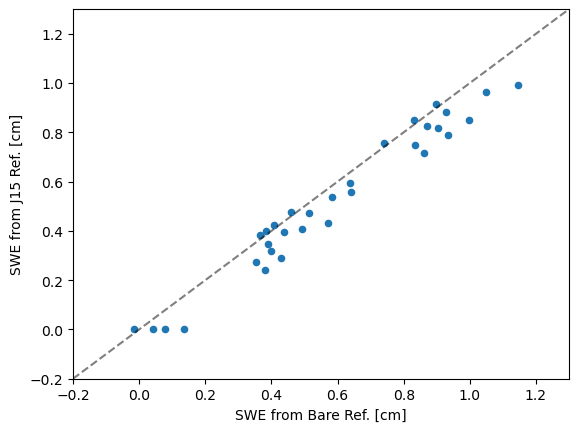

In [68]:
fig, ax = plt.subplots()
test_df[test_df.pts.isin(['p00','p05','p07', 'p19'])].plot(ax=ax, 
                                                           x='swe bare [cm]', y='swe j15 [cm]', 
                                                           kind='scatter')
# sns.scatterplot(ax=ax, data=test_df[test_df.pts.isin(['p00','p05','p07', 'p19'])],
#                 x='swe bare [cm]', y='swe j15 [cm]', c=['p00','p05','p07', 'p19'])
# ax.scatter(test_df[test_df.pts.isin(['p00','p05','p07', 'p19'])]['swe bare [cm]'],
#            test_df[test_df.pts.isin(['p00','p05','p07', 'p19'])]['swe j15 [cm]'],
#            c=test_df[test_df.pts.isin(['p00','p05','p07', 'p19'])]['pts'].unique()
#           )
ax.plot(np.arange(-0.2,1.4,.1), np.arange(-0.2,1.4,.1), 'k--', alpha=0.5)
plt.axis([-0.2,1.3,-0.2,1.3])
ax.set_xlabel('SWE from Bare Ref. [cm]')
ax.set_ylabel('SWE from J15 Ref. [cm]')

In [69]:
mean_absolute_error(test_df[test_df.pts.isin(['p00','p05','p07', 'p19'])]['swe bare [cm]'],
                    test_df[test_df.pts.isin(['p00','p05','p07', 'p19'])]['swe j15 [cm]'])

0.07190319663792905

In [70]:
mean_bias_error(test_df[test_df.pts.isin(['p00','p05','p07', 'p19'])]['swe bare [cm]'],
                    test_df[test_df.pts.isin(['p00','p05','p07', 'p19'])]['swe j15 [cm]'])

0.0632178161452765

Text(0, 0.5, 'SWE from J15 Ref. [cm]')

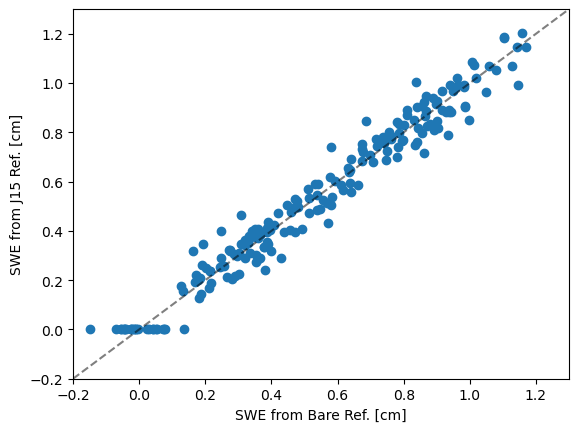

In [71]:
plt.plot(swe_con_base, swe_j15_base, 'o')
plt.plot(np.arange(-0.2,1.4,.1), np.arange(-0.2,1.4,.1), 'k--', alpha=0.5)
plt.axis([-0.2,1.3,-0.2,1.3])
plt.xlabel('SWE from Bare Ref. [cm]')
plt.ylabel('SWE from J15 Ref. [cm]')

In [72]:
mean_absolute_error(test_df['swe bare [cm]'],
                    test_df['swe j15 [cm]'])

0.049907529723606285

In [73]:
mean_bias_error(test_df['swe bare [cm]'],
                    test_df['swe j15 [cm]'])

-0.0013797630595382832

In [74]:
# rho = (1.135988 - 0.05)
# theta_g = (0.142 + 0.0595)/rho

# a0 = 0.0808
# a1 = 0.3720
# a2 = 0.1150

# N_0 = c / ((a0/(theta_g*rho+a1))+a1)
# N_wat = 0.24*N_0
# lamb = -4.8

# swes = lamb*np.log((r.iloc[2]-N_wat)/(c-N_wat))
# swes

In [75]:
j15_diffs = ncdf_no_control[ncdf_no_control['Date']=='2021-01-15'].copy()
j15_diffs.drop('SWE [cm]', axis=1, inplace=True)

j15_diffs['NCU_f'] = ncdf_u_171m_no_control[ncdf_u_171m_no_control['Date']=='2021-01-15'].NC
j15_diffs['NCU_c'] = ncdf_u_carc_no_control[ncdf_u_carc_no_control['Date']=='2021-01-15'].NC

j15_diffs['diff_f'] = j15_diffs['NCU_f'] - j15_diffs['NC']
j15_diffs['diff_c'] = j15_diffs['NCU_c'] - j15_diffs['NC']
j15_diffs['diff_u'] = j15_diffs['NCU_f'] - j15_diffs['NCU_c']

In [76]:
all_diffs = ncdf_no_control.copy()
all_diffs.drop('SWE [cm]', axis=1, inplace=True)

all_diffs['NCU_f'] = ncdf_u_171m_no_control.NC
all_diffs['NCU_c'] = ncdf_u_carc_no_control.NC

all_diffs['diff_f'] = all_diffs['NCU_f'] - all_diffs['NC']
all_diffs['diff_c'] = all_diffs['NCU_c'] - all_diffs['NC']
all_diffs['diff_u'] = all_diffs['NCU_f'] - all_diffs['NCU_c']

In [77]:
#constants
dsm_paths = np.sort(glob.glob('./data/DSMs/*.tif'))

def spatialweighting(xind, yind):
    # create 500 by 500 of distances (in meters)
    xs = np.arange(2,1000.1,2)
    ys = np.arange(2,1000.1,2)
    
    # center the distances from CRNS location at (xind, yind)
    xs_centered = xs - 2*int(xind)
    ys_centered = 2*int(yind) - ys
    
    # compute distances
    XX, YY = np.meshgrid(xs_centered, ys_centered)
    dists = np.sqrt(XX**2 + YY**2)
    return(dists)


def getINDS(xv, yv):
    xx = (xv + 500)/2
    yy = np.abs(yv - 500)/2
    return(xx-1, yy-1)


def plotPoint(ax, p, c, ls, s=''):
    xx = (p[0] + 500)/2
    yy = np.abs(p[1] - 500)/2
    ax.plot(xx, yy, ls, markeredgecolor='k', mew=0.5)
    # ax.text(xx, yy, s, color='k')

In [78]:
# Plotting potential locations for URANOS Runs
p0_x = -211.280 # Detector Pos X [m]
p0_y = -167.261 # Detector Pos Y [m]

p00 = (p0_x,p0_y)
p01 = (   0,    0)
p02 = (-280,  280)
p03 = (   0,  280)
p04 = ( 280,  280)
p05 = (-280,    0)
p06 = ( 280,    0)
p07 = (-280, -280)
p08 =    (0, -280)
p09 = ( 280, -280)
p10 = (-140,  280)
p11 = ( 140,  280)
p12 = (-280,  140)
p13 = (-140,  140)
p14 = (   0,  140)
p15 = ( 140,  140)
p16 = ( 280,  140)
p17 = (-140,    0)
p18 = ( 140,    0)
p19 = (-280, -140)
p20 = (-140, -140)
p21 = (   0, -140)
p22 = ( 140, -140)
p23 = ( 280, -140)
p24 = (-140, -280)
p25 = ( 140, -280)

In [79]:
# get filenames of lidar SD files
fnames_old = glob.glob('/Users/hkim139/mntpoint/General/Montana/hkim/LIDAR/lidar_maps/*.txt')
fnames = glob.glob('/Users/hkim139/mntpoint/General/Montana/LIDAR_2021/R_Files/Gapfilled_lidar_for_modeling/*.txt')

fnames_0115 = fnames_old[0]

sd_0115 = np.loadtxt(fnames_0115, delimiter=',')


In [206]:
def mask_0_sd(dsm):
    dsm_BareMask = np.ma.masked_where(dsm == 0.0, dsm)
    np.ma.set_fill_value(dsm_BareMask, np.nan)
    return(dsm_BareMask)

def plotPoint_with_color(ax, p, bp, ms, msize=7, cmap=cmap):
    xx = (p[0] + 500)/2
    yy = np.abs(p[1] - 500)/2
    ax.plot(xx, yy, c=cmap((bp-95)/5), marker=ms,
            markersize=msize,
            markeredgecolor='k', mew=0.5)
    # ax.text(xx, yy, s, color='k')

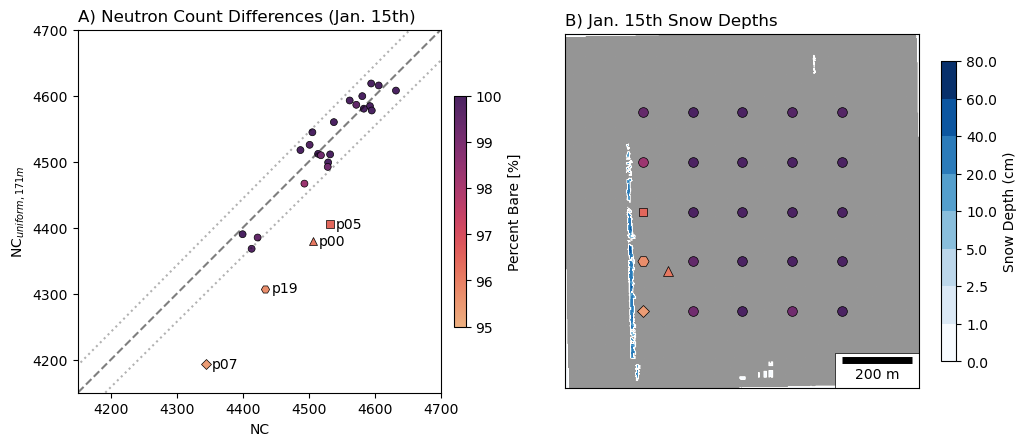

In [205]:
# Figure 4 code ---------------------------------------------------------------

# markeredgecolor 
fig = plt.figure(figsize=(12,6))
gs = fig.add_gridspec(1,2, width_ratios=[1,1], wspace=0.1)

sd_0115_bm = mask_0_sd(sd_0115)

ax = fig.add_subplot(gs[0])
ax.set_aspect('equal', adjustable='box')

j15_diffs['Percent Bare'] = ncdf_no_control[ncdf_no_control['Date']=='2021-01-15']['Percent Bare [%]']

cmap = sns.color_palette("flare", as_cmap=True)
sc = ax.scatter(j15_diffs[j15_diffs['diff_f']>-100]['NC'],
                j15_diffs[j15_diffs['diff_f']>-100]['NCU_f'],
                s = 25,
                c=j15_diffs[j15_diffs['diff_f']>-100]['Percent Bare'],
                marker='o', cmap=cmap, edgecolor='k', linewidth=0.5,
                vmin=95, vmax=100)
plt.colorbar(sc, ax=ax, shrink=0.5, pad=0.03, label='Percent Bare [%]')
# sns.scatterplot(data=j15_diffs[j15_diffs['diff_f']>-100], ax=ax,
#                 x='NC', y='NCU_f', hue='Percent Bare',
#                 hue_norm=(90,100), legend='brief', s=50)
ax.plot(j15_diffs[j15_diffs['Point']=='p00'].NC,
        j15_diffs[j15_diffs['Point']=='p00'].NCU_f,
        c=cmap((j15_diffs[j15_diffs['Point']=='p00']['Percent Bare']-95)/5), marker='^',
        markeredgecolor='k', mew=0.5,
        zorder=3)
ax.plot(j15_diffs[j15_diffs['Point']=='p05'].NC,
        j15_diffs[j15_diffs['Point']=='p05'].NCU_f,
        markersize=30**0.5,
        c=cmap((j15_diffs[j15_diffs['Point']=='p05']['Percent Bare']-95)/5), marker='s',
        markeredgecolor='k', mew=0.5,
        zorder=3)
ax.plot(j15_diffs[j15_diffs['Point']=='p07'].NC,
        j15_diffs[j15_diffs['Point']=='p07'].NCU_f,
        markersize=25**0.5,
        c=cmap((j15_diffs[j15_diffs['Point']=='p07']['Percent Bare']-95)/5), marker='D',
        markeredgecolor='k', mew=0.5,
        zorder=3)
ax.plot(j15_diffs[j15_diffs['Point']=='p19'].NC,
        j15_diffs[j15_diffs['Point']=='p19'].NCU_f,
        markersize=35**0.5,
        c=cmap((j15_diffs[j15_diffs['Point']=='p19']['Percent Bare']-95)/5), marker='H',
        markeredgecolor='k', mew=0.5,
        zorder=3)
# ax.plot(j15_diffs[j15_diffs['Point']=='p05'].NC,
#         j15_diffs[j15_diffs['Point']=='p05'].NCU_f, 'mo',
#         zorder=3)
# ax.plot(j15_diffs[j15_diffs['Point']=='p07'].NC,
#         j15_diffs[j15_diffs['Point']=='p07'].NCU_f, 'mo',
#         zorder=3)
# ax.plot(j15_diffs[j15_diffs['Point']=='p19'].NC,
#         j15_diffs[j15_diffs['Point']=='p19'].NCU_f, 'mo',
#         zorder=3)
plt.plot(np.arange(3200,5110,100),np.arange(3200,5110,100), 'k--',
         alpha=0.5)
plt.plot(np.arange(3200,5110,100)*1.01,np.arange(3200,5110,100), 'k:',
         alpha=0.3)
plt.plot(np.arange(3200,5110,100), np.arange(3200,5110,100)*1.01, 'k:', alpha=0.3)
big_diffs = j15_diffs[j15_diffs['diff_f']<-100].reset_index()

for i in range(len(big_diffs)):
    ax.annotate(text=big_diffs.Point.iloc[i],
                xy=(big_diffs.NC.iloc[i], big_diffs.NCU_f.iloc[i]),
                xytext=(big_diffs.NC.iloc[i]+9, big_diffs.NCU_f.iloc[i]), va='center')

plt.xlim(4150,4700)
plt.ylim(4150,4700)

ax.set_xlabel('NC')
ax.set_ylabel(r'NC$_{uniform,171m}$')
ax.set_title('A) Neutron Count Differences (Jan. 15th)', loc='left')


bound = np.array([0, 1, 2.5, 5, 10, 20, 40, 60, 80])
norm = colors.BoundaryNorm(boundaries=bound, ncolors=256)
ax2 = fig.add_subplot(gs[1])


ax2.imshow(sd_0115_bm.mask, cmap='Greys', vmin=0.5, vmax=1.5)
img = ax2.imshow(sd_0115_bm.filled()*100, cmap='Blues', clim=(0, 80), norm=norm)
# img = ax2.imshow(sd_0115*100, cmap='Blues', clim=(0, 80), norm=norm)
plt.colorbar(img, ax=ax2,
                  label='Snow Depth (cm)', shrink=0.65)
plotPoint_with_color(ax2, p00, j15_diffs[j15_diffs['Point']=='p00']['Percent Bare'].values[0], '^', cmap=cmap)
plotPoint_with_color(ax2, p01, j15_diffs[j15_diffs['Point']=='p01']['Percent Bare'].values[0], 'o', cmap=cmap)
plotPoint_with_color(ax2, p02, j15_diffs[j15_diffs['Point']=='p02']['Percent Bare'].values[0], 'o', cmap=cmap)
plotPoint_with_color(ax2, p03, j15_diffs[j15_diffs['Point']=='p03']['Percent Bare'].values[0], 'o', cmap=cmap)
plotPoint_with_color(ax2, p04, j15_diffs[j15_diffs['Point']=='p04']['Percent Bare'].values[0], 'o', cmap=cmap)
plotPoint_with_color(ax2, p05, j15_diffs[j15_diffs['Point']=='p05']['Percent Bare'].values[0], 's', 6, cmap=cmap)
plotPoint_with_color(ax2, p06, j15_diffs[j15_diffs['Point']=='p06']['Percent Bare'].values[0], 'o', cmap=cmap)
plotPoint_with_color(ax2, p07, j15_diffs[j15_diffs['Point']=='p07']['Percent Bare'].values[0], 'D', 6, cmap=cmap)
plotPoint_with_color(ax2, p08, j15_diffs[j15_diffs['Point']=='p08']['Percent Bare'].values[0], 'o', cmap=cmap)
plotPoint_with_color(ax2, p09, j15_diffs[j15_diffs['Point']=='p09']['Percent Bare'].values[0], 'o', cmap=cmap)
plotPoint_with_color(ax2, p10, j15_diffs[j15_diffs['Point']=='p10']['Percent Bare'].values[0], 'o', cmap=cmap)
plotPoint_with_color(ax2, p11, j15_diffs[j15_diffs['Point']=='p11']['Percent Bare'].values[0], 'o', cmap=cmap)
plotPoint_with_color(ax2, p12, j15_diffs[j15_diffs['Point']=='p12']['Percent Bare'].values[0], 'o', cmap=cmap)
plotPoint_with_color(ax2, p13, j15_diffs[j15_diffs['Point']=='p13']['Percent Bare'].values[0], 'o', cmap=cmap)
plotPoint_with_color(ax2, p14, j15_diffs[j15_diffs['Point']=='p14']['Percent Bare'].values[0], 'o', cmap=cmap)
plotPoint_with_color(ax2, p15, j15_diffs[j15_diffs['Point']=='p15']['Percent Bare'].values[0], 'o', cmap=cmap)
plotPoint_with_color(ax2, p16, j15_diffs[j15_diffs['Point']=='p16']['Percent Bare'].values[0], 'o', cmap=cmap)
plotPoint_with_color(ax2, p17, j15_diffs[j15_diffs['Point']=='p17']['Percent Bare'].values[0], 'o', cmap=cmap)
plotPoint_with_color(ax2, p18, j15_diffs[j15_diffs['Point']=='p18']['Percent Bare'].values[0], 'o', cmap=cmap)
plotPoint_with_color(ax2, p19, j15_diffs[j15_diffs['Point']=='p19']['Percent Bare'].values[0], 'H', 8, cmap=cmap)
plotPoint_with_color(ax2, p20, j15_diffs[j15_diffs['Point']=='p20']['Percent Bare'].values[0], 'o', cmap=cmap)
plotPoint_with_color(ax2, p21, j15_diffs[j15_diffs['Point']=='p21']['Percent Bare'].values[0], 'o', cmap=cmap)
plotPoint_with_color(ax2, p22, j15_diffs[j15_diffs['Point']=='p22']['Percent Bare'].values[0], 'o', cmap=cmap)
plotPoint_with_color(ax2, p23, j15_diffs[j15_diffs['Point']=='p23']['Percent Bare'].values[0], 'o', cmap=cmap)
plotPoint_with_color(ax2, p24, j15_diffs[j15_diffs['Point']=='p24']['Percent Bare'].values[0], 'o', cmap=cmap)
plotPoint_with_color(ax2, p25, j15_diffs[j15_diffs['Point']=='p25']['Percent Bare'].values[0], 'o', cmap=cmap)
# plotPoint(ax2, p00, 'm', 'm^','P00')
# plotPoint(ax2, p01, 'r', 'ro','P01')
# plotPoint(ax2, p02, 'r', 'ro','P02')
# plotPoint(ax2, p03, 'r', 'ro', 'P03')
# plotPoint(ax2, p04, 'r', 'ro', 'P04')
# plotPoint(ax2, p05, 'm', 'mo', 'P05')
# plotPoint(ax2, p06, 'r', 'ro', 'P06')
# plotPoint(ax2, p07, 'm', 'mo', 'P07')
# plotPoint(ax2, p08, 'r', 'ro', 'P08')
# plotPoint(ax2, p09, 'r', 'ro', 'P09')
# plotPoint(ax2, p10, 'r', 'ro', 'P10')
# plotPoint(ax2, p11, 'r', 'ro', 'P11')
# plotPoint(ax2, p12, 'r', 'ro', 'P12')
# plotPoint(ax2, p13, 'r', 'ro', 'P13')
# plotPoint(ax2, p14, 'r', 'ro', 'P14')
# plotPoint(ax2, p15, 'r', 'ro', 'P15')
# plotPoint(ax2, p16, 'r', 'ro', 'P16')
# plotPoint(ax2, p17, 'r', 'ro', 'P17')
# plotPoint(ax2, p18, 'r', 'ro', 'P18')
# plotPoint(ax2, p19, 'm', 'mo', 'P19')
# plotPoint(ax2, p20, 'r', 'ro', 'P20')
# plotPoint(ax2, p21, 'r', 'ro', 'P21')
# plotPoint(ax2, p22, 'r', 'ro', 'P22')
# plotPoint(ax2, p23, 'r', 'ro', 'P23')
# plotPoint(ax2, p24, 'r', 'ro', 'P24')
# plotPoint(ax2, p25, 'r', 'ro', 'P25')

rect = Rectangle((380,450), 119,49, 
                  facecolor='white', edgecolor='k', lw=0.5)
ax2.add_patch(rect)
ax2.hlines(y=460,xmin=390,xmax=490, lw=5, color='k')
ax2.text(x=440, y=470, s='200 m', va='top',
         ha='center', fontsize=10)
ax2.tick_params(labelbottom=False, labelleft=False)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('B) Jan. 15th Snow Depths', loc='left')

# plt.savefig('../figs/to_publish/f05.png', bbox_inches='tight', facecolor='w', dpi=300)
plt.savefig('../figs/to_publish/f05.pdf', bbox_inches='tight', facecolor='w', dpi=300)
plt.show()

In [171]:
# driver = gdal.GetDriverByName('GTiff')
# out_ds = driver.Create('./data/DSMs/DSM_0115.tif', 500,500,1, gdal.GDT_Float64)
# out_ds.SetGeoTransform(raster.GetGeoTransform())

# band = out_ds.GetRasterBand(1)
# band.WriteArray(sd_0115)
# band.FlushCache()
# out_ds.FlushCache() 

In [82]:
def calcBarePercent(dist_mat, point, paths = dsm_paths):
    BarePERs = np.zeros(len(paths))+100
    
    for i, p in enumerate(dsm_paths):
        if i == 0:
            raster = gdal.Open(p)       # read in DSM rasters
        # calculate bare percentage
            sd_array = raster.ReadAsArray()
            sd_masked = np.ma.masked_where(dist_mat > 171, sd_0115)
            
            bare_p = (sd_masked[~sd_masked.mask]==0).sum()/len((sd_masked[~sd_masked.mask]))*100
            BarePERs[i] = bare_p
        else:
            raster = gdal.Open(p)       # read in DSM rasters
        # calculate bare percentage
            sd_array = raster.ReadAsArray()
            sd_masked = np.ma.masked_where(dist_mat > 171, sd_array)
            
            bare_p = (sd_masked[~sd_masked.mask]==0).sum()/len((sd_masked[~sd_masked.mask]))*100
            BarePERs[i] = bare_p

    bp_df = pd.DataFrame({
        'Date':['20210115','20210121','20210122', '20210129', '20210217', '20210218', '20210224', '20210304'],
        'Point':np.repeat(point, 8),
        'Percent Bare [%]':BarePERs
    })
    
    return(bp_df)

def calcFptVar(dist_mat, point, paths = dsm_paths):
    stds = np.zeros(len(paths))
    rngs = np.zeros(len(paths))
    
    for i, p in enumerate(dsm_paths):
        if i == 0:
            raster = gdal.Open(p)       # read in DSM rasters
        # calculate bare percentage
            sd_array = raster.ReadAsArray()
            sd_masked = np.ma.masked_where(dist_mat > 171, sd_0115)
            
            sd_stdev = sd_masked.std()
            stds[i] = sd_stdev
            sd_r = sd_masked.max() - sd_masked.min()
            rngs[i] = sd_r
            
        else:
            raster = gdal.Open(p)       # read in DSM rasters
        # calculate bare percentage
            sd_array = raster.ReadAsArray()
            sd_masked = np.ma.masked_where(dist_mat > 171, sd_array)
            
            std_devs = sd_masked.std()
            stds[i] = std_devs
            sd_r = sd_masked.max() - sd_masked.min()
            rngs[i] = sd_r

    var_df = pd.DataFrame({
        'Date':['20210115','20210121','20210122', '20210129', '20210217', '20210218', '20210224', '20210304'],
        'Point':np.repeat(point, 8),
        'std dev':stds,
        'range':rngs
    })
    
    return(var_df)

In [83]:
p01i = getINDS(0,0)
p02i = getINDS(-280,280)
p03i = getINDS(0,280)
p04i = getINDS(280,280)
p05i = getINDS(-280,0)
p06i = getINDS(280,0)
p07i = getINDS(-280,-280)
p08i = getINDS(0,-280)
p09i = getINDS(280,-280)
p10i = getINDS(-140,280)
p11i = getINDS(140,280)
p12i = getINDS(-280,140)
p13i = getINDS(-140,140)
p14i = getINDS(0,140)
p15i = getINDS(140,140)
p16i = getINDS(280,140)
p17i = getINDS(-140,0)
p18i = getINDS(140,0)
p19i = getINDS(-280,-140)
p20i = getINDS(-140,-140)
p21i = getINDS(0,-140)
p22i = getINDS(140,-140)
p23i = getINDS(280,-140)
p24i = getINDS(-140,-280)
p25i = getINDS(-140,-280)

In [84]:
dists_p00 = spatialweighting(m_x, m_y)
dists_p01 = spatialweighting(p01i[0], p01i[1])
dists_p02 = spatialweighting(p02i[0], p02i[1])
dists_p03 = spatialweighting(p03i[0], p03i[1])
dists_p04 = spatialweighting(p04i[0], p04i[1])
dists_p05 = spatialweighting(p05i[0], p05i[1])
dists_p06 = spatialweighting(p06i[0], p06i[1])
dists_p07 = spatialweighting(p07i[0], p07i[1])
dists_p08 = spatialweighting(p08i[0], p08i[1])
dists_p09 = spatialweighting(p09i[0], p09i[1])
dists_p10 = spatialweighting(p10i[0], p10i[1])
dists_p11 = spatialweighting(p11i[0], p11i[1])
dists_p12 = spatialweighting(p12i[0], p12i[1])
dists_p13 = spatialweighting(p13i[0], p13i[1])
dists_p14 = spatialweighting(p14i[0], p14i[1])
dists_p15 = spatialweighting(p15i[0], p15i[1])
dists_p16 = spatialweighting(p16i[0], p16i[1])
dists_p17 = spatialweighting(p17i[0], p17i[1])
dists_p18 = spatialweighting(p18i[0], p18i[1])
dists_p19 = spatialweighting(p19i[0], p19i[1])
dists_p20 = spatialweighting(p20i[0], p20i[1])
dists_p21 = spatialweighting(p21i[0], p21i[1])
dists_p22 = spatialweighting(p22i[0], p22i[1])
dists_p23 = spatialweighting(p23i[0], p23i[1])
dists_p24 = spatialweighting(p24i[0], p24i[1])
dists_p25 = spatialweighting(p25i[0], p25i[1])

In [85]:
bare_per_p00 = calcBarePercent(dists_p00, 'p00')
bare_per_p01 = calcBarePercent(dists_p01, 'p01')
bare_per_p02 = calcBarePercent(dists_p02, 'p02')
bare_per_p03 = calcBarePercent(dists_p03, 'p03')
bare_per_p04 = calcBarePercent(dists_p04, 'p04')
bare_per_p05 = calcBarePercent(dists_p05, 'p05')
bare_per_p06 = calcBarePercent(dists_p06, 'p06')
bare_per_p07 = calcBarePercent(dists_p07, 'p07')
bare_per_p08 = calcBarePercent(dists_p08, 'p08')
bare_per_p09 = calcBarePercent(dists_p09, 'p09')
bare_per_p10 = calcBarePercent(dists_p10, 'p10')
bare_per_p11 = calcBarePercent(dists_p11, 'p11')
bare_per_p12 = calcBarePercent(dists_p12, 'p12')
bare_per_p13 = calcBarePercent(dists_p13, 'p13')
bare_per_p14 = calcBarePercent(dists_p14, 'p14')
bare_per_p15 = calcBarePercent(dists_p15, 'p15')
bare_per_p16 = calcBarePercent(dists_p16, 'p16')
bare_per_p17 = calcBarePercent(dists_p17, 'p17')
bare_per_p18 = calcBarePercent(dists_p18, 'p18')
bare_per_p19 = calcBarePercent(dists_p19, 'p19')
bare_per_p20 = calcBarePercent(dists_p20, 'p20')
bare_per_p21 = calcBarePercent(dists_p21, 'p21')
bare_per_p22 = calcBarePercent(dists_p22, 'p22')
bare_per_p23 = calcBarePercent(dists_p23, 'p23')
bare_per_p24 = calcBarePercent(dists_p24, 'p24')
bare_per_p25 = calcBarePercent(dists_p25, 'p25')

In [86]:
bare_per_df = pd.concat([bare_per_p00,
                        bare_per_p01,
                        bare_per_p02,
                        bare_per_p03,
                        bare_per_p04,
                        bare_per_p05,
                        bare_per_p06,
                        bare_per_p07,
                        bare_per_p08,
                        bare_per_p09,
                        bare_per_p10,
                        bare_per_p11,
                        bare_per_p12,
                        bare_per_p13,
                        bare_per_p14,
                        bare_per_p15,
                        bare_per_p16,
                        bare_per_p17,
                        bare_per_p18,
                        bare_per_p19,
                        bare_per_p20,
                        bare_per_p21,
                        bare_per_p22,
                        bare_per_p23,
                        bare_per_p24,
                        bare_per_p25
                        ]).reset_index(drop=True)

# bare_per_df
bare_per_df['Date'] = pd.to_datetime(bare_per_df['Date'], format='%Y%m%d')

In [87]:
var_p00 = calcFptVar(dists_p00, 'p00')
var_p01 = calcFptVar(dists_p01, 'p01')
var_p02 = calcFptVar(dists_p02, 'p02')
var_p03 = calcFptVar(dists_p03, 'p03')
var_p04 = calcFptVar(dists_p04, 'p04')
var_p05 = calcFptVar(dists_p05, 'p05')
var_p06 = calcFptVar(dists_p06, 'p06')
var_p07 = calcFptVar(dists_p07, 'p07')
var_p08 = calcFptVar(dists_p08, 'p08')
var_p09 = calcFptVar(dists_p09, 'p09')
var_p10 = calcFptVar(dists_p10, 'p10')
var_p11 = calcFptVar(dists_p11, 'p11')
var_p12 = calcFptVar(dists_p12, 'p12')
var_p13 = calcFptVar(dists_p13, 'p13')
var_p14 = calcFptVar(dists_p14, 'p14')
var_p15 = calcFptVar(dists_p15, 'p15')
var_p16 = calcFptVar(dists_p16, 'p16')
var_p17 = calcFptVar(dists_p17, 'p17')
var_p18 = calcFptVar(dists_p18, 'p18')
var_p19 = calcFptVar(dists_p19, 'p19')
var_p20 = calcFptVar(dists_p20, 'p20')
var_p21 = calcFptVar(dists_p21, 'p21')
var_p22 = calcFptVar(dists_p22, 'p22')
var_p23 = calcFptVar(dists_p23, 'p23')
var_p24 = calcFptVar(dists_p24, 'p24')
var_p25 = calcFptVar(dists_p25, 'p25')

In [88]:
var_df = pd.concat([var_p00,
                    var_p01,
                    var_p02,
                    var_p03,
                    var_p04,
                    var_p05,
                    var_p06,
                    var_p07,
                    var_p08,
                    var_p09,
                    var_p10,
                    var_p11,
                    var_p12,
                    var_p13,
                    var_p14,
                    var_p15,
                    var_p16,
                    var_p17,
                    var_p18,
                    var_p19,
                    var_p20,
                    var_p21,
                    var_p22,
                    var_p23,
                    var_p24,
                    var_p25
                   ]).reset_index(drop=True)

# var_df
var_df['Date'] = pd.to_datetime(var_df['Date'], format='%Y%m%d')

In [89]:
raster = gdal.Open(dsm_paths[1])       # read in DSM rasters
# calculate bare percentage
sd_array = raster.ReadAsArray()
sd_masked = np.ma.masked_where(dists_p01 > 171, sd_array)

# std_devs = sd_masked.std()
# stds[i] = std_devs
# sd_r = sd_masked.max() - sd_masked[sd_masked>0].min()

In [90]:
sd_masked[sd_masked>0].min()

1e-04

In [91]:
bare_per_df

,Date,Point,Percent Bare [%]
0,2021-01-15,p00,96.118533
1,2021-01-21,p00,52.917628
2,2021-01-22,p00,56.846961
3,2021-01-29,p00,71.650494
4,2021-02-17,p00,1.971194
...,...,...,...
203,2021-01-29,p25,73.795744
204,2021-02-17,p25,2.811018
205,2021-02-18,p25,3.489839
206,2021-02-24,p25,52.739219


In [92]:
var_df

,Date,Point,std dev,range
0,2021-01-15,p00,0.042373,0.6340
1,2021-01-21,p00,0.072731,0.8675
2,2021-01-22,p00,0.065971,0.8271
3,2021-01-29,p00,0.065979,0.8276
4,2021-02-17,p00,0.091460,0.9189
...,...,...,...,...
203,2021-01-29,p25,0.032962,0.6056
204,2021-02-17,p25,0.064375,0.6047
205,2021-02-18,p25,0.065632,0.6224
206,2021-02-24,p25,0.052353,0.5968


In [93]:
ncdf_no_control = ncdf_no_control.merge(bare_per_df, on=['Date', 'Point'], how='left')

In [94]:
all_diffs = all_diffs.merge(bare_per_df, on=['Date', 'Point'], how='left')
all_diffs = all_diffs.merge(var_df, on=['Date', 'Point'], how='left')

In [95]:
ncdf_no_control

,Date,Point,NC,SWE [cm],Percent Bare [%]
0,2021-01-15,p00,4506.671119,-0.0,96.118533
1,2021-01-15,p01,4605.778082,-0.0,100.000000
2,2021-01-15,p02,4422.403317,-0.0,99.460424
3,2021-01-15,p03,4505.325680,-0.0,100.000000
4,2021-01-15,p04,4413.310402,-0.0,99.799835
...,...,...,...,...,...
203,2021-03-04,p21,4431.558051,0.406956,41.025195
204,2021-03-04,p22,4402.028302,0.370585,57.782516
205,2021-03-04,p23,4360.523205,0.348335,43.205257
206,2021-03-04,p24,4040.378922,1.086808,13.010748


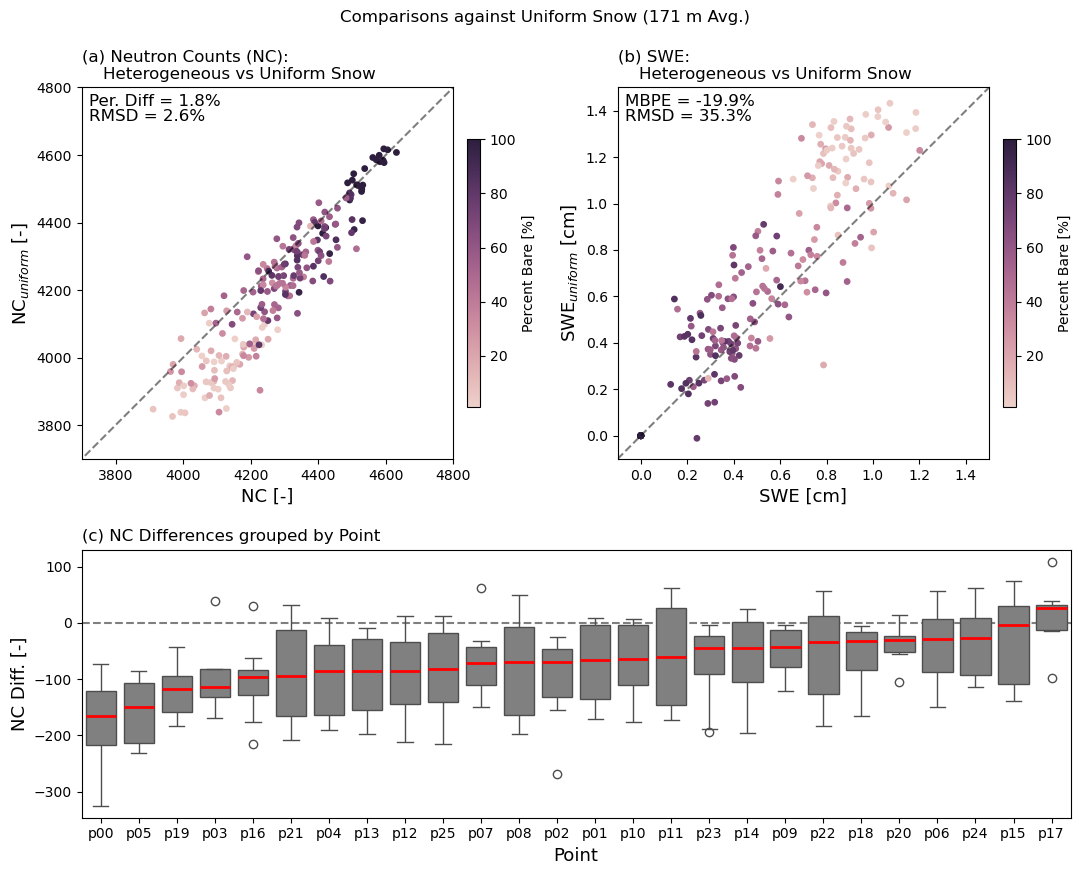

In [100]:
#-- Figure 6 Code --------------------------
fig = plt.figure(figsize=(11,10))
gs = fig.add_gridspec(2,2, height_ratios=[1,0.5])
# set colorbar to seaborn's cubehelix
cmap = sns.cubehelix_palette(as_cmap=True)

# Plot NC -----------------------------------------
ax1 = fig.add_subplot(gs[0,0])
ax1.set_aspect('equal', adjustable='box')
ax1.plot(np.arange(3200,5110,100),np.arange(3200,5110,100), 'k--', alpha=0.5)
# sns.scatterplot(x=ncdf_no_control['NC'],
#                 y=ncdf_u_171m_no_control['NC'], hue=ncdf_no_control['Percent Bare [%]'],
#                 palette='cubehelix', ax=ax1)
sc = ax1.scatter(ncdf_no_control['NC'], ncdf_u_171m_no_control['NC'],
                 s = 15, c=ncdf_no_control['Percent Bare [%]'], marker='o', cmap=cmap)
plt.colorbar(sc, ax=ax1, shrink=0.5, pad=0.03, label='Percent Bare [%]')

# set limits, title, and axis labels
ax1.set_xlim(3700,4800)
ax1.set_ylim(3700,4800)
ax1.set_title('(a) Neutron Counts (NC):\n    Heterogeneous vs Uniform Snow', loc='left')
ax1.set_xlabel('NC [-]', fontsize=13)
ax1.set_ylabel(r'NC$_{uniform}$ [-]', fontsize=13)

# Plot SD -----------------------------------------
ax2 = fig.add_subplot(gs[0,1])
ax2.set_aspect('equal', adjustable='box')
ax2.plot(np.arange(-0.1,1.9,.1), np.arange(-0.1,1.9,.1), 'k--', alpha=0.5)
sc = ax2.scatter(ncdf_no_control['SWE [cm]'], ncdf_u_171m_no_control['SWE [cm]'],
                 s = 15, c=ncdf_no_control['Percent Bare [%]'], marker='o', cmap=cmap)
plt.colorbar(sc, ax=ax2, shrink=0.5, pad=0.03, label='Percent Bare [%]')
# set limits, title, and axis labels
ax2.set_xlim(-0.1,1.5)
ax2.set_ylim(-0.1,1.5)
ax2.set_title('(b) SWE:\n    Heterogeneous vs Uniform Snow', loc='left')
ax2.set_xlabel('SWE [cm]', fontsize=13)
ax2.set_ylabel(r'SWE$_{uniform}$ [cm]', fontsize=13)

mbe_a = mean_bias_error(ncdf_no_control['NC'],
                    ncdf_u_171m_no_control['NC'])
mbe_b = mean_bias_error(ncdf_no_control['SWE [cm]'],
                ncdf_u_171m_no_control['SWE [cm]'])
rmse_a = np.sqrt(mean_squared_error(ncdf_no_control['NC'],
                           ncdf_u_171m_no_control['NC']))
rmse_b =np.sqrt(mean_squared_error(ncdf_no_control['SWE [cm]'],
                           ncdf_u_171m_no_control['SWE [cm]']))
mbpe_a = mbe_a/ncdf_u_171m_no_control['NC'].mean()
rmspe_a = rmse_a/ncdf_u_171m_no_control['NC'].mean()
mbpe_b = mbe_b/ncdf_u_171m_no_control['SWE [cm]'].mean()
rmspe_b = rmse_b/ncdf_u_171m_no_control['SWE [cm]'].mean()

ax1.text(0.02,0.95, 'Per. Diff = {:.1f}%'.format(mbpe_a*100), transform=ax1.transAxes, fontsize=12)
ax1.text(0.02,0.91, 'RMSD = {:.1f}%'.format(rmspe_a*100), transform=ax1.transAxes, fontsize=12)

ax2.text(0.02,0.95, 'MBPE = {:.1f}%'.format(mbpe_b*100), transform=ax2.transAxes, fontsize=12)
ax2.text(0.02,0.91, 'RMSD = {:.1f}%'.format(rmspe_b*100), transform=ax2.transAxes, fontsize=12)

ax3 = fig.add_subplot(gs[1,0:2])
sorted_meds = all_diffs.groupby('Point')['diff_f'].median().sort_values()
ax3.axhline(0, color='k', ls='--', alpha=0.5)
sns.boxplot(ax=ax3, data=all_diffs, x='Point', y='diff_f',
            order=sorted_meds.index, color='grey',
            medianprops={"color": "r", "linewidth": 2})
ax3.set_title('(c) NC Differences grouped by Point', loc='left')
ax3.set_ylabel('NC Diff. [-]', fontsize=13)
ax3.set_xlabel('Point', fontsize=13)
# y=0.92
plt.suptitle('Comparisons against Uniform Snow (171 m Avg.)', y=0.90)
gs.tight_layout(fig, rect=[0, 0.03, 1, 0.95])
# remove comment to save
# plt.savefig('../figs/to_publish/f04.png', bbox_inches='tight', facecolor='w', dpi=300)
plt.savefig('../figs/to_publish/f04.pdf', bbox_inches='tight', facecolor='w', dpi=300)

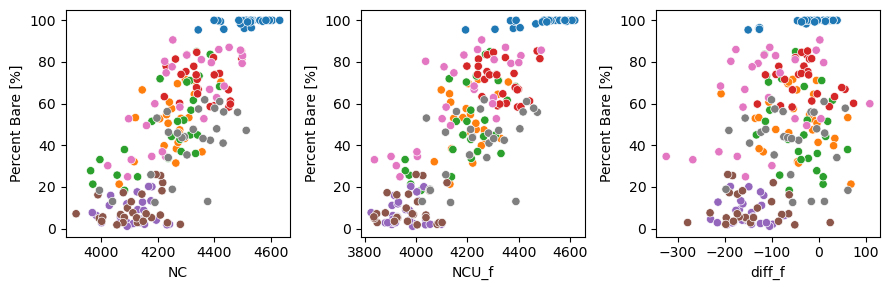

In [182]:
# ncdf_no_control.plot(kind='scatter',
#                      x='NC', y='Percent Bare [%]',
#                      color='Point')
fig, axs = plt.subplots(1,3, figsize=(9,3))
sns.scatterplot(data=all_diffs, ax=axs[0],
                x='NC', y='Percent Bare [%]', hue='Date', legend=False)
sns.scatterplot(data=all_diffs, ax=axs[1],
                x='NCU_f', y='Percent Bare [%]', hue='Date', legend=False)
sns.scatterplot(data=all_diffs, ax=axs[2],
                x='diff_f', y='Percent Bare [%]', hue='Date', legend=False)
plt.tight_layout()

In [219]:
all_diffs

,Date,Point,NC,Percent Bare [%]_x,NCU_f,NCU_c,diff_f,diff_c,diff_u,Percent Bare [%]_y,std dev,range
0,2021-01-15,p00,4506.671119,96.118533,4379.274446,4540.153652,-127.396673,33.482533,-160.879206,96.118533,0.042373,0.6340
1,2021-01-15,p01,4605.778082,100.000000,4615.369307,4602.972538,9.591225,-2.805545,12.396770,100.000000,0.000000,0.0000
2,2021-01-15,p02,4422.403317,99.460424,4385.063060,4391.405412,-37.340257,-30.997905,-6.342352,99.460424,0.005129,0.2370
3,2021-01-15,p03,4505.325680,100.000000,4544.482750,4498.565929,39.157070,-6.759751,45.916821,100.000000,0.000000,0.0000
4,2021-01-15,p04,4413.310402,99.799835,4368.004657,4339.731980,-45.305745,-73.578422,28.272677,99.799835,0.000466,0.0390
...,...,...,...,...,...,...,...,...,...,...,...,...
203,2021-03-04,p21,4431.558051,41.025195,4284.559933,4286.408333,-146.998118,-145.149718,-1.848400,41.025195,0.026571,0.2939
204,2021-03-04,p22,4402.028302,57.782516,4458.627493,4249.623317,56.599191,-152.404985,209.004176,57.782516,0.009820,0.1779
205,2021-03-04,p23,4360.523205,43.205257,4302.800212,4203.328904,-57.722993,-157.194302,99.471308,43.205257,0.018085,0.2310
206,2021-03-04,p24,4040.378922,13.010748,4024.726221,4171.035341,-15.652701,130.656418,-146.309119,13.010748,0.032974,0.5322


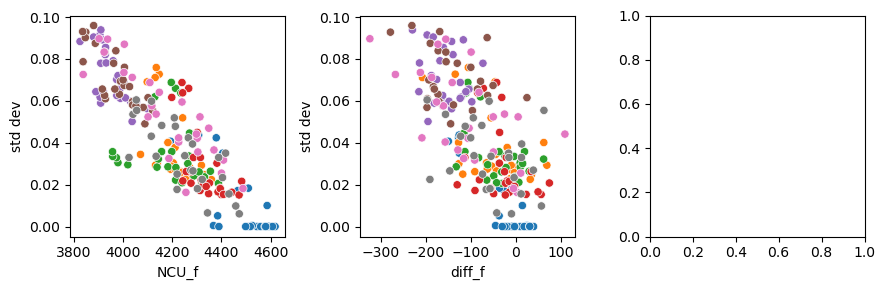

In [221]:
# ncdf_no_control.plot(kind='scatter',
#                      x='NC', y='Percent Bare [%]',
#                      color='Point')
fig, axs = plt.subplots(1,3, figsize=(9,3))
sns.scatterplot(data=all_diffs, ax=axs[0],
                x='NCU_f', y='std dev', hue='Date', legend=False)
sns.scatterplot(data=all_diffs, ax=axs[1],
                x='diff_f', y='std dev', hue='Date', legend=False)
# sns.scatterplot(data=all_diffs, ax=axs[2],
#                 x='diff_f', y='Percent Bare [%]', hue='Date', legend=False)
plt.tight_layout()

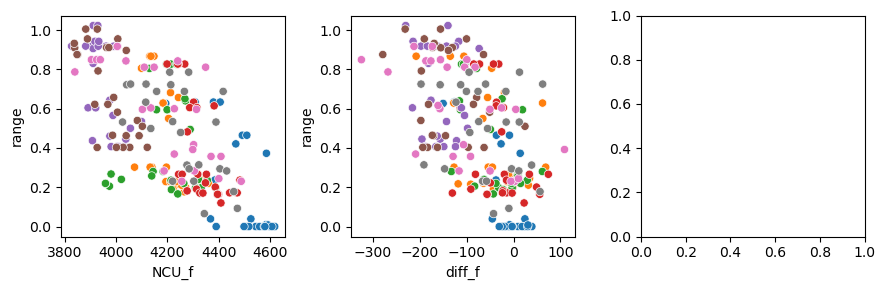

In [222]:
# ncdf_no_control.plot(kind='scatter',
#                      x='NC', y='Percent Bare [%]',
#                      color='Point')
fig, axs = plt.subplots(1,3, figsize=(9,3))
sns.scatterplot(data=all_diffs, ax=axs[0],
                x='NCU_f', y='range', hue='Date', legend=False)
sns.scatterplot(data=all_diffs, ax=axs[1],
                x='diff_f', y='range', hue='Date', legend=False)
# sns.scatterplot(data=all_diffs, ax=axs[2],
#                 x='diff_f', y='Percent Bare [%]', hue='Date', legend=False)
plt.tight_layout()

In [226]:
stats.pearsonr(all_diffs['diff_f'], all_diffs['Percent Bare [%]'])

PearsonRResult(statistic=0.4542234379946387, pvalue=5.5342137265828265e-12)

In [223]:
stats.pearsonr(all_diffs['diff_f'], all_diffs['std dev'])

PearsonRResult(statistic=-0.69996817829196, pvalue=6.037945743498497e-32)

In [224]:
stats.pearsonr(all_diffs['diff_f'], all_diffs['range'])

PearsonRResult(statistic=-0.5995196284969735, pvalue=1.0960334882749121e-21)

In [527]:
stats.pearsonr(all_diffs['NC'], all_diffs['Percent Bare [%]'])

PearsonRResult(statistic=0.8170655295975129, pvalue=3.65427393909831e-51)

In [528]:
stats.pearsonr(all_diffs['NCU_f'], all_diffs['Percent Bare [%]'])

PearsonRResult(statistic=0.8385803771555328, pvalue=3.0287932079083067e-56)

In [390]:
def ncdf_by_point(s):
    # p_df = ncdf_no_control[ncdf_no_control['Point']==s]
    p_df = all_diffs[all_diffs['Point']==s]
    p_df = p_df.reset_index()
    return(p_df)

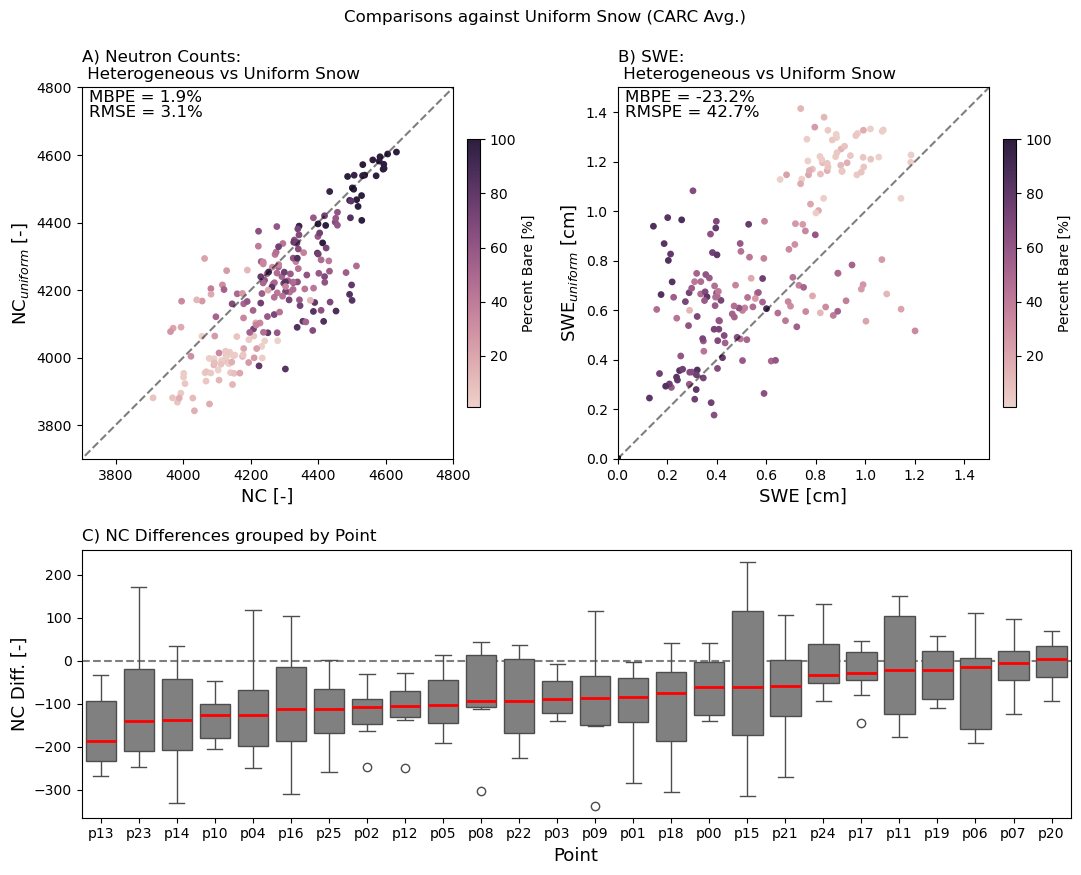

In [181]:
# #-- Figure 7 Code --------------------------
fig = plt.figure(figsize=(11,10))
gs = fig.add_gridspec(2,2, height_ratios=[1,0.5])
ax1 = fig.add_subplot(gs[0,0])
ax1.set_aspect('equal', adjustable='box')
ax2 = fig.add_subplot(gs[0,1])
ax2.set_aspect('equal', adjustable='box')

ax1.plot(np.arange(3200,5110,100),np.arange(3200,5110,100), 'k--', alpha=0.5)
# sns.scatterplot(x=ncdf_no_control['NC'],
#                 y=ncdf_u_carc_no_control['NC'], ax=ax1, legend=False)

sc = ax1.scatter(ncdf_no_control['NC'], ncdf_u_carc_no_control['NC'],
                 s = 15, c=ncdf_no_control['Percent Bare [%]'], marker='o', cmap=cmap)
plt.colorbar(sc, ax=ax1, shrink=0.5, pad=0.03, label='Percent Bare [%]')

ax1.set_xlim(3700,4800)
ax1.set_ylim(3700,4800)

# axs[1].set_aspect('equal', 'box')
ax2.plot(np.arange(0,1.9,.1), np.arange(0,1.9,.1), 'k--', alpha=0.5)
# sns.scatterplot(x=ncdf_no_control['SWE [cm]'], y=ncdf_u_carc_no_control['SWE [cm]'], 
#                 ax=ax2)
sc = ax2.scatter(ncdf_no_control['SWE [cm]'], ncdf_u_carc_no_control['SWE [cm]'],
                 s = 15, c=ncdf_no_control['Percent Bare [%]'], marker='o', cmap=cmap)
plt.colorbar(sc, ax=ax2, shrink=0.5, pad=0.03, label='Percent Bare [%]')
ax2.set_xlim(0,1.5)
ax2.set_ylim(0,1.5)

ax1.set_title('A) Neutron Counts:\n Heterogeneous vs Uniform Snow', loc='left')
ax2.set_title('B) SWE:\n Heterogeneous vs Uniform Snow', loc='left')

ax1.set_xlabel('NC [-]', fontsize=13)
ax2.set_xlabel('SWE [cm]', fontsize=13)
ax1.set_ylabel(r'NC$_{uniform}$ [-]', fontsize=13)
ax2.set_ylabel(r'SWE$_{uniform}$ [cm]', fontsize=13)

mbe_a = mean_bias_error(ncdf_no_control['NC'],
                    ncdf_u_carc_no_control['NC'])
mbe_b = mean_bias_error(ncdf_no_control['SWE [cm]'],
                ncdf_u_carc_no_control['SWE [cm]'])
rmse_a = np.sqrt(mean_squared_error(ncdf_no_control['NC'],
                           ncdf_u_carc_no_control['NC']))
rmse_b =np.sqrt(mean_squared_error(ncdf_no_control['SWE [cm]'],
                           ncdf_u_carc_no_control['SWE [cm]']))

mbpe_a = mbe_a/ncdf_u_carc_no_control['NC'].mean()
rmspe_a = rmse_a/ncdf_u_carc_no_control['NC'].mean()
mbpe_b = mbe_b/ncdf_u_carc_no_control['SWE [cm]'].mean()
rmspe_b = rmse_b/ncdf_u_carc_no_control['SWE [cm]'].mean()

ax1.text(0.02,0.96, 'MBPE = {:.1f}%'.format(mbpe_a*100), transform=ax1.transAxes, fontsize=12)
ax1.text(0.02,0.92, 'RMSE = {:.1f}%'.format(rmspe_a*100), transform=ax1.transAxes, fontsize=12)

ax2.text(0.02,0.96, 'MBPE = {:.1f}%'.format(mbpe_b*100), transform=ax2.transAxes, fontsize=12)
ax2.text(0.02,0.92, 'RMSPE = {:.1f}%'.format(rmspe_b*100), transform=ax2.transAxes, fontsize=12)
#

ax3 = fig.add_subplot(gs[1,0:2])
sorted_meds = all_diffs.groupby('Point')['diff_c'].median().sort_values()
ax3.axhline(0, color='k', ls='--', alpha=0.5)
sns.boxplot(ax=ax3, data=all_diffs, x='Point', y='diff_c',
            order=sorted_meds.index, color='grey',
            medianprops={"color": "r", "linewidth": 2})
ax3.set_title('C) NC Differences grouped by Point', loc='left')
ax3.set_ylabel('NC Diff. [-]', fontsize=13)
ax3.set_xlabel('Point', fontsize=13)

plt.suptitle('Comparisons against Uniform Snow (CARC Avg.)', y=0.9)
gs.tight_layout(fig, rect=[0, 0.03, 1, 0.95])
# # plt.savefig('./figs/to_publish/f7.png', bbox_inches='tight', facecolor='w', dpi=300)


In [133]:
def countBySector(data, data_uni):
    angles = np.linspace(0,360,13)
    
    nc_het_theta = []
    nc_uni_theta = []
    for a in angles[:-1]:
        sub_angle1 = data[(data['w_deg_new']>=a) & (data['w_deg_new']<(a+30))].reset_index()
        nc_sector1 = sub_angle1['Prob'].sum()
        nc_het_theta.append(nc_sector1)
    
        sub_angle2 = data_uni[(data_uni['w_deg_new']>=a) & (data_uni['w_deg_new']<(a+30))].reset_index()
        nc_sector2 = sub_angle2['Prob'].sum()
        nc_uni_theta.append(nc_sector2)
    return(nc_het_theta, nc_uni_theta)

In [134]:
p07_nca_h, p07_nca_u = countBySector(p07_0115_hits, p07u_171m_0115_hits)
p00_nca_h, p00_nca_u = countBySector(p00_0115_hits, p00u_171m_0115_hits) 
p05_nca_h, p05_nca_u = countBySector(p05_0115_hits, p05u_171m_0115_hits) 
p19_nca_h, p19_nca_u = countBySector(p19_0115_hits, p19u_171m_0115_hits) 

In [135]:
p07_nca_h_max, p07_nca_u_max = countBySector(p07_0217_hits, p07u_171m_0217_hits)
p00_nca_h_max, p00_nca_u_max = countBySector(p00_0217_hits, p00u_171m_0217_hits) 
p05_nca_h_max, p05_nca_u_max = countBySector(p05_0217_hits, p05u_171m_0217_hits) 
p19_nca_h_max, p19_nca_u_max = countBySector(p19_0217_hits, p19u_171m_0217_hits) 

In [136]:
test_p07_nca_h, test_p07_nca_u = countBySector(p07_0115_hits[p07_0115_hits['r']<=200],
                                               p07u_171m_0115_hits[p07u_171m_0115_hits['r']<=200])
test_p00_nca_h, test_p00_nca_u = countBySector(p00_0115_hits[p00_0115_hits['r']<=200],
                                               p00u_171m_0115_hits[p00u_171m_0115_hits['r']<=200]) 
test_p05_nca_h, test_p05_nca_u = countBySector(p05_0115_hits[p05_0115_hits['r']<=200],
                                               p05u_171m_0115_hits[p05u_171m_0115_hits['r']<=200]) 
test_p19_nca_h, test_p19_nca_u = countBySector(p19_0115_hits[p19_0115_hits['r']<=200],
                                               p19u_171m_0115_hits[p19u_171m_0115_hits['r']<=200]) 

In [137]:
test_p07_nca_hmax, test_p07_nca_umax = countBySector(p07_0217_hits[p07_0217_hits['r']<=200],
                                               p07u_171m_0217_hits[p07u_171m_0217_hits['r']<=200])
test_p00_nca_hmax, test_p00_nca_umax = countBySector(p00_0217_hits[p00_0217_hits['r']<=200],
                                               p00u_171m_0217_hits[p00u_171m_0217_hits['r']<=200]) 
test_p05_nca_hmax, test_p05_nca_umax = countBySector(p05_0217_hits[p05_0217_hits['r']<=200],
                                               p05u_171m_0217_hits[p05u_171m_0217_hits['r']<=200]) 
test_p19_nca_hmax, test_p19_nca_umax = countBySector(p19_0217_hits[p19_0217_hits['r']<=200],
                                               p19u_171m_0217_hits[p19u_171m_0217_hits['r']<=200]) 

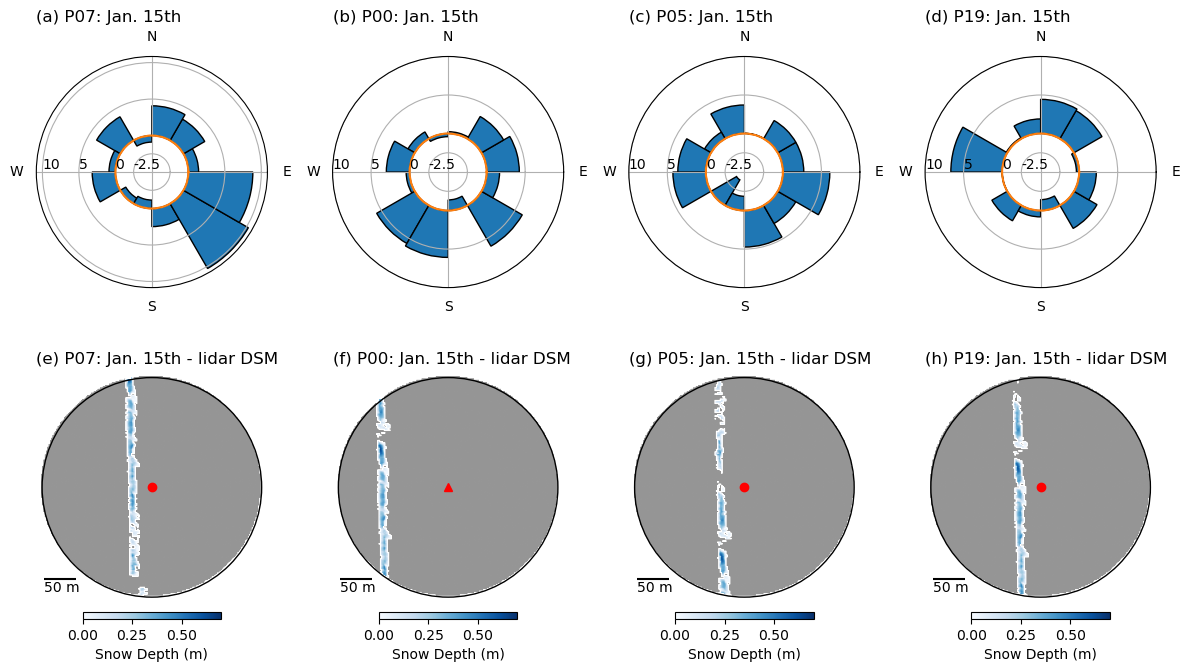

In [147]:
fig = plt.figure(figsize=(12,7))
gs = fig.add_gridspec(2,4)

ax1 = fig.add_subplot(gs[0,0], projection='polar')
ax2 = fig.add_subplot(gs[0,1], projection='polar')
ax3 = fig.add_subplot(gs[0,2], projection='polar')
ax7 = fig.add_subplot(gs[0,3], projection='polar')

ax1.set_theta_zero_location('E')
ax2.set_theta_zero_location('E')
ax3.set_theta_zero_location('E')
ax7.set_theta_zero_location('E')

ax4 = fig.add_subplot(gs[1,0])
ax5 = fig.add_subplot(gs[1,1])
ax6 = fig.add_subplot(gs[1,2])
ax8 = fig.add_subplot(gs[1,3])

thetas = np.linspace(-np.pi,np.pi,13)
width = 2*np.pi/12

comps = [(test_p07_nca_h[i]/test_p07_nca_u[i])-1 for i in range(12)]
ax1.bar(thetas[:-1]+0.2617993877991494, np.array(comps)*100,
       width=width, edgecolor='k')
ax1.set_rticks([-5,-2.5,0,5,10], ['','-2.5','0','5','10'])
ax1.set_rlabel_position(-180)
ax1.set_thetagrids(range(0,360,90), ['E', 'N', 'W', 'S'])
gridlines = ax1.yaxis.get_gridlines()
gridlines[2].set_color('tab:orange')
gridlines[2].set_linewidth(1.5)


comps = [(test_p00_nca_h[i]/test_p00_nca_u[i])-1 for i in range(12)]
ax2.bar(thetas[:-1]+0.2617993877991494, np.array(comps)*100,
       width=width, edgecolor='k')
ax2.set_rticks([-5,-2.5,0,5,10], ['','-2.5','0','5','10'])
ax2.set_rlabel_position(-180)
ax2.set_thetagrids(range(0,360,90), ['E', 'N', 'W', 'S'])
gridlines = ax2.yaxis.get_gridlines()
gridlines[2].set_color('tab:orange')
gridlines[2].set_linewidth(1.5)


comps = [(test_p05_nca_h[i]/test_p05_nca_u[i])-1 for i in range(12)]
ax3.bar(thetas[:-1]+0.2617993877991494, np.array(comps)*100,
       width=width, edgecolor='k')
ax3.set_rticks([-5,-2.5,0,5,10], ['','-2.5','0','5','10'])
ax3.set_rlabel_position(-180)
ax3.set_thetagrids(range(0,360,90),  ['E', 'N', 'W', 'S'])
gridlines = ax3.yaxis.get_gridlines()
gridlines[2].set_color('tab:orange')
gridlines[2].set_linewidth(1.5)

comps = [(test_p19_nca_h[i]/test_p19_nca_u[i])-1 for i in range(12)]
ax7.bar(thetas[:-1]+0.2617993877991494, np.array(comps)*100,
       width=width, edgecolor='k')
ax7.set_rticks([-5,-2.5,0,5,10], ['','-2.5','0','5','10'])
ax7.set_rlabel_position(-180)
ax7.set_thetagrids(range(0,360,90),  ['E', 'N', 'W', 'S'])
gridlines = ax7.yaxis.get_gridlines()
gridlines[2].set_color('tab:orange')
gridlines[2].set_linewidth(1.5)

ax1.set_title('(a) P07: Jan. 15th', loc='left')
ax2.set_title('(b) P00: Jan. 15th', loc='left')
ax3.set_title('(c) P05: Jan. 15th', loc='left')
ax7.set_title('(d) P19: Jan. 15th', loc='left')

# bound = np.array([0, 1, 2.5, 5, 10, 20, 40, 60, 80])
# norm = colors.BoundaryNorm(boundaries=bound, ncolors=256)


masked_sd= np.ma.masked_where(dists_p07 > 171, sd_0115)
np.ma.set_fill_value(masked_sd, np.nan)
bsm = np.ma.masked_where(masked_sd.filled()==0, masked_sd.filled())
np.ma.set_fill_value(bsm, np.nan)
# im4 = ax4.imshow(masked_sd, cmap='Blues', clim=(0, .7))
ax4.imshow(bsm.mask, cmap='Greys', vmin=0.5, vmax=1.5)
im4 = ax4.imshow(bsm.filled(), cmap='Blues', clim=(0.0, 0.7))
ax4.axis('off')
ax4.plot(p07[0], p07[1], 'ro')
ax4.axis([p07[0]-90,p07[0]+90,
          p07[1]+90,p07[1]-90])
circ = plt.Circle((p07[0], p07[1]), 85.5, facecolor='none', edgecolor='k', lw=1,zorder=2)
ax4.add_patch(circ)
ax4.hlines(y=460, xmin=25, xmax=50, color='k', zorder=3)
ax4.text(x=25, y=462, s='50 m', va='top')
plt.colorbar(im4, ax=ax4, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)

# masked_sd= np.ma.masked_where(dists_p00 > 171, sd_0115)
# im5 = ax5.imshow(masked_sd, cmap='Blues', clim=(0, .7))
masked_sd= np.ma.masked_where(dists_p00 > 171, sd_0115)
np.ma.set_fill_value(masked_sd, np.nan)
bsm = np.ma.masked_where(masked_sd.filled()==0, masked_sd.filled())
np.ma.set_fill_value(bsm, np.nan)
# im4 = ax4.imshow(masked_sd, cmap='Blues', clim=(0, .7))
ax5.imshow(bsm.mask, cmap='Greys', vmin=0.5, vmax=1.5)
im5 = ax5.imshow(bsm.filled(), cmap='Blues', clim=(0.0, 0.7))
ax5.axis('off')
ax5.axis([50,250,440,240])
ax5.plot(int(m_x), int(m_y), 'r^')
ax5.axis([int(m_x)-90,int(m_x)+90,
          int(m_y)+90,int(m_y)-90])
circ = plt.Circle((int(m_x), int(m_y)), 85.5, facecolor='none', edgecolor='k', lw=1,zorder=2)
ax5.add_patch(circ)
ax5.hlines(y=404, xmin=60, xmax=85, color='k', zorder=3)
ax5.text(x=60, y=406, s='50 m', va='top')
plt.colorbar(im5, ax=ax5, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)


# masked_sd= np.ma.masked_where(dists_p05 > 171, sd_0115)
# im6 = ax6.imshow(masked_sd, cmap='Blues', clim=(0.0, 0.7))
masked_sd= np.ma.masked_where(dists_p05 > 171, sd_0115)
np.ma.set_fill_value(masked_sd, np.nan)
bsm = np.ma.masked_where(masked_sd.filled()==0, masked_sd.filled())
np.ma.set_fill_value(bsm, np.nan)
# im4 = ax4.imshow(masked_sd, cmap='Blues', clim=(0, .7))
ax6.imshow(bsm.mask, cmap='Greys', vmin=0.5, vmax=1.5)
im6 = ax6.imshow(bsm.filled(), cmap='Blues', clim=(0.0, 0.7))
ax6.axis('off')
ax6.plot(p05[0], p05[1], 'ro')
ax6.axis([p05[0]-90,p05[0]+90,
          p05[1]+90,p05[1]-90])
circ = plt.Circle((p05[0], p05[1]), 85.5, facecolor='none', edgecolor='k', lw=1,zorder=2)
ax6.add_patch(circ)
ax6.hlines(y=320, xmin=25, xmax=50, color='k', zorder=3)
ax6.text(x=25, y=322, s='50 m', va='top')
plt.colorbar(im6, ax=ax6, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)

# masked_sd= np.ma.masked_where(dists_p19 > 171, sd_0115)
# im8 = ax8.imshow(masked_sd, cmap='Blues', clim=(0.0, 0.7))
masked_sd= np.ma.masked_where(dists_p19 > 171, sd_0115)
np.ma.set_fill_value(masked_sd, np.nan)
bsm = np.ma.masked_where(masked_sd.filled()==0, masked_sd.filled())
np.ma.set_fill_value(bsm, np.nan)
# im4 = ax4.imshow(masked_sd, cmap='Blues', clim=(0, .7))
ax8.imshow(bsm.mask, cmap='Greys', vmin=0.5, vmax=1.5)
im8 = ax8.imshow(bsm.filled(), cmap='Blues', clim=(0.0, 0.7))
ax8.axis('off')
ax8.plot(p19[0], p19[1], 'ro')
ax8.axis([p19[0]-90,p19[0]+90,
          p19[1]+90,p19[1]-90])
circ = plt.Circle((p19[0], p19[1]), 85.5, facecolor='none', edgecolor='k', lw=1,zorder=2)
ax8.add_patch(circ)
ax8.hlines(y=390, xmin=25, xmax=50, color='k', zorder=3)
ax8.text(x=25, y=392, s='50 m', va='top')
plt.colorbar(im8, ax=ax8, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)

ax4.set_title('(e) P07: Jan. 15th - lidar DSM', loc='left')
ax5.set_title('(f) P00: Jan. 15th - lidar DSM', loc='left')
ax6.set_title('(g) P05: Jan. 15th - lidar DSM', loc='left')
ax8.set_title('(h) P19: Jan. 15th - lidar DSM', loc='left')

plt.tight_layout()
# remove comment to save
plt.savefig('../figs/to_publish/f06.png', bbox_inches='tight', facecolor='w', dpi=300)
# plt.savefig('../figs/to_publish/f06.pdf', bbox_inches='tight', facecolor='w', dpi=300)

plt.show()

In [85]:
comps = [(test_p07_nca_h[i]/test_p07_nca_u[i])-1 for i in range(12)]
comps = np.array(comps)*100
no_snow_side = comps[3:9]
snow_side = comps[0:3]+comps[9:]

print('p07 (r limited):')
print('snow side avg: {}'.format(np.mean(snow_side)))
print('no snow side avg: {}'.format(np.mean(no_snow_side)))
# print('percent diff: {:.1f}'.format(100*(np.mean(snow_side)-np.mean(no_snow_side))/np.mean(no_snow_side)))

p07 (r limited):
snow side avg: 1.625977187879398
no snow side avg: 5.072821890782831


In [86]:
comps = [(p07_nca_h[i]/p07_nca_u[i])-1 for i in range(12)]
comps = np.array(comps)*100
no_snow_side = comps[3:9]
snow_side = comps[0:3]+comps[9:]

print('p07:')
print('snow side avg: {}'.format(np.mean(snow_side)))
print('no snow side avg: {}'.format(np.mean(no_snow_side)))
# print('percent diff: {:.1f}'.format(100*(np.mean(snow_side)-np.mean(no_snow_side))/np.mean(no_snow_side)))

p07:
snow side avg: 2.9346308121900493
no snow side avg: 5.614161338334818


In [87]:
comps = [(test_p00_nca_h[i]/test_p00_nca_u[i])-1 for i in range(12)]
comps = np.array(comps)*100
no_snow_side = comps[3:9]
snow_side = comps[0:3]+comps[9:]

print('p00 (r limited):')
print('snow side avg: {}'.format(np.mean(snow_side)))
print('no snow side avg: {}'.format(np.mean(no_snow_side)))
# print('percent diff: {:.1f}'.format(100*(np.mean(snow_side)-np.mean(no_snow_side))/np.mean(no_snow_side)))

p00 (r limited):
snow side avg: 5.28697751779755
no snow side avg: 2.368358706099562


In [88]:
comps = [(p00_nca_h[i]/p00_nca_u[i])-1 for i in range(12)]
comps = np.array(comps)*100
no_snow_side = comps[3:9]
snow_side = comps[0:3]+comps[9:]

print('p00:')
print('snow side avg: {}'.format(np.mean(snow_side)))
print('no snow side avg: {}'.format(np.mean(no_snow_side)))
# print('percent diff: {:.1f}'.format(100*(np.mean(snow_side)-np.mean(no_snow_side))/np.mean(no_snow_side)))

p00:
snow side avg: 6.617130637540243
no snow side avg: 2.628573346191417


In [89]:
comps = [(test_p05_nca_h[i]/test_p05_nca_u[i])-1 for i in range(12)]
comps = np.array(comps)*100
no_snow_side = comps[3:9]
snow_side = comps[0:3]+comps[9:]

print('p05 (r limited):')
print('snow side avg: {}'.format(np.mean(snow_side)))
print('no snow side avg: {}'.format(np.mean(no_snow_side)))
# print('percent diff: {:.1f}'.format(100*(np.mean(snow_side)-np.mean(no_snow_side))/np.mean(no_snow_side)))

p05 (r limited):
snow side avg: 2.3039004460254566
no snow side avg: 3.166285708308758


In [90]:
comps = [(p05_nca_h[i]/p05_nca_u[i])-1 for i in range(12)]
comps = np.array(comps)*100
no_snow_side = comps[3:9]
snow_side = comps[0:3]+comps[9:]

print('p05:')
print('snow side avg: {}'.format(np.mean(snow_side)))
print('no snow side avg: {}'.format(np.mean(no_snow_side)))
# print('percent diff: {:.1f}'.format(100*(np.mean(snow_side)-np.mean(no_snow_side))/np.mean(no_snow_side)))

p05:
snow side avg: 4.1269836363376
no snow side avg: 3.638760653376501


In [91]:
comps = [(test_p19_nca_h[i]/test_p19_nca_u[i])-1 for i in range(12)]
comps = np.array(comps)*100
no_snow_side = comps[3:9]
snow_side = comps[0:3]+comps[9:]

print('p19 (r limited):')
print('snow side avg: {}'.format(np.mean(snow_side)))
print('no snow side avg: {}'.format(np.mean(no_snow_side)))
# print('percent diff: {:.1f}'.format(100*(np.mean(snow_side)-np.mean(no_snow_side))/np.mean(no_snow_side)))

p19 (r limited):
snow side avg: 3.9321700351554245
no snow side avg: 2.0900357608540996


In [92]:
comps = [(p19_nca_h[i]/p19_nca_u[i])-1 for i in range(12)]
comps = np.array(comps)*100
no_snow_side = comps[3:9]
snow_side = comps[0:3]+comps[9:]

print('p19:')
print('snow side avg: {}'.format(np.mean(snow_side)))
print('no snow side avg: {}'.format(np.mean(no_snow_side)))
# print('percent diff: {:.1f}'.format(100*(np.mean(snow_side)-np.mean(no_snow_side))/np.mean(no_snow_side)))

p19:
snow side avg: 6.650865218889527
no snow side avg: 2.6434661570625164


In [93]:
# sd_0115 = np.loadtxt(fnames_0115, delimiter=',')
sd_0121 = np.loadtxt(fnames[0], delimiter=',')
sd_0122 = np.loadtxt(fnames[1], delimiter=',')
sd_0129 = np.loadtxt(fnames[2], delimiter=',')
sd_0217 = np.loadtxt(fnames[3], delimiter=',')
sd_0218 = np.loadtxt(fnames[4], delimiter=',')
sd_0224 = np.loadtxt(fnames[5], delimiter=',')
sd_0304 = np.loadtxt(fnames[6], delimiter=',')

In [94]:
sds = [sd_0115, sd_0121, sd_0122, sd_0129, sd_0217, sd_0218, sd_0224, sd_0304]

for d in sds:
    min_sd = d[d>0].min()*100
    mean_sd_no_0 = d[d>0].mean()*100
    mean_sd_0 = d.mean()*100
    max_sd = d[d>0].max()*100
    p_covered = 100*((d>0).sum()/(500*500))
    p_covered_deep = 100*((d>0.2).sum()/(500*500))

    print('Mean: {:.1f} ({:.1f}) cm'.format(mean_sd_no_0, mean_sd_0))
    print('Max : {:.1f} cm'.format(max_sd))
    print('SCA : {:.1f}%'.format(p_covered))
    print('SCA : {:.1f}%'.format(p_covered_deep))
    print('')

Mean: 5.3 (0.1) cm
Max : 63.4 cm
SCA : 1.8%
SCA : 0.2%

Mean: 3.6 (1.6) cm
Max : 96.7 cm
SCA : 45.1%
SCA : 0.6%

Mean: 3.8 (2.0) cm
Max : 82.7 cm
SCA : 52.1%
SCA : 0.5%

Mean: 3.2 (0.9) cm
Max : 82.8 cm
SCA : 28.1%
SCA : 0.5%

Mean: 8.8 (7.9) cm
Max : 131.5 cm
SCA : 89.6%
SCA : 5.0%

Mean: 8.7 (7.6) cm
Max : 131.0 cm
SCA : 87.1%
SCA : 4.8%

Mean: 5.5 (2.2) cm
Max : 100.6 cm
SCA : 39.7%
SCA : 2.4%

Mean: 2.2 (1.3) cm
Max : 80.4 cm
SCA : 60.1%
SCA : 1.1%

